# Задание 2.2 - Введение в PyTorch

Для этого задания потребуется установить версию PyTorch 1.0

https://pytorch.org/get-started/locally/

В этом задании мы познакомимся с основными компонентами PyTorch и натренируем несколько небольших моделей.<br>
GPU нам пока не понадобится.

Основные ссылки:  
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html  
https://pytorch.org/docs/stable/nn.html  
https://pytorch.org/docs/stable/torchvision/index.html  

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
from torch.optim.lr_scheduler import StepLR

from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Как всегда, начинаем с загрузки данных

PyTorch поддерживает загрузку SVHN из коробки.

In [2]:
# First, lets load the dataset
data_train = dset.SVHN('./data/', split='train',
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.43,0.44,0.47],
                                               std=[0.20,0.20,0.20])                           
                       ])
                      )
data_test = dset.SVHN('./data/', split='test', 
                      transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.43,0.44,0.47],
                                               std=[0.20,0.20,0.20])                           
                       ]))

Теперь мы разделим данные на training и validation с использованием классов `SubsetRandomSampler` и `DataLoader`.

`DataLoader` подгружает данные, предоставляемые классом `Dataset`, во время тренировки и группирует их в батчи.
Он дает возможность указать `Sampler`, который выбирает, какие примеры из датасета использовать для тренировки. Мы используем это, чтобы разделить данные на training и validation.

Подробнее: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [3]:
import numpy as np
batch_size = 64

data_size = data_train.data.shape[0]
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                         sampler=val_sampler)
for i in iter(val_loader):
    print(i)

[tensor([[[[-1.2873, -1.0520, -0.8559,  ..., -0.8559, -0.8559, -0.8755],
          [-1.1892, -0.7775, -0.3657,  ..., -0.9735, -1.0324, -0.9931],
          [-1.0716, -0.4833, -0.0912,  ..., -1.1892, -1.2480, -1.2284],
          ...,
          [-0.9931, -0.9539, -0.7775,  ..., -0.8755, -0.4049, -0.2480],
          [-1.5814, -1.5814, -1.2676,  ..., -0.9147, -0.4245, -0.2480],
          [-1.5618, -1.5618, -1.3853,  ..., -1.0127, -0.4441, -0.2284]],

         [[-0.9647, -0.7882, -0.6706,  ..., -0.7686, -0.8078, -0.8275],
          [-0.8863, -0.5333, -0.2392,  ..., -0.8471, -0.8667, -0.8863],
          [-0.6902, -0.2000,  0.0549,  ..., -0.9843, -1.0039, -0.9843],
          ...,
          [-1.1412, -1.0824, -0.8863,  ..., -0.6706, -0.2196, -0.0627],
          [-1.6902, -1.6902, -1.2784,  ..., -0.6902, -0.1804, -0.0431],
          [-1.4157, -1.3961, -1.2196,  ..., -0.7294, -0.1804, -0.0235]],

         [[-0.7814, -0.6245, -0.5461,  ..., -0.6049, -0.5853, -0.6049],
          [-0.5657, -0.2716, 

        8, 6, 3, 8, 4, 1, 3, 3, 1, 2, 9, 4, 3, 2, 1, 1])]
[tensor([[[[ 1.8304,  1.8304,  1.8500,  ...,  1.9480,  2.0069,  2.0265],
          [ 1.8108,  1.8108,  1.8304,  ...,  1.9480,  2.0069,  2.0265],
          [ 1.7716,  1.7716,  1.7912,  ...,  1.9873,  2.0069,  2.0069],
          ...,
          [ 1.8696,  1.8696,  1.8696,  ...,  2.0069,  2.0265,  2.0265],
          [ 1.8500,  1.8500,  1.8696,  ...,  2.0265,  2.0461,  2.0657],
          [ 1.8500,  1.8500,  1.8696,  ...,  2.0265,  2.0657,  2.0657]],

         [[ 1.9765,  1.9765,  1.9961,  ...,  2.1922,  2.2510,  2.2706],
          [ 1.9569,  1.9569,  1.9765,  ...,  2.1922,  2.2510,  2.2706],
          [ 1.9176,  1.9176,  1.9373,  ...,  2.1922,  2.2314,  2.2510],
          ...,
          [ 2.0549,  2.0549,  2.0549,  ...,  2.1529,  2.1922,  2.2118],
          [ 2.0549,  2.0549,  2.0549,  ...,  2.1725,  2.2314,  2.2510],
          [ 2.0549,  2.0549,  2.0549,  ...,  2.1922,  2.2314,  2.2510]],

         [[ 1.8069,  1.8069,  1.8265,  ...,

        8, 2, 5, 9, 2, 1, 6, 7, 4, 1, 4, 5, 5, 3, 2, 2])]
[tensor([[[[-0.6990, -0.6794, -0.6402,  ..., -0.5029, -0.6206, -0.7382],
          [-0.8363, -0.8167, -0.7775,  ..., -0.5029, -0.6206, -0.7382],
          [-1.0520, -1.0127, -0.9539,  ..., -0.5029, -0.6206, -0.7382],
          ...,
          [-0.1696, -0.1892, -0.1892,  ...,  0.0265, -0.0324, -0.0912],
          [ 0.1441,  0.1833,  0.1637,  ...,  0.0461, -0.0520, -0.1696],
          [ 0.3402,  0.3990,  0.3598,  ...,  0.0069, -0.1304, -0.2480]],

         [[-0.8275, -0.8078, -0.7882,  ..., -0.6314, -0.7490, -0.8667],
          [-0.9843, -0.9451, -0.8667,  ..., -0.6510, -0.7686, -0.8863],
          [-1.1804, -1.1216, -1.0431,  ..., -0.6510, -0.7686, -0.8863],
          ...,
          [-1.2196, -1.2392, -1.2588,  ..., -0.8078, -0.8863, -0.9647],
          [-1.0824, -1.0824, -1.1020,  ..., -0.9255, -1.0235, -1.1020],
          [-1.0235, -1.0039, -1.0235,  ..., -1.0235, -1.1608, -1.2784]],

         [[-0.9578, -0.9578, -0.9186,  ...,

        2, 2, 7, 8, 5, 1, 2, 8, 1, 1, 0, 4, 6, 1, 4, 1])]
[tensor([[[[ 0.6147,  0.6147,  0.6147,  ...,  0.6147,  0.6539,  0.6147],
          [ 0.6147,  0.6147,  0.6343,  ...,  0.5951,  0.5951,  0.5559],
          [ 0.6147,  0.6147,  0.6539,  ...,  0.6343,  0.4578,  0.1049],
          ...,
          [-0.8559, -0.7578, -0.8363,  ...,  0.7520,  0.7520,  0.7520],
          [-1.0324, -0.9343, -0.8951,  ...,  0.7324,  0.7520,  0.7324],
          [-0.7971, -0.7186, -0.5618,  ...,  0.7324,  0.7520,  0.7324]],

         [[ 0.2902,  0.2902,  0.2902,  ...,  0.2706,  0.3098,  0.2902],
          [ 0.2902,  0.2902,  0.3098,  ...,  0.2314,  0.2706,  0.3098],
          [ 0.2902,  0.2902,  0.3294,  ...,  0.2902,  0.1529, -0.1020],
          ...,
          [-0.9647, -0.9059, -1.0824,  ...,  0.4471,  0.4667,  0.4471],
          [-1.1608, -1.1216, -1.1412,  ...,  0.4667,  0.4863,  0.4667],
          [-1.0235, -0.9647, -0.8471,  ...,  0.4667,  0.4863,  0.4667]],

         [[-0.4284, -0.4284, -0.4284,  ...,

        1, 8, 8, 9, 8, 6, 7, 2, 6, 2, 4, 4, 6, 3, 3, 5])]
[tensor([[[[ 0.4578,  0.4578,  0.4971,  ...,  0.0265,  0.2225,  0.3206],
          [ 0.4775,  0.4578,  0.4971,  ..., -0.0127,  0.1049,  0.2618],
          [ 0.4775,  0.4578,  0.4971,  ...,  0.1049,  0.0853,  0.1637],
          ...,
          [ 0.3990,  0.3990,  0.3990,  ...,  0.3402,  0.3794,  0.3402],
          [ 0.3990,  0.3990,  0.3990,  ...,  0.3206,  0.3402,  0.3794],
          [ 0.4186,  0.4186,  0.4186,  ...,  0.3206,  0.3598,  0.3794]],

         [[ 0.4471,  0.4275,  0.4275,  ..., -0.5137, -0.3569, -0.0431],
          [ 0.4275,  0.4078,  0.4275,  ..., -0.6314, -0.5333, -0.2000],
          [ 0.4078,  0.3882,  0.4275,  ..., -0.5137, -0.5529, -0.2980],
          ...,
          [ 0.4667,  0.4667,  0.4667,  ...,  0.2706,  0.2706,  0.2706],
          [ 0.4863,  0.4863,  0.4667,  ...,  0.2706,  0.2706,  0.2902],
          [ 0.3882,  0.3882,  0.4078,  ...,  0.3098,  0.3490,  0.3294]],

         [[ 0.1794,  0.1794,  0.2186,  ...,

        6, 3, 9, 1, 1, 3, 0, 5, 1, 5, 3, 2, 0, 2, 3, 5])]
[tensor([[[[-0.1892, -0.1892, -0.2284,  ..., -0.8167, -0.8167, -0.7186],
          [-0.2676, -0.2676, -0.3265,  ..., -0.8167, -0.8363, -0.8559],
          [-0.3069, -0.2873, -0.3265,  ..., -0.7578, -0.7578, -0.7971],
          ...,
          [-0.1892, -0.2088, -0.4833,  ..., -0.5029, -0.9931, -1.4833],
          [-0.1696, -0.1892, -0.7382,  ..., -0.9343, -0.7382, -0.6794],
          [-0.1892, -0.2284, -0.6794,  ..., -1.9147, -1.5225, -1.1892]],

         [[-0.1804, -0.2000, -0.2000,  ..., -0.8667, -0.8275, -0.8471],
          [-0.2392, -0.2000, -0.2784,  ..., -0.9059, -0.8471, -0.9451],
          [-0.2980, -0.2392, -0.2588,  ..., -0.8863, -0.7882, -0.8863],
          ...,
          [-0.3961, -0.4353, -0.5529,  ..., -0.3765, -1.0235, -1.6118],
          [-0.3765, -0.4745, -0.7490,  ..., -0.8275, -0.5725, -0.6706],
          [-0.3373, -0.4157, -0.6118,  ..., -1.6314, -1.1608, -0.9059]],

         [[-0.7225, -0.6637, -0.6833,  ...,

        4, 4, 2, 3, 1, 2, 9, 2, 9, 8, 4, 2, 2, 5, 1, 9])]
[tensor([[[[ 0.5951,  0.5559,  0.5167,  ..., -0.2873, -0.3461, -0.3853],
          [ 0.6539,  0.6147,  0.6147,  ..., -0.2480, -0.3069, -0.3657],
          [ 0.6735,  0.6539,  0.7127,  ..., -0.2284, -0.2873, -0.3265],
          ...,
          [ 0.2225,  0.1833,  0.1245,  ...,  0.0657, -0.0127, -0.0716],
          [ 0.1049,  0.0657,  0.0069,  ...,  0.0265, -0.0324, -0.0912],
          [-0.0324, -0.0520, -0.0520,  ..., -0.0324, -0.0912, -0.1500]],

         [[-0.7490, -0.7294, -0.6902,  ..., -1.5529, -1.6314, -1.6902],
          [-0.6118, -0.5922, -0.5137,  ..., -1.5333, -1.6118, -1.6706],
          [-0.5333, -0.4941, -0.3961,  ..., -1.5333, -1.6118, -1.6706],
          ...,
          [-1.1608, -1.1804, -1.2392,  ..., -1.4745, -1.5529, -1.6118],
          [-1.3765, -1.3765, -1.4157,  ..., -1.4549, -1.5333, -1.5922],
          [-1.4745, -1.4549, -1.4549,  ..., -1.4157, -1.4941, -1.5529]],

         [[-0.2912, -0.3108, -0.2912,  ...,

        6, 4, 1, 3, 9, 6, 8, 2, 3, 4, 1, 2, 5, 8, 8, 4])]
[tensor([[[[-1.1304, -1.5422, -1.5029,  ..., -0.9343, -1.2284, -1.0127],
          [-1.0127, -1.2676, -1.3853,  ..., -0.4049, -0.9343, -0.9735],
          [-0.5618, -0.6990, -0.9539,  ..., -0.2480, -0.9343, -1.0127],
          ...,
          [-0.9931, -0.9539, -0.3069,  ..., -1.0912, -0.5814, -0.0912],
          [-0.9931, -0.9931, -0.3461,  ..., -0.9343, -0.4049, -0.2873],
          [-0.9539, -1.0520, -0.5225,  ..., -0.9735, -0.4441, -0.6206]],

         [[-1.3176, -1.6510, -1.5922,  ..., -1.1804, -1.5137, -1.3176],
          [-1.2196, -1.4157, -1.4549,  ..., -0.6902, -1.2784, -1.2980],
          [-0.8078, -0.8667, -1.0824,  ..., -0.5529, -1.2588, -1.3569],
          ...,
          [-1.2000, -1.1412, -0.4941,  ..., -1.3176, -0.7294, -0.2000],
          [-1.2000, -1.1608, -0.5137,  ..., -1.1804, -0.5922, -0.4353],
          [-1.1804, -1.2392, -0.6902,  ..., -1.2196, -0.6510, -0.7882]],

         [[-1.6637, -1.8010, -1.5657,  ...,

        0, 3, 3, 7, 7, 7, 1, 1, 2, 9, 0, 8, 5, 0, 8, 1])]
[tensor([[[[ 2.3794,  0.3794, -0.9147,  ..., -1.1696, -1.0716, -1.3265],
          [ 2.3206,  1.2029,  1.4578,  ...,  0.3010,  0.4382,  0.3990],
          [ 2.3010,  1.7716,  2.3010,  ...,  2.5755,  2.6539,  2.6735],
          ...,
          [ 2.5167,  0.8696, -0.9735,  ..., -1.2088, -1.2088, -1.2873],
          [ 2.4578,  0.8500, -0.8951,  ..., -0.5029, -0.4441, -0.3461],
          [ 2.4971,  0.8304, -0.9147,  ...,  1.9088,  1.9284,  1.9480]],

         [[ 2.4863,  0.5843, -0.6902,  ..., -1.2000, -1.2392, -1.5137],
          [ 2.4275,  1.4275,  1.7020,  ...,  0.2314,  0.2706,  0.2314],
          [ 2.3882,  1.9961,  2.5843,  ...,  2.5451,  2.5647,  2.6039],
          ...,
          [ 2.5451,  0.9176, -0.9255,  ..., -0.9451, -0.9843, -1.1020],
          [ 2.4863,  0.8784, -0.8667,  ..., -0.2588, -0.2000, -0.1412],
          [ 2.5255,  0.8588, -0.9059,  ...,  2.1922,  2.2118,  2.1922]],

         [[ 2.6304,  1.4931,  0.4931,  ...,

        8, 9, 4, 6, 1, 6, 0, 7, 4, 1, 2, 1, 7, 2, 5, 7])]
[tensor([[[[ 0.4578,  0.4382,  0.3794,  ...,  0.5167,  0.4578,  0.4382],
          [ 0.4382,  0.4186,  0.3598,  ...,  0.5167,  0.4578,  0.4382],
          [ 0.4186,  0.3990,  0.3598,  ...,  0.5363,  0.4775,  0.4382],
          ...,
          [ 0.5755,  0.4971,  0.3990,  ...,  0.4382,  0.4382,  0.4186],
          [ 0.5559,  0.5363,  0.4775,  ...,  0.4578,  0.4775,  0.4775],
          [ 0.5559,  0.5363,  0.4971,  ...,  0.4578,  0.4971,  0.4971]],

         [[ 0.7020,  0.6824,  0.6235,  ...,  0.9765,  0.9569,  0.9373],
          [ 0.6431,  0.6235,  0.5843,  ...,  0.9569,  0.9373,  0.9176],
          [ 0.5647,  0.5647,  0.5451,  ...,  0.9373,  0.9176,  0.8980],
          ...,
          [ 0.5647,  0.5255,  0.4667,  ...,  0.9176,  0.9569,  0.9569],
          [ 0.6039,  0.5843,  0.5451,  ...,  0.9176,  0.9765,  0.9765],
          [ 0.6235,  0.6039,  0.5647,  ...,  0.9176,  0.9765,  0.9961]],

         [[ 0.6892,  0.6696,  0.6108,  ...,

        5, 4, 9, 3, 2, 2, 0, 3, 9, 2, 8, 1, 2, 3, 3, 3])]
[tensor([[[[ 0.5363,  0.3402,  0.0853,  ..., -0.4637, -0.5225, -0.5422],
          [ 0.4382,  0.2422, -0.0520,  ..., -0.7186, -0.8167, -0.8363],
          [ 0.2618,  0.0265, -0.3265,  ..., -1.0716, -1.2088, -1.2480],
          ...,
          [ 1.0657,  1.0461,  0.9873,  ..., -0.1304, -0.4049, -0.5814],
          [ 1.0461,  1.0265,  1.0069,  ...,  0.1637, -0.0912, -0.2480],
          [ 1.0265,  1.0265,  1.0069,  ...,  0.3598,  0.1245, -0.0127]],

         [[ 0.7412,  0.5451,  0.2706,  ..., -0.2000, -0.2392, -0.2392],
          [ 0.6039,  0.4275,  0.1333,  ..., -0.4549, -0.5333, -0.5333],
          [ 0.4078,  0.1725, -0.1804,  ..., -0.8078, -0.9255, -0.9647],
          ...,
          [ 1.3098,  1.2902,  1.2118,  ...,  0.1922, -0.1216, -0.3373],
          [ 1.3098,  1.2902,  1.2706,  ...,  0.5059,  0.2314,  0.0549],
          [ 1.3098,  1.3098,  1.2902,  ...,  0.7020,  0.4667,  0.3098]],

         [[ 0.7676,  0.5716,  0.3167,  ...,

        5, 3, 6, 4, 3, 4, 4, 5, 3, 4, 1, 2, 1, 2, 2, 4])]
[tensor([[[[ 2.3010,  2.2814,  2.2618,  ...,  1.3598,  1.3010,  1.2618],
          [ 2.3010,  2.3010,  2.3010,  ...,  1.0853,  1.0069,  0.9480],
          [ 2.2814,  2.3206,  2.3598,  ...,  0.5559,  0.4775,  0.4186],
          ...,
          [ 2.1441,  2.1245,  2.0853,  ...,  0.4775,  0.7127,  0.8696],
          [ 2.1441,  2.1049,  2.0265,  ...,  0.1833,  0.2618,  0.3206],
          [ 2.1441,  2.0853,  2.0069,  ..., -0.0716, -0.0912, -0.0912]],

         [[ 2.3490,  2.3294,  2.3098,  ...,  1.5451,  1.4471,  1.3882],
          [ 2.3490,  2.3490,  2.3490,  ...,  1.2510,  1.1529,  1.0941],
          [ 2.3686,  2.3882,  2.4078,  ...,  0.7412,  0.6431,  0.5843],
          ...,
          [ 2.2314,  2.2118,  2.1922,  ...,  1.0353,  1.2510,  1.4078],
          [ 2.2118,  2.1725,  2.1333,  ...,  0.7412,  0.8196,  0.8784],
          [ 2.1922,  2.1529,  2.1137,  ...,  0.4667,  0.4471,  0.4471]],

         [[ 2.1206,  2.0814,  2.0422,  ...,

        7, 1, 4, 0, 1, 6, 1, 2, 3, 2, 0, 0, 9, 6, 6, 2])]
[tensor([[[[-1.3853, -1.3265, -1.2480,  ..., -0.4833, -0.4637, -0.4637],
          [-1.3853, -1.3265, -1.2480,  ..., -0.5422, -0.5422, -0.5422],
          [-1.3657, -1.3069, -1.2088,  ..., -0.6794, -0.6794, -0.6794],
          ...,
          [-1.6010, -1.5618, -1.4637,  ..., -1.3265, -1.3069, -1.3069],
          [-1.6010, -1.5618, -1.4637,  ..., -1.0520, -1.0324, -1.0324],
          [-1.6010, -1.5618, -1.4637,  ..., -0.9343, -0.9147, -0.8951]],

         [[-1.4549, -1.3961, -1.2784,  ..., -0.3569, -0.3961, -0.3961],
          [-1.4549, -1.3961, -1.2784,  ..., -0.4157, -0.4549, -0.4549],
          [-1.4353, -1.3765, -1.2392,  ..., -0.5529, -0.5725, -0.5725],
          ...,
          [-1.5922, -1.5529, -1.4549,  ..., -1.1216, -1.0824, -1.0627],
          [-1.5725, -1.5333, -1.4549,  ..., -0.8667, -0.8471, -0.8275],
          [-1.5725, -1.5333, -1.4549,  ..., -0.7490, -0.7294, -0.7098]],

         [[-1.4873, -1.4284, -1.3304,  ...,

        1, 8, 2, 7, 1, 9, 5, 2, 2, 6, 7, 3, 5, 6, 1, 5])]
[tensor([[[[ 0.6147,  0.8696,  1.2814,  ...,  0.8500,  0.7912,  0.8304],
          [ 1.3794,  1.5559,  1.7912,  ...,  0.8500,  0.6147,  0.8108],
          [ 1.7716,  1.8108,  1.7912,  ...,  0.8892,  0.7520,  1.1049],
          ...,
          [ 0.1245,  0.0853,  0.0657,  ...,  0.3794,  0.3402,  0.3402],
          [ 0.2225,  0.2029,  0.2029,  ...,  0.5167,  0.5167,  0.4971],
          [ 0.3794,  0.3598,  0.3794,  ...,  0.6343,  0.5951,  0.5363]],

         [[ 0.2706,  0.5647,  0.9765,  ..., -0.1804, -0.1608, -0.0431],
          [ 1.2510,  1.4471,  1.6235,  ..., -0.1804, -0.3176,  0.0157],
          [ 1.7020,  1.7608,  1.6235,  ..., -0.1412, -0.1412,  0.4275],
          ...,
          [-0.6706, -0.7098, -0.7686,  ..., -0.4745, -0.5137, -0.4745],
          [-0.6118, -0.6510, -0.6510,  ..., -0.3765, -0.4157, -0.4157],
          [-0.4745, -0.5137, -0.5137,  ..., -0.3176, -0.3961, -0.4157]],

         [[-0.0167,  0.2578,  0.6696,  ...,

        6, 1, 9, 3, 9, 2, 6, 1, 1, 6, 4, 2, 2, 3, 8, 1])]
[tensor([[[[-0.7382, -0.8951, -1.0127,  ..., -1.1500, -1.1696, -1.1696],
          [-0.5422, -0.7578, -0.9539,  ..., -1.1500, -1.1500, -1.1696],
          [-0.4637, -0.6990, -0.9343,  ..., -1.1500, -1.1500, -1.1696],
          ...,
          [-1.5225, -1.6402, -1.6990,  ..., -1.6794, -1.6794, -1.6598],
          [-1.6010, -1.6794, -1.6794,  ..., -1.6598, -1.6598, -1.6402],
          [-1.6598, -1.7186, -1.6990,  ..., -1.6206, -1.6206, -1.6206]],

         [[-0.8863, -1.0431, -1.2000,  ..., -1.2196, -1.2392, -1.2588],
          [-0.7294, -0.9451, -1.1608,  ..., -1.2588, -1.2588, -1.2784],
          [-0.6706, -0.8863, -1.1412,  ..., -1.2588, -1.2784, -1.2784],
          ...,
          [-1.7098, -1.7490, -1.7490,  ..., -1.6902, -1.6902, -1.6902],
          [-1.7294, -1.7490, -1.7294,  ..., -1.6510, -1.6510, -1.6706],
          [-1.7686, -1.7882, -1.7490,  ..., -1.6314, -1.6510, -1.6706]],

         [[-1.2716, -1.3892, -1.4088,  ...,

        0, 6, 3, 3, 7, 1, 2, 5, 2, 0, 2, 5, 0, 1, 7, 5])]
[tensor([[[[-0.4833, -0.5618, -0.7186,  ..., -0.3853, -0.4049, -0.4049],
          [-0.4049, -0.4833, -0.6598,  ..., -0.4441, -0.4833, -0.4833],
          [-0.2284, -0.3265, -0.5422,  ..., -0.5814, -0.6206, -0.6402],
          ...,
          [-0.0716, -0.0716, -0.0716,  ..., -0.4441, -0.4245, -0.4049],
          [-0.2873, -0.2676, -0.2284,  ..., -0.5225, -0.4049, -0.3461],
          [-0.3853, -0.3657, -0.3265,  ..., -0.5618, -0.4245, -0.3461]],

         [[-0.4941, -0.5529, -0.6902,  ..., -0.4549, -0.4745, -0.4745],
          [-0.4353, -0.5137, -0.6706,  ..., -0.5137, -0.5333, -0.5529],
          [-0.2980, -0.3765, -0.5725,  ..., -0.6510, -0.6902, -0.7098],
          ...,
          [-0.0824, -0.0824, -0.0824,  ..., -0.3176, -0.2980, -0.2980],
          [-0.2980, -0.2784, -0.2588,  ..., -0.4353, -0.3373, -0.3176],
          [-0.3961, -0.3765, -0.3373,  ..., -0.4745, -0.3569, -0.2980]],

         [[-0.4088, -0.4873, -0.6637,  ...,

        5, 3, 2, 4, 1, 4, 5, 4, 9, 9, 1, 7, 8, 4, 0, 1])]
[tensor([[[[-0.7186, -0.8363, -0.9539,  ..., -0.9539, -0.9343, -0.9343],
          [-0.7578, -0.9147, -1.0912,  ..., -0.9931, -0.9539, -0.8951],
          [-0.8167, -1.0324, -1.2284,  ..., -0.9147, -0.8755, -0.8167],
          ...,
          [-0.5422, -0.5814, -0.6010,  ..., -0.4833, -0.3657, -0.2480],
          [-0.6206, -0.6794, -0.6598,  ..., -0.7186, -0.6206, -0.4637],
          [-0.8167, -0.8363, -0.8363,  ..., -0.9539, -0.9147, -0.7578]],

         [[-1.0039, -1.1412, -1.2196,  ..., -1.1216, -1.1020, -1.1412],
          [-1.0431, -1.2000, -1.3569,  ..., -1.1608, -1.1412, -1.1020],
          [-1.1020, -1.2980, -1.4745,  ..., -1.0824, -1.0627, -1.0235],
          ...,
          [-0.7490, -0.8078, -0.8078,  ..., -0.7686, -0.6314, -0.5333],
          [-0.7686, -0.8078, -0.8471,  ..., -0.9647, -0.8863, -0.7490],
          [-0.9451, -0.9843, -0.9843,  ..., -1.1804, -1.1216, -1.0039]],

         [[-1.0755, -1.1539, -1.2520,  ...,

        0, 4, 9, 1, 3, 5, 4, 4, 1, 3, 3, 4, 1, 7, 9, 0])]
[tensor([[[[ 0.7912,  0.7716,  0.6343,  ...,  0.7912,  0.8696,  0.9088],
          [ 0.7912,  0.7127,  0.5363,  ...,  0.7127,  0.7912,  0.8500],
          [ 0.8108,  0.5755,  0.3794,  ...,  0.4971,  0.5755,  0.7716],
          ...,
          [ 0.2814, -0.2088, -0.5029,  ...,  0.5951,  0.6735,  0.6931],
          [ 0.4186,  0.0853, -0.2480,  ...,  0.6147,  0.6539,  0.6735],
          [ 0.4578,  0.2814, -0.0127,  ...,  0.6735,  0.6147,  0.6343]],

         [[ 0.7020,  0.7020,  0.5843,  ...,  0.8392,  0.8980,  0.9765],
          [ 0.7020,  0.6235,  0.4275,  ...,  0.7216,  0.8000,  0.9176],
          [ 0.7216,  0.4471,  0.1922,  ...,  0.4275,  0.5255,  0.7216],
          ...,
          [ 0.1922, -0.2980, -0.5725,  ...,  0.5843,  0.6627,  0.6824],
          [ 0.3882,  0.0157, -0.3176,  ...,  0.6627,  0.6824,  0.7020],
          [ 0.4078,  0.2706, -0.0235,  ...,  0.7216,  0.6431,  0.6627]],

         [[ 0.4539,  0.5127,  0.4931,  ...,

        3, 5, 7, 4, 2, 3, 9, 7, 7, 7, 1, 5, 1, 2, 8, 7])]
[tensor([[[[ 1.4971,  1.1441,  0.7127,  ..., -0.4833, -0.5422, -0.7971],
          [ 1.5559,  1.1833,  0.8108,  ..., -0.8559, -0.7186, -0.5814],
          [ 1.6343,  1.3010,  0.9284,  ..., -1.0912, -0.6402, -0.0324],
          ...,
          [ 2.0069,  1.8108,  1.4186,  ...,  0.3990,  0.3010,  0.2225],
          [ 1.9676,  1.7520,  1.4186,  ...,  1.0265,  0.9284,  0.8108],
          [ 1.8892,  1.7520,  1.3794,  ...,  0.9873,  0.8892,  0.7912]],

         [[ 1.2706,  0.8784,  0.4275,  ..., -0.4941, -0.5725, -0.8667],
          [ 1.3294,  0.9569,  0.5647,  ..., -0.8078, -0.7490, -0.6118],
          [ 1.4275,  1.0941,  0.7412,  ..., -1.0235, -0.6314, -0.0039],
          ...,
          [ 2.0353,  1.8196,  1.4275,  ...,  0.2314,  0.1725,  0.0549],
          [ 1.9961,  1.7804,  1.4078,  ...,  0.8392,  0.7608,  0.6235],
          [ 1.9176,  1.7412,  1.3686,  ...,  0.8000,  0.7216,  0.6039]],

         [[ 0.9833,  0.6304,  0.2382,  ...,

        8, 3, 2, 4, 7, 2, 7, 3, 1, 7, 6, 9, 9, 1, 2, 5])]
[tensor([[[[-0.3265, -0.3265, -0.3657,  ..., -0.4049, -0.3853, -0.3853],
          [-0.3853, -0.3853, -0.4245,  ..., -0.4441, -0.4245, -0.4245],
          [-0.5618, -0.5814, -0.6206,  ..., -0.5422, -0.5422, -0.5422],
          ...,
          [-1.0127, -1.0716, -1.2088,  ..., -1.2284, -1.1696, -1.1696],
          [-0.9147, -0.9539, -1.0716,  ..., -1.1500, -1.1108, -1.1108],
          [-0.8755, -0.9147, -1.0324,  ..., -1.1108, -1.0716, -1.0716]],

         [[-0.2000, -0.2000, -0.2196,  ..., -0.3765, -0.3569, -0.3569],
          [-0.2588, -0.2588, -0.2784,  ..., -0.4157, -0.3961, -0.3961],
          [-0.3765, -0.3961, -0.4353,  ..., -0.5333, -0.5137, -0.5137],
          ...,
          [-0.8863, -0.9255, -1.0235,  ..., -1.1608, -1.1216, -1.1216],
          [-0.7882, -0.8275, -0.9059,  ..., -1.0627, -1.0431, -1.0431],
          [-0.7490, -0.7882, -0.8471,  ..., -1.0235, -1.0039, -1.0039]],

         [[-0.2520, -0.2520, -0.2912,  ...,

        9, 1, 1, 9, 3, 3, 3, 4, 8, 4, 5, 5, 7, 6, 9, 1])]
[tensor([[[[ 1.5951,  1.6147,  1.6735,  ...,  0.1637,  0.1245,  0.1245],
          [ 1.5167,  1.5363,  1.5755,  ...,  0.1833,  0.1441,  0.1245],
          [ 1.3598,  1.3598,  1.3598,  ...,  0.2029,  0.1637,  0.1441],
          ...,
          [ 1.4971,  1.4971,  1.4971,  ...,  0.4578,  0.8696,  1.0853],
          [ 1.5951,  1.5951,  1.6343,  ...,  0.4578,  0.8696,  1.0853],
          [ 1.6343,  1.6539,  1.6931,  ...,  0.4578,  0.8696,  1.0853]],

         [[ 1.6235,  1.6235,  1.6627,  ...,  0.1529,  0.1137,  0.1137],
          [ 1.5451,  1.5451,  1.5647,  ...,  0.1529,  0.1333,  0.1333],
          [ 1.3882,  1.3686,  1.3490,  ...,  0.1725,  0.1529,  0.1529],
          ...,
          [ 1.3686,  1.3686,  1.3882,  ...,  0.3490,  0.8196,  1.0353],
          [ 1.5059,  1.5255,  1.5451,  ...,  0.3490,  0.8196,  1.0353],
          [ 1.5647,  1.5843,  1.6235,  ...,  0.3490,  0.8196,  1.0353]],

         [[ 1.4931,  1.5127,  1.5520,  ...,

        0, 8, 3, 3, 8, 7, 2, 3, 0, 1, 1, 6, 6, 8, 7, 4])]
[tensor([[[[-0.8363, -0.8755, -0.9931,  ..., -2.0520, -2.0127, -2.0716],
          [-0.7971, -0.8755, -0.9539,  ..., -1.9735, -2.0127, -2.1108],
          [-0.8167, -0.8559, -0.9343,  ..., -1.8363, -1.9539, -2.0912],
          ...,
          [-0.7382, -0.7971, -0.8167,  ..., -1.1304, -1.3853, -1.7578],
          [-0.7382, -0.7775, -0.7971,  ..., -1.6598, -1.7578, -1.9147],
          [-0.7382, -0.7578, -0.7775,  ..., -1.8951, -1.9343, -1.9931]],

         [[-1.0039, -1.0431, -1.0627,  ..., -1.5725, -1.5137, -1.5333],
          [-1.0235, -1.0431, -1.0824,  ..., -1.4745, -1.4941, -1.5137],
          [-1.0431, -1.0824, -1.0824,  ..., -1.3373, -1.3961, -1.4941],
          ...,
          [-0.9451, -1.0039, -1.0431,  ..., -0.8863, -1.1412, -1.4549],
          [-0.9059, -1.0039, -1.0235,  ..., -1.3569, -1.4745, -1.5922],
          [-0.9255, -0.9843, -1.0039,  ..., -1.5725, -1.6314, -1.6902]],

         [[-1.1147, -1.1147, -1.1147,  ...,

        4, 2, 6, 2, 3, 3, 3, 7, 7, 7, 2, 1, 0, 2, 1, 4])]
[tensor([[[[ 1.2814,  0.9480,  0.8304,  ...,  0.8304,  1.1245,  1.4971],
          [ 1.2422,  0.9088,  0.7716,  ...,  1.2618,  1.5363,  1.8108],
          [ 1.2225,  0.8500,  0.7127,  ...,  1.7912,  2.0461,  2.1245],
          ...,
          [ 1.1441,  0.6343,  0.4186,  ...,  0.5951,  0.7912,  0.9088],
          [ 1.2422,  0.7324,  0.4775,  ...,  0.4578,  0.5559,  0.5559],
          [ 1.2618,  0.8108,  0.4971,  ...,  0.4382,  0.4775,  0.4382]],

         [[ 1.3490,  1.0157,  0.9176,  ...,  0.8000,  1.0745,  1.4863],
          [ 1.3490,  0.9961,  0.8784,  ...,  1.2314,  1.5059,  1.7412],
          [ 1.3098,  0.9569,  0.8196,  ...,  1.7804,  2.0353,  2.0745],
          ...,
          [ 1.3294,  0.8392,  0.6039,  ...,  0.8196,  1.0353,  1.1333],
          [ 1.4275,  0.9569,  0.6824,  ...,  0.6431,  0.7216,  0.6824],
          [ 1.4667,  0.9961,  0.6431,  ...,  0.5647,  0.6039,  0.5255]],

         [[ 1.6500,  1.4539,  1.4539,  ...,

        5, 6, 4, 3, 6, 5, 7, 9, 5, 7, 7, 7, 9, 1, 1, 4])]
[tensor([[[[ 0.0461,  0.0461,  0.1049,  ..., -0.7578, -0.7775, -0.7775],
          [ 0.0461,  0.0461,  0.1049,  ..., -0.7775, -0.7971, -0.7971],
          [ 0.0853,  0.0853,  0.1245,  ..., -0.8363, -0.8755, -0.8755],
          ...,
          [-0.1108, -0.1108, -0.0912,  ..., -0.7186, -0.7186, -0.7186],
          [-0.2480, -0.2480, -0.1892,  ..., -0.6990, -0.6990, -0.6990],
          [-0.2873, -0.2873, -0.2284,  ..., -0.6990, -0.6990, -0.6990]],

         [[-0.0235,  0.0157,  0.0745,  ..., -0.9647, -1.0039, -1.0039],
          [-0.0235,  0.0157,  0.0745,  ..., -0.9843, -1.0431, -1.0627],
          [ 0.0353,  0.0353,  0.0745,  ..., -1.0431, -1.1020, -1.1216],
          ...,
          [-0.1608, -0.1608, -0.1412,  ..., -0.9647, -0.9647, -0.9647],
          [-0.3176, -0.3176, -0.2588,  ..., -0.9451, -0.9451, -0.9451],
          [-0.3569, -0.3569, -0.2980,  ..., -0.9451, -0.9451, -0.9451]],

         [[ 0.0029,  0.0029,  0.0422,  ...,

        6, 7, 9, 0, 8, 3, 5, 5, 8, 4, 5, 0, 8, 5, 6, 5])]
[tensor([[[[ 1.4775,  1.6735,  1.7324,  ...,  1.2422,  1.2422,  1.2422],
          [ 1.5167,  1.7324,  1.8304,  ...,  1.0853,  1.2029,  1.2814],
          [ 1.4971,  1.7716,  1.9088,  ...,  0.8892,  1.0853,  1.3010],
          ...,
          [ 1.4971,  1.7520,  1.9676,  ...,  1.0461,  1.2029,  1.4382],
          [ 1.2225,  1.4578,  1.7127,  ...,  1.3402,  1.4186,  1.5951],
          [ 0.7912,  0.9873,  1.3206,  ...,  1.5951,  1.6539,  1.7324]],

         [[ 1.2118,  1.3882,  1.4275,  ...,  1.1529,  1.2118,  1.2510],
          [ 1.2706,  1.4667,  1.5451,  ...,  1.0549,  1.1922,  1.3098],
          [ 1.2706,  1.5059,  1.6431,  ...,  0.8784,  1.1137,  1.3294],
          ...,
          [ 1.3686,  1.5647,  1.7216,  ...,  0.8784,  1.0353,  1.2510],
          [ 1.0941,  1.2902,  1.5059,  ...,  1.1333,  1.2118,  1.3686],
          [ 0.6627,  0.8392,  1.1333,  ...,  1.3882,  1.4078,  1.4863]],

         [[ 1.3559,  1.4343,  1.3559,  ...,

        8, 1, 5, 2, 1, 7, 7, 8, 5, 2, 1, 1, 3, 1, 4, 3])]
[tensor([[[[-0.6402, -0.5618, -0.5029,  ..., -0.3069, -0.3069, -0.2873],
          [-0.6598, -0.6010, -0.5618,  ..., -0.3461, -0.3265, -0.2873],
          [-0.6206, -0.5618, -0.5225,  ..., -0.3853, -0.3657, -0.2873],
          ...,
          [ 0.2029,  0.1833, -0.0716,  ..., -0.9539, -0.9147, -0.8755],
          [-0.1304, -0.2284, -0.4049,  ..., -0.8951, -0.8559, -0.7971],
          [-0.3069, -0.4049, -0.5225,  ..., -0.7971, -0.7578, -0.6794]],

         [[-1.1020, -1.0039, -0.9059,  ..., -0.8667, -0.8863, -0.8471],
          [-1.1020, -1.0235, -0.9255,  ..., -0.8667, -0.8471, -0.8078],
          [-1.0627, -0.9843, -0.8863,  ..., -0.8471, -0.8863, -0.8078],
          ...,
          [ 0.3098,  0.2706,  0.0353,  ..., -1.1412, -1.1608, -1.2000],
          [-0.0431, -0.1412, -0.3176,  ..., -1.1216, -1.1216, -1.1216],
          [-0.2196, -0.3176, -0.4549,  ..., -1.0431, -1.0431, -1.0235]],

         [[-1.4088, -1.3696, -1.3696,  ...,

        2, 9, 8, 1, 3, 4, 6, 4, 3, 0, 2, 5, 9, 5, 6, 9])]
[tensor([[[[ 0.6539,  0.6539,  0.6735,  ..., -0.0127, -0.0912, -0.1500],
          [ 0.7127,  0.6539,  0.6539,  ..., -0.5618, -0.6990, -0.7186],
          [ 0.6931,  0.6539,  0.6931,  ..., -0.5814, -0.6206, -0.6010],
          ...,
          [ 0.4971,  0.5363,  0.5755,  ..., -0.4833, -0.5225, -0.6206],
          [ 0.4578,  0.5167,  0.5951,  ..., -0.0127, -0.0520, -0.0716],
          [ 0.5167,  0.5559,  0.6147,  ...,  0.3794,  0.3598,  0.3598]],

         [[ 0.8196,  0.8784,  0.8980,  ...,  0.3098,  0.2510,  0.1922],
          [ 0.9176,  0.8980,  0.9176,  ..., -0.2392, -0.3569, -0.3961],
          [ 0.9176,  0.8980,  0.9373,  ..., -0.2784, -0.3176, -0.2392],
          ...,
          [ 0.7412,  0.8196,  0.8980,  ..., -0.2196, -0.2588, -0.3569],
          [ 0.7412,  0.8000,  0.8980,  ...,  0.2706,  0.1922,  0.1922],
          [ 0.8000,  0.8392,  0.9176,  ...,  0.6627,  0.6431,  0.6431]],

         [[ 0.7480,  0.8657,  0.9245,  ...,

        3, 7, 4, 7, 9, 1, 1, 6, 0, 2, 7, 0, 0, 7, 4, 6])]
[tensor([[[[ 1.3598,  1.3794,  1.3794,  ..., -0.1108, -0.1108, -0.1108],
          [ 1.3206,  1.3402,  1.3402,  ..., -0.5814, -0.5422, -0.5029],
          [ 1.2814,  1.3010,  1.3010,  ..., -0.8755, -0.7971, -0.7382],
          ...,
          [ 0.9088,  0.9676,  1.0265,  ...,  0.6539,  0.7324,  0.8304],
          [ 0.9284,  0.9676,  1.0265,  ...,  1.0069,  1.0265,  1.0461],
          [ 0.9480,  0.9873,  1.0265,  ...,  1.0853,  1.0853,  1.1049]],

         [[ 1.2706,  1.2902,  1.2902,  ...,  0.0157, -0.0235, -0.0627],
          [ 1.2314,  1.2510,  1.2706,  ..., -0.4353, -0.4353, -0.4549],
          [ 1.1922,  1.2118,  1.2314,  ..., -0.7098, -0.6902, -0.6902],
          ...,
          [ 0.8784,  0.9373,  0.9961,  ...,  0.5255,  0.6039,  0.7412],
          [ 0.8784,  0.9176,  0.9569,  ...,  0.9765,  1.0157,  1.0353],
          [ 0.8980,  0.9373,  0.9765,  ...,  1.1333,  1.1333,  1.1333]],

         [[ 1.1794,  1.1990,  1.2186,  ...,

        6, 3, 0, 3, 4, 5, 7, 9, 7, 7, 1, 1, 3, 1, 1, 1])]
[tensor([[[[ 0.8500,  0.7912,  0.7716,  ...,  1.3402,  1.2618,  1.3794],
          [ 0.7520,  0.7520,  0.7912,  ...,  1.1833,  1.1637,  1.2422],
          [ 0.7912,  0.7716,  0.7912,  ...,  0.4186,  0.5363,  0.6147],
          ...,
          [ 1.1833,  1.0657,  1.0853,  ..., -0.6402, -1.0324, -1.2676],
          [ 1.1245,  0.9676,  0.9676,  ..., -0.0912, -0.8167, -1.2284],
          [ 1.1441,  1.0853,  1.0069,  ...,  0.5167, -0.0716, -0.5225]],

         [[ 0.8000,  0.7412,  0.7412,  ...,  1.4078,  1.4078,  1.5255],
          [ 0.7020,  0.7216,  0.7608,  ...,  1.2902,  1.2510,  1.2902],
          [ 0.7608,  0.7608,  0.7804,  ...,  0.5255,  0.5647,  0.5843],
          ...,
          [ 1.1725,  1.0745,  1.0941,  ..., -0.6118, -1.0627, -1.3569],
          [ 1.1333,  0.9765,  0.9765,  ..., -0.0431, -0.7686, -1.2196],
          [ 1.1529,  1.0941,  1.0745,  ...,  0.6039,  0.0353, -0.4157]],

         [[ 0.6892,  0.6304,  0.6500,  ...,

        1, 1, 2, 2, 5, 2, 2, 1, 1, 0, 4, 5, 5, 7, 8, 7])]
[tensor([[[[-0.6206, -0.6598, -0.6990,  ..., -1.2088, -1.2284, -1.2284],
          [-0.4833, -0.5618, -0.6206,  ..., -1.2284, -1.2284, -1.2284],
          [-0.4245, -0.4441, -0.5225,  ..., -1.2284, -1.2480, -1.2284],
          ...,
          [-1.6402, -1.6794, -1.6206,  ..., -1.2873, -1.4245, -1.4245],
          [-1.6598, -1.6206, -1.4833,  ..., -1.2873, -1.4049, -1.4441],
          [-1.7578, -1.7186, -1.5618,  ..., -1.3069, -1.3853, -1.4441]],

         [[-0.7490, -0.8275, -0.8863,  ..., -1.2000, -1.2196, -1.1804],
          [-0.6118, -0.6314, -0.7098,  ..., -1.2196, -1.2196, -1.1804],
          [-0.4745, -0.4549, -0.4941,  ..., -1.2196, -1.2000, -1.1804],
          ...,
          [-1.4745, -1.5333, -1.5529,  ..., -1.2000, -1.2196, -1.2000],
          [-1.4157, -1.3765, -1.3176,  ..., -1.1804, -1.1804, -1.1804],
          [-1.4549, -1.4157, -1.3373,  ..., -1.1804, -1.1608, -1.1804]],

         [[-0.8794, -0.9382, -0.9775,  ...,

        1, 1, 2, 0, 5, 4, 5, 9, 2, 5, 1, 2, 0, 6, 9, 2])]
[tensor([[[[-0.9343, -0.9343, -0.9343,  ..., -0.1892, -0.2480, -0.2873],
          [-0.9539, -0.9539, -0.9343,  ..., -0.2676, -0.3461, -0.3853],
          [-1.0127, -1.0127, -0.9735,  ..., -0.5029, -0.6206, -0.6598],
          ...,
          [-0.4441, -0.4049, -0.3657,  ..., -1.5029, -1.2873, -1.2284],
          [-0.4049, -0.3657, -0.2873,  ..., -1.0520, -0.8951, -0.8363],
          [-0.4049, -0.3657, -0.2676,  ..., -0.8951, -0.7578, -0.6990]],

         [[-1.2000, -1.2000, -1.1804,  ..., -0.3765, -0.4157, -0.4157],
          [-1.2000, -1.2000, -1.2000,  ..., -0.4549, -0.4941, -0.5137],
          [-1.2196, -1.2196, -1.1804,  ..., -0.6510, -0.7294, -0.7686],
          ...,
          [-0.6902, -0.6510, -0.5725,  ..., -1.6118, -1.3961, -1.3373],
          [-0.6510, -0.6118, -0.5333,  ..., -1.1608, -1.0235, -0.9647],
          [-0.6510, -0.6118, -0.5333,  ..., -1.0039, -0.8667, -0.8275]],

         [[-1.2912, -1.2520, -1.2127,  ...,

        0, 2, 7, 1, 2, 7, 6, 9, 9, 4, 2, 4, 3, 1, 7, 7])]
[tensor([[[[-0.1892, -0.2284, -0.1892,  ..., -0.9735, -0.9735, -0.9931],
          [-0.3265, -0.2873, -0.1892,  ..., -0.6598, -0.7775, -0.8167],
          [-0.3265, -0.2088, -0.0520,  ..., -0.4049, -0.4833, -0.5618],
          ...,
          [ 0.2814,  0.2029,  0.1245,  ..., -1.3461, -1.3461, -1.3461],
          [ 0.2029,  0.1637,  0.1637,  ..., -1.1304, -1.1304, -1.1696],
          [-0.3265, -0.2676, -0.1892,  ..., -1.0716, -1.0912, -1.1304]],

         [[ 0.0549, -0.0039, -0.0039,  ..., -0.9647, -1.0039, -1.0235],
          [-0.0431, -0.0431,  0.0353,  ..., -0.6118, -0.7490, -0.8471],
          [-0.0627,  0.0353,  0.1529,  ..., -0.3569, -0.4549, -0.5333],
          ...,
          [ 0.2706,  0.2314,  0.1922,  ..., -1.2000, -1.2000, -1.2000],
          [ 0.1137,  0.1725,  0.2118,  ..., -1.0235, -1.0235, -1.0235],
          [-0.4353, -0.3373, -0.1804,  ..., -1.0039, -1.0235, -1.0039]],

         [[ 0.4735,  0.3755,  0.3167,  ...,

        2, 1, 8, 2, 9, 6, 4, 2, 6, 6, 3, 3, 7, 3, 1, 1])]
[tensor([[[[ 2.5363,  2.5363,  2.5363,  ...,  2.4578,  2.4775,  2.4775],
          [ 2.5363,  2.5363,  2.5363,  ...,  2.4578,  2.4775,  2.4775],
          [ 2.5363,  2.5363,  2.5363,  ...,  2.4775,  2.4971,  2.4971],
          ...,
          [ 2.5167,  2.5167,  2.5363,  ...,  2.6147,  2.7324,  2.7716],
          [ 2.5167,  2.5167,  2.5363,  ...,  2.5559,  2.6931,  2.7324],
          [ 2.5167,  2.5167,  2.5363,  ...,  2.5559,  2.6931,  2.7324]],

         [[ 2.6039,  2.6039,  2.6039,  ...,  2.5255,  2.5255,  2.5255],
          [ 2.6039,  2.6039,  2.6039,  ...,  2.5255,  2.5255,  2.5255],
          [ 2.6039,  2.6039,  2.6039,  ...,  2.5451,  2.5451,  2.5451],
          ...,
          [ 2.5843,  2.5843,  2.5843,  ...,  2.6627,  2.7804,  2.8000],
          [ 2.5843,  2.5843,  2.5843,  ...,  2.6235,  2.7608,  2.8000],
          [ 2.5843,  2.5843,  2.5843,  ...,  2.6235,  2.7608,  2.8000]],

         [[ 2.4539,  2.4539,  2.4539,  ...,

        4, 5, 1, 5, 8, 5, 8, 2, 6, 7, 0, 1, 6, 2, 1, 7])]
[tensor([[[[-0.0520, -0.3265, -0.2284,  ...,  0.3206,  0.3206,  0.3010],
          [-0.6206, -0.5814, -0.3461,  ...,  0.2814,  0.3010,  0.2814],
          [-0.7186, -0.4833, -0.2284,  ...,  0.2814,  0.2814,  0.2814],
          ...,
          [-0.0716, -0.0324,  0.1441,  ...,  0.3598,  0.3598,  0.3402],
          [ 0.1245,  0.1833,  0.3206,  ...,  0.3598,  0.3598,  0.3402],
          [ 0.3206,  0.3402,  0.3990,  ...,  0.3402,  0.3402,  0.3402]],

         [[ 0.0745, -0.2196, -0.1216,  ...,  0.4471,  0.4667,  0.4863],
          [-0.5137, -0.5137, -0.2588,  ...,  0.4471,  0.4667,  0.4667],
          [-0.6510, -0.4157, -0.1608,  ...,  0.4667,  0.4667,  0.4667],
          ...,
          [-0.0235,  0.0353,  0.2314,  ...,  0.5647,  0.5647,  0.5843],
          [ 0.2510,  0.2706,  0.4275,  ...,  0.5647,  0.5647,  0.5843],
          [ 0.4667,  0.4667,  0.5255,  ...,  0.5843,  0.5843,  0.5843]],

         [[ 0.1206, -0.1539, -0.0167,  ...,

        6, 3, 2, 3, 7, 1, 4, 8, 1, 4, 2, 1, 3, 8, 1, 4])]
[tensor([[[[-1.0324, -0.9931, -0.9539,  ..., -0.8363, -0.8559, -0.7775],
          [-1.1304, -1.0716, -1.0324,  ..., -0.7971, -0.8167, -0.8167],
          [-1.1108, -1.0716, -1.0520,  ..., -0.5814, -0.6794, -0.7775],
          ...,
          [-0.4833, -0.6402, -0.7775,  ..., -0.6990, -0.7578, -0.9343],
          [-0.5618, -0.6598, -0.7775,  ..., -0.8167, -0.9147, -1.0127],
          [-0.6402, -0.7186, -0.8363,  ..., -0.9343, -0.9931, -1.0324]],

         [[-1.4745, -1.4353, -1.3569,  ..., -1.1804, -1.1804, -1.1020],
          [-1.5529, -1.5137, -1.4549,  ..., -1.1020, -1.1216, -1.1216],
          [-1.5922, -1.5529, -1.4941,  ..., -0.8667, -0.9647, -1.0431],
          ...,
          [-0.9843, -1.0824, -1.2000,  ..., -1.0824, -1.1804, -1.3373],
          [-0.9647, -1.0627, -1.1804,  ..., -1.2000, -1.2980, -1.3961],
          [-0.9843, -1.0431, -1.1804,  ..., -1.2784, -1.3373, -1.3765]],

         [[-1.8010, -1.8010, -1.7422,  ...,

        1, 9, 3, 5, 2, 3, 1, 5, 4, 1, 8, 0, 1, 2, 2, 2])]
[tensor([[[[-0.0127, -0.0127,  0.0461,  ...,  1.4186,  1.2422,  1.0265],
          [-0.0912, -0.0520,  0.0069,  ...,  1.3598,  1.2029,  1.0265],
          [-0.1696, -0.1500, -0.0716,  ...,  1.3598,  1.2422,  1.1245],
          ...,
          [-0.1892, -0.1500, -0.0716,  ...,  1.5755,  1.3598,  0.9873],
          [-0.2088, -0.1696, -0.0912,  ...,  1.6147,  1.3598,  0.9873],
          [-0.1304, -0.0912, -0.0324,  ...,  1.6735,  1.3598,  0.9676]],

         [[-0.3961, -0.3373, -0.2392,  ...,  1.2118,  0.9765,  0.7216],
          [-0.4745, -0.4157, -0.2980,  ...,  1.1529,  0.9373,  0.6824],
          [-0.5529, -0.5137, -0.3961,  ...,  1.1529,  0.9569,  0.7216],
          ...,
          [-0.5922, -0.4745, -0.3176,  ...,  1.3686,  1.1137,  0.7216],
          [-0.5922, -0.4941, -0.3373,  ...,  1.4471,  1.1725,  0.7804],
          [-0.5137, -0.4353, -0.2980,  ...,  1.5255,  1.2118,  0.8196]],

         [[-0.2324, -0.1735, -0.0559,  ...,

        4, 4, 2, 5, 3, 5, 2, 8, 1, 1, 8, 1, 0, 1, 4, 2])]
[tensor([[[[ 0.2618,  0.0853, -0.1500,  ..., -0.6402, -0.6010, -0.6010],
          [ 0.2618,  0.0853, -0.1696,  ..., -0.2480, -0.1892, -0.1892],
          [ 0.2618,  0.0657, -0.1892,  ...,  0.2618,  0.3206,  0.3206],
          ...,
          [ 0.1637, -0.1304, -0.4637,  ..., -0.6402, -0.8167, -0.9735],
          [ 0.1833, -0.1108, -0.4833,  ..., -0.9539, -1.0912, -1.2284],
          [ 0.2029, -0.1108, -0.4833,  ..., -1.2088, -1.3069, -1.4049]],

         [[ 0.2510,  0.0745, -0.1804,  ..., -0.5529, -0.5137, -0.5137],
          [ 0.2510,  0.0549, -0.2000,  ..., -0.1804, -0.1216, -0.1020],
          [ 0.2510,  0.0549, -0.2392,  ...,  0.2902,  0.3686,  0.3882],
          ...,
          [ 0.0941, -0.2000, -0.5529,  ..., -0.6902, -0.8275, -0.9843],
          [ 0.1137, -0.1804, -0.5529,  ..., -1.0431, -1.1608, -1.2784],
          [ 0.1333, -0.1608, -0.5333,  ..., -1.2980, -1.3765, -1.4549]],

         [[ 0.0814, -0.0559, -0.2324,  ...,

        2, 9, 2, 1, 6, 4, 2, 5, 0, 0, 7, 2, 0, 0, 2, 7])]
[tensor([[[[ 0.7127,  0.8304,  0.6343,  ...,  0.4971,  0.4382,  0.3990],
          [ 1.0069,  0.7520,  0.4971,  ...,  1.3794,  1.2814,  1.2422],
          [ 1.6343,  1.0853,  0.7127,  ...,  2.1637,  2.1049,  2.0853],
          ...,
          [ 2.3794,  2.3402,  2.3206,  ...,  2.2618,  2.0265,  1.3402],
          [ 2.3794,  2.3598,  2.2814,  ...,  2.4186,  2.2422,  1.6931],
          [ 2.1637,  2.0853,  1.9873,  ...,  2.1833,  1.9873,  1.5951]],

         [[ 0.6627,  0.8000,  0.6627,  ...,  0.6431,  0.5843,  0.5255],
          [ 0.9569,  0.7216,  0.4863,  ...,  1.5843,  1.4863,  1.4078],
          [ 1.6039,  1.0549,  0.7020,  ...,  2.3882,  2.2902,  2.2510],
          ...,
          [ 2.5059,  2.4667,  2.4275,  ...,  2.3882,  2.1725,  1.5059],
          [ 2.5255,  2.5059,  2.3882,  ...,  2.5255,  2.3686,  1.8392],
          [ 2.3098,  2.2118,  2.0745,  ...,  2.2902,  2.1333,  1.7804]],

         [[ 0.9833,  1.1990,  1.1598,  ...,

        2, 5, 0, 2, 3, 6, 2, 2, 1, 0, 0, 2, 1, 5, 3, 7])]
[tensor([[[[-0.8755, -0.7186, -0.4637,  ...,  0.3990,  0.3794,  0.3402],
          [-1.0127, -1.0127, -0.8363,  ...,  0.3794,  0.3402,  0.3206],
          [-0.7971, -0.8755, -0.8951,  ...,  0.3598,  0.3402,  0.3206],
          ...,
          [-0.8755, -0.7775, -0.6402,  ...,  0.3794,  0.4382,  0.4382],
          [-0.4245, -0.3265, -0.1892,  ...,  0.4382,  0.4186,  0.4382],
          [ 0.0069,  0.0853,  0.2029,  ...,  0.5167,  0.4382,  0.4578]],

         [[-1.2000, -1.0824, -0.8471,  ...,  0.3294,  0.3098,  0.3098],
          [-1.4353, -1.4941, -1.3176,  ...,  0.3490,  0.3098,  0.2902],
          [-1.2392, -1.3569, -1.3961,  ...,  0.3294,  0.3098,  0.2902],
          ...,
          [-1.2588, -1.1608, -1.0235,  ...,  0.3490,  0.3882,  0.3686],
          [-0.7294, -0.6314, -0.4941,  ...,  0.4078,  0.3686,  0.3686],
          [-0.1804, -0.1020,  0.0157,  ...,  0.4667,  0.3882,  0.3882]],

         [[-1.1343, -0.9971, -0.7422,  ...,

        8, 3, 0, 2, 5, 1, 0, 2, 1, 3, 5, 6, 1, 5, 3, 6])]
[tensor([[[[-1.1304, -1.0324, -1.0912,  ..., -0.5029, -0.4441, -0.3657],
          [-1.1892, -1.0716, -1.0716,  ..., -0.5029, -0.4441, -0.3853],
          [-1.2284, -1.0716, -0.9539,  ..., -0.5029, -0.4441, -0.4049],
          ...,
          [-0.5814, -0.6990, -0.9147,  ..., -0.3853, -0.3657, -0.3461],
          [-0.5225, -0.6598, -0.7971,  ..., -0.4049, -0.3853, -0.3461],
          [-0.5225, -0.6598, -0.7382,  ..., -0.4049, -0.3853, -0.3461]],

         [[-1.3176, -1.1804, -1.2000,  ..., -0.3373, -0.3373, -0.3176],
          [-1.3176, -1.1608, -1.1412,  ..., -0.3176, -0.3176, -0.3176],
          [-1.2784, -1.1020, -0.9843,  ..., -0.2980, -0.2980, -0.3176],
          ...,
          [-0.6902, -0.7686, -0.9255,  ..., -0.4157, -0.3961, -0.3765],
          [-0.5529, -0.6314, -0.7686,  ..., -0.4157, -0.3961, -0.3765],
          [-0.4941, -0.5922, -0.6706,  ..., -0.4157, -0.3961, -0.3765]],

         [[-1.1343, -0.9382, -0.8794,  ...,

        3, 5, 8, 1, 2, 2, 3, 6, 1, 3, 5, 9, 5, 1, 5, 5])]
[tensor([[[[ 0.2618,  0.2029,  0.2029,  ...,  0.0265,  0.0853,  1.0461],
          [ 0.2422,  0.2225,  0.2225,  ...,  0.0461,  0.3010,  1.2225],
          [ 0.2422,  0.2225,  0.2225,  ...,  0.1049,  0.5951,  1.8500],
          ...,
          [-1.0716, -1.2088, -1.2676,  ...,  0.1245, -0.7971, -1.1696],
          [-0.9343, -1.1696, -1.2676,  ...,  0.0657, -0.8363, -1.1304],
          [-0.7578, -1.1500, -1.2480,  ..., -0.0127, -0.8755, -1.1304]],

         [[ 0.0745,  0.0353,  0.0353,  ..., -0.2000, -0.1608,  0.7804],
          [ 0.0745,  0.0549,  0.0549,  ..., -0.2000,  0.0549,  0.9765],
          [ 0.0745,  0.0549,  0.0353,  ..., -0.1412,  0.3882,  1.6235],
          ...,
          [-1.1216, -1.2392, -1.2784,  ..., -0.1216, -1.0431, -1.3961],
          [-1.0431, -1.2392, -1.3176,  ..., -0.1608, -1.0824, -1.3765],
          [-0.8667, -1.2588, -1.3176,  ..., -0.2392, -1.1216, -1.3569]],

         [[-0.4873, -0.5265, -0.5265,  ...,

        6, 8, 6, 5, 5, 1, 7, 1, 2, 2, 3, 7, 2, 2, 4, 7])]
[tensor([[[[-0.1500, -0.1500, -0.1500,  ..., -0.4833, -0.5225, -0.5422],
          [-0.0716, -0.0716, -0.0716,  ..., -0.5029, -0.5225, -0.5422],
          [ 0.1441,  0.1245,  0.0853,  ..., -0.5814, -0.5618, -0.5422],
          ...,
          [-0.7775, -0.6794, -0.4833,  ..., -0.6598, -0.6402, -0.6402],
          [-0.7971, -0.7186, -0.5029,  ..., -0.6990, -0.6598, -0.6598],
          [-0.7971, -0.7186, -0.5029,  ..., -0.6990, -0.6794, -0.6598]],

         [[-0.2196, -0.2196, -0.2000,  ..., -0.7098, -0.7882, -0.8078],
          [-0.0824, -0.0824, -0.0824,  ..., -0.7294, -0.7686, -0.7882],
          [ 0.1725,  0.1725,  0.1333,  ..., -0.7686, -0.7490, -0.7490],
          ...,
          [-0.8275, -0.7294, -0.5333,  ..., -0.8078, -0.8275, -0.8275],
          [-0.8471, -0.7490, -0.5333,  ..., -0.8471, -0.8667, -0.8667],
          [-0.8667, -0.7490, -0.5137,  ..., -0.8667, -0.8863, -0.8863]],

         [[-0.4088, -0.4088, -0.4480,  ...,

        3, 7, 1, 7, 8, 4, 0, 9, 9, 8, 2, 0, 1, 7, 1, 1])]
[tensor([[[[ 1.5363,  1.5755,  1.6539,  ..., -0.7578, -0.6794, -0.6402],
          [ 1.5363,  1.5755,  1.6539,  ..., -0.6206, -0.5618, -0.5422],
          [ 1.5755,  1.5951,  1.6539,  ..., -0.3265, -0.2873, -0.2676],
          ...,
          [ 1.5559,  1.5951,  1.6735,  ..., -0.4245, -0.7382, -0.8951],
          [ 1.5167,  1.5559,  1.6343,  ..., -0.6206, -0.8167, -0.9147],
          [ 1.4971,  1.5363,  1.5951,  ..., -0.6990, -0.8363, -0.8951]],

         [[ 1.8000,  1.8196,  1.8588,  ..., -1.1216, -1.0235, -0.9843],
          [ 1.8000,  1.8196,  1.8588,  ..., -0.9843, -0.9059, -0.8667],
          [ 1.8196,  1.8196,  1.8588,  ..., -0.6706, -0.6314, -0.6118],
          ...,
          [ 1.8000,  1.8392,  1.9176,  ..., -0.4353, -0.7882, -0.9451],
          [ 1.7608,  1.8000,  1.8588,  ..., -0.6314, -0.8667, -0.9647],
          [ 1.7412,  1.7804,  1.8392,  ..., -0.7294, -0.9059, -0.9843]],

         [[ 1.4931,  1.5324,  1.6304,  ...,

        4, 2, 4, 2, 2, 9, 2, 8, 8, 4, 1, 2, 9, 2, 2, 1])]
[tensor([[[[ 0.3402,  0.3598,  0.3794,  ..., -1.0912, -1.1500, -1.1892],
          [ 0.3206,  0.3598,  0.3794,  ..., -0.7578, -0.7578, -0.7578],
          [ 0.3402,  0.3402,  0.3598,  ..., -0.3265, -0.2088, -0.2284],
          ...,
          [ 0.3794,  0.3794,  0.3990,  ...,  0.0069, -0.1108, -0.0912],
          [ 0.3794,  0.3794,  0.4186,  ...,  0.0657, -0.0127,  0.0853],
          [ 0.3794,  0.4186,  0.4775,  ..., -0.0520, -0.0716,  0.0461]],

         [[ 0.0941,  0.0941,  0.0353,  ..., -1.1412, -1.2000, -1.2392],
          [ 0.0745,  0.0941,  0.0549,  ..., -0.7882, -0.7490, -0.7490],
          [ 0.0941,  0.0941,  0.0549,  ..., -0.3373, -0.1804, -0.1804],
          ...,
          [ 0.1725,  0.1529,  0.1529,  ...,  0.0353, -0.1020, -0.0824],
          [ 0.1725,  0.1725,  0.1529,  ...,  0.0941, -0.0039,  0.0549],
          [ 0.1725,  0.1529,  0.1725,  ..., -0.0235, -0.0627, -0.0039]],

         [[-0.7422, -0.7225, -0.6637,  ...,

        7, 1, 8, 0, 4, 1, 8, 1, 7, 0, 1, 9, 9, 7, 1, 1])]
[tensor([[[[ 1.8696,  1.8696,  1.8892,  ..., -0.7971, -0.9735, -0.7971],
          [ 1.9480,  1.9284,  1.9480,  ..., -0.5029, -0.7578, -0.6990],
          [ 2.0069,  1.9873,  2.0853,  ..., -0.3461, -0.6206, -0.6598],
          ...,
          [ 0.3990,  0.5755,  0.5755,  ...,  0.5559,  0.3794,  0.0265],
          [ 0.5363,  0.6931,  0.7520,  ...,  0.6539,  0.4578,  0.2225],
          [ 0.5559,  0.7520,  0.8892,  ...,  0.6931,  0.4775,  0.0657]],

         [[ 1.7020,  1.7412,  1.7608,  ..., -0.8667, -0.9451, -0.7686],
          [ 1.8196,  1.8196,  1.8196,  ..., -0.5725, -0.7294, -0.6706],
          [ 1.8980,  1.9176,  1.9765,  ..., -0.4157, -0.6118, -0.6314],
          ...,
          [ 0.4275,  0.6039,  0.6039,  ...,  0.5059,  0.3294, -0.0235],
          [ 0.5059,  0.7216,  0.7608,  ...,  0.6039,  0.4078,  0.1137],
          [ 0.5451,  0.7412,  0.8784,  ...,  0.6431,  0.4471, -0.0235]],

         [[ 1.3167,  1.3755,  1.3755,  ...,

        4, 6, 4, 4, 3, 1, 3, 2, 5, 2, 1, 0, 3, 0, 4, 3])]
[tensor([[[[ 1.6147,  1.5363,  1.3794,  ...,  1.0461,  1.0069,  1.0069],
          [ 1.6343,  1.5559,  1.3990,  ...,  1.1049,  1.0461,  1.0265],
          [ 1.6539,  1.5951,  1.4578,  ...,  1.2029,  1.1441,  1.1245],
          ...,
          [ 1.0265,  1.0265,  1.0265,  ...,  1.2422,  1.1441,  1.1245],
          [ 1.0461,  1.0461,  1.0657,  ...,  1.2029,  1.1049,  1.0461],
          [ 1.0657,  1.0657,  1.0853,  ...,  1.2029,  1.0853,  1.0265]],

         [[ 1.4863,  1.4078,  1.1922,  ...,  0.9569,  0.9373,  0.9176],
          [ 1.4863,  1.4078,  1.2118,  ...,  0.9569,  0.9373,  0.9373],
          [ 1.4863,  1.4078,  1.2314,  ...,  0.9961,  0.9765,  0.9569],
          ...,
          [ 0.9765,  0.9765,  0.9765,  ...,  1.1137,  1.0353,  0.9765],
          [ 1.0157,  1.0157,  1.0353,  ...,  1.1529,  1.0549,  0.9961],
          [ 1.0353,  1.0353,  1.0549,  ...,  1.1725,  1.0549,  0.9961]],

         [[ 1.1598,  1.0814,  0.9049,  ...,

        2, 9, 1, 1, 4, 2, 4, 1, 4, 1, 2, 9, 3, 4, 4, 4])]
[tensor([[[[-0.1304, -0.2088, -0.2284,  ...,  0.1049,  0.0853,  0.0461],
          [-0.0520, -0.0912, -0.0912,  ...,  0.1833,  0.1441,  0.0461],
          [ 0.0265,  0.0853,  0.1245,  ...,  0.0853,  0.0657,  0.0265],
          ...,
          [-0.7775, -0.6598, -0.5029,  ...,  0.2422,  0.3010,  0.3402],
          [-0.3069, -0.1500, -0.0127,  ...,  0.2029,  0.2422,  0.2422],
          [ 0.1637,  0.1441,  0.1441,  ...,  0.2618,  0.2029,  0.1637]],

         [[-0.1216, -0.1804, -0.2392,  ...,  0.1333,  0.0549,  0.0157],
          [-0.0235, -0.0431, -0.0235,  ...,  0.1333,  0.0745, -0.0235],
          [ 0.1137,  0.1725,  0.2118,  ..., -0.0039, -0.0431, -0.0824],
          ...,
          [-0.7882, -0.6902, -0.5922,  ...,  0.3294,  0.3882,  0.4667],
          [-0.2588, -0.1608, -0.1020,  ...,  0.3098,  0.3294,  0.3686],
          [ 0.2314,  0.1725,  0.0941,  ...,  0.3098,  0.3098,  0.3098]],

         [[-0.1735, -0.2912, -0.3892,  ...,

        6, 2, 3, 1, 5, 9, 3, 8, 4, 0, 1, 9, 6, 3, 8, 4])]
[tensor([[[[-0.4833, -0.6794, -0.7382,  ..., -0.8167, -0.8363, -0.6010],
          [-0.7382, -0.8559, -0.8559,  ..., -0.7382, -0.6206, -0.3461],
          [-0.9343, -0.9735, -0.9735,  ..., -0.5029, -0.2088,  0.0657],
          ...,
          [-1.2873, -1.4245, -1.4441,  ...,  0.3010,  0.2814,  0.1441],
          [-1.2284, -1.4637, -1.4441,  ..., -0.2284, -0.3461, -0.5225],
          [-1.2873, -1.4833, -1.3657,  ..., -0.8951, -0.9343, -0.9931]],

         [[-0.5529, -0.7294, -0.8078,  ..., -0.8863, -0.9059, -0.6510],
          [-0.7882, -0.9059, -0.9255,  ..., -0.8078, -0.6706, -0.3569],
          [-1.0039, -1.0431, -1.0431,  ..., -0.5529, -0.2588,  0.0549],
          ...,
          [-1.2588, -1.4353, -1.4745,  ...,  0.2706,  0.2706,  0.1725],
          [-1.2000, -1.4745, -1.5137,  ..., -0.3176, -0.3569, -0.5333],
          [-1.2392, -1.4549, -1.3569,  ..., -1.0235, -1.0431, -1.0627]],

         [[-0.7422, -0.8794, -0.8598,  ...,

        8, 1, 3, 5, 3, 4, 6, 3, 5, 0, 0, 4, 9, 0, 1, 3])]
[tensor([[[[-0.1304, -0.1500, -0.1500,  ..., -0.1304, -0.1108, -0.1108],
          [-0.0716, -0.0716, -0.0912,  ..., -0.0716, -0.0520, -0.0324],
          [ 0.0069, -0.0127, -0.0324,  ..., -0.0520, -0.0127,  0.0265],
          ...,
          [-0.7971, -0.6598, -0.4245,  ...,  0.0853, -0.0912, -0.2088],
          [-0.4049, -0.3069, -0.1304,  ...,  0.3990,  0.2814,  0.1833],
          [ 0.1441,  0.2029,  0.3010,  ...,  0.5167,  0.4775,  0.4382]],

         [[-0.3961, -0.3961, -0.3765,  ..., -0.2980, -0.3176, -0.3176],
          [-0.2784, -0.2980, -0.3176,  ..., -0.2588, -0.2392, -0.2392],
          [-0.2000, -0.2000, -0.2196,  ..., -0.2588, -0.2000, -0.1412],
          ...,
          [-1.1804, -1.0431, -0.8078,  ..., -0.0824, -0.2196, -0.3373],
          [-0.7490, -0.6314, -0.4549,  ...,  0.2118,  0.1333,  0.0941],
          [-0.1608, -0.1020,  0.0157,  ...,  0.3490,  0.3294,  0.3098]],

         [[-0.6637, -0.6833, -0.7029,  ...,

        0, 9, 0, 6, 5, 5, 5, 1, 1, 3, 0, 7, 0, 1, 1, 1])]
[tensor([[[[-1.1108, -1.1304, -1.1500,  ..., -0.5618, -0.3657, -0.2480],
          [-1.1500, -1.1696, -1.1892,  ..., -0.3657, -0.1892, -0.0716],
          [-1.2088, -1.2284, -1.2480,  ..., -0.1108,  0.0657,  0.1833],
          ...,
          [-1.0127, -1.0324, -1.0912,  ..., -0.9147, -0.8559, -0.7186],
          [-1.0324, -1.0520, -1.1108,  ..., -0.7971, -0.6794, -0.5225],
          [-1.0520, -1.0716, -1.1304,  ..., -0.6990, -0.5225, -0.3657]],

         [[-1.2588, -1.2784, -1.2980,  ..., -0.7686, -0.5725, -0.4353],
          [-1.3176, -1.3373, -1.3569,  ..., -0.5529, -0.3569, -0.2392],
          [-1.4157, -1.4353, -1.4549,  ..., -0.2588, -0.0824,  0.0353],
          ...,
          [-1.2000, -1.2000, -1.2392,  ..., -0.8275, -0.7294, -0.6118],
          [-1.2196, -1.2196, -1.2588,  ..., -0.6902, -0.5529, -0.3961],
          [-1.2392, -1.2392, -1.2784,  ..., -0.5922, -0.3961, -0.2196]],

         [[-1.4676, -1.4873, -1.5069,  ...,

        2, 5, 6, 2, 7, 2, 8, 3, 3, 5, 2, 2, 3, 7, 6, 2])]
[tensor([[[[-0.4637, -0.8559, -0.4637,  ...,  0.1049,  0.0461,  0.0853],
          [-0.3265, -0.9343, -0.7775,  ...,  0.1245,  0.0853,  0.0853],
          [-0.1892, -0.8951, -0.8951,  ...,  0.1441,  0.1245,  0.1637],
          ...,
          [-0.6402, -0.6010, -0.6990,  ..., -0.0127,  0.1441,  0.2225],
          [-0.6598, -0.6010, -0.6010,  ...,  0.0265,  0.2029,  0.2814],
          [-0.5814, -0.6794, -0.6206,  ...,  0.0853,  0.2225,  0.3206]],

         [[-0.4549, -0.9255, -0.4941,  ..., -0.0039, -0.0431,  0.0353],
          [-0.3373, -1.0039, -0.8471,  ..., -0.0627, -0.0627, -0.0431],
          [-0.2196, -0.9843, -0.9647,  ..., -0.1020, -0.0627,  0.0157],
          ...,
          [-0.6706, -0.6314, -0.7098,  ..., -0.0039,  0.1529,  0.2706],
          [-0.6510, -0.6314, -0.5922,  ..., -0.0039,  0.1725,  0.2902],
          [-0.6118, -0.6902, -0.6118,  ...,  0.0157,  0.1922,  0.2902]],

         [[-0.5069, -0.9578, -0.5461,  ...,

        2, 7, 9, 1, 2, 8, 1, 3, 5, 3, 9, 9, 1, 1, 1, 6])]
[tensor([[[[-0.7578, -0.5618, -0.2676,  ...,  0.0461,  0.0069,  0.0069],
          [-0.7775, -0.5814, -0.2873,  ..., -0.0324, -0.0520, -0.0520],
          [-0.7971, -0.5814, -0.2676,  ..., -0.5422, -0.6402, -0.5814],
          ...,
          [-0.9539, -0.6206, -0.2284,  ..., -0.2284, -0.2284, -0.2088],
          [-0.9147, -0.5422, -0.2284,  ..., -0.0127, -0.0127, -0.0324],
          [-0.8951, -0.5225, -0.2088,  ...,  0.0069, -0.0127,  0.0069]],

         [[-0.6314, -0.4353, -0.1412,  ..., -0.0235, -0.0235, -0.0235],
          [-0.6510, -0.4549, -0.1608,  ..., -0.1020, -0.1020, -0.0824],
          [-0.6706, -0.4745, -0.1804,  ..., -0.5725, -0.6510, -0.5333],
          ...,
          [-0.8863, -0.4941, -0.1020,  ..., -0.1608, -0.2000, -0.1412],
          [-0.8275, -0.4549, -0.1412,  ...,  0.0353,  0.0549,  0.0549],
          [-0.8275, -0.4353, -0.1216,  ...,  0.0549,  0.0941,  0.0745]],

         [[-0.8402, -0.6833, -0.4284,  ...,

        1, 2, 6, 0, 2, 3, 4, 3, 1, 8, 2, 8, 1, 2, 0, 2])]
[tensor([[[[-0.5029, -0.4637, -0.4441,  ...,  0.7716,  0.7520,  0.7912],
          [-0.4833, -0.4245, -0.3853,  ...,  0.8304,  0.7912,  0.7912],
          [-0.4441, -0.4049, -0.3853,  ...,  0.9676,  0.8304,  0.7912],
          ...,
          [-0.6794, -0.6402, -0.6010,  ..., -0.1892, -0.7382, -0.8559],
          [-0.7971, -0.7578, -0.7186,  ..., -0.4245, -0.9147, -0.9931],
          [-0.9343, -0.8951, -0.8559,  ..., -0.3069, -0.5618, -0.6206]],

         [[-0.2588, -0.2392, -0.2196,  ...,  0.9765,  1.0549,  1.1333],
          [-0.2392, -0.2392, -0.2000,  ...,  1.0353,  1.0549,  1.0745],
          [-0.2588, -0.2196, -0.2000,  ...,  1.1725,  1.0941,  1.0157],
          ...,
          [-0.4549, -0.4353, -0.3961,  ...,  0.1529, -0.4353, -0.5333],
          [-0.5529, -0.5137, -0.4745,  ..., -0.0627, -0.5725, -0.6118],
          [-0.6902, -0.6510, -0.6118,  ...,  0.0745, -0.2000, -0.2588]],

         [[-0.4676, -0.3892, -0.3696,  ...,

        5, 5, 7, 1, 5, 1, 5, 3, 9, 6, 1, 5, 7, 2, 9, 0])]
[tensor([[[[-0.1500, -0.4245, -1.1500,  ..., -1.5422, -1.0912, -1.2676],
          [ 0.7127,  0.3990, -0.9931,  ..., -1.4441, -1.2480, -1.2088],
          [ 0.8500,  0.5167, -0.7382,  ..., -1.6206, -1.3265, -1.2480],
          ...,
          [-0.3461, -0.2873, -0.7186,  ..., -1.0127, -1.5029, -1.5422],
          [-1.6402, -1.6598, -1.8755,  ..., -0.9539, -1.6402, -1.5225],
          [-1.8167, -2.0716, -2.0127,  ..., -0.7775, -1.6206, -1.5618]],

         [[-0.3765, -0.4941, -0.9255,  ..., -1.1216, -0.7882, -0.8863],
          [ 0.6431,  0.5843, -0.3176,  ..., -1.0431, -0.6902, -0.8667],
          [ 0.8784,  0.7804, -0.1020,  ..., -1.0039, -0.6118, -0.7882],
          ...,
          [ 0.3098,  0.2314, -0.1412,  ..., -0.7294, -1.1804, -1.3569],
          [-0.9255, -0.9255, -1.1216,  ..., -0.6510, -1.1216, -1.2392],
          [-1.4157, -1.4549, -1.4941,  ..., -0.5333, -0.9843, -1.2196]],

         [[ 0.1206,  0.1402, -0.1343,  ...,

        4, 8, 5, 1, 4, 1, 3, 3, 5, 3, 1, 4, 0, 2, 1, 6])]
[tensor([[[[ 0.6147,  0.5755,  0.5755,  ...,  0.9284,  0.9088,  0.9480],
          [ 0.6343,  0.5951,  0.5755,  ...,  0.9284,  0.9480,  0.9676],
          [ 0.6539,  0.6343,  0.6147,  ...,  1.1441,  1.0265,  0.7324],
          ...,
          [ 0.5167,  0.5755,  0.6147,  ...,  1.0657,  1.0265,  1.0069],
          [ 0.5167,  0.5951,  0.6147,  ...,  1.0657,  1.0461,  1.0069],
          [ 0.5167,  0.5951,  0.6343,  ...,  1.0657,  1.0461,  0.9873]],

         [[ 0.6627,  0.6235,  0.6235,  ...,  1.0353,  1.0157,  0.9765],
          [ 0.6431,  0.6431,  0.6235,  ...,  0.9765,  0.9961,  0.9961],
          [ 0.7020,  0.6627,  0.6431,  ...,  1.1529,  1.0549,  0.7608],
          ...,
          [ 0.6824,  0.7412,  0.7608,  ...,  1.0941,  1.1333,  1.1333],
          [ 0.6824,  0.7608,  0.7608,  ...,  1.1137,  1.1529,  1.1529],
          [ 0.6824,  0.7608,  0.7804,  ...,  1.1333,  1.1529,  1.1333]],

         [[ 0.6304,  0.5912,  0.5912,  ...,

        1, 3, 4, 1, 5, 4, 2, 5, 4, 0, 3, 4, 1, 2, 3, 5])]
[tensor([[[[-0.6990, -0.6206, -0.6206,  ..., -1.2284, -1.2873, -1.2676],
          [-0.7775, -0.6990, -0.6990,  ..., -1.2284, -1.1696, -1.0912],
          [-0.8363, -0.7775, -0.7971,  ..., -1.2676, -1.0716, -0.9539],
          ...,
          [-0.6598, -0.6402, -0.6598,  ..., -0.4637, -0.4441, -0.4441],
          [-0.7186, -0.6794, -0.6990,  ..., -0.4049, -0.3657, -0.4049],
          [-0.7382, -0.7186, -0.7578,  ..., -0.3853, -0.3657, -0.4049]],

         [[-0.9647, -0.8667, -0.7686,  ..., -1.1020, -1.1608, -1.1412],
          [-0.9647, -0.8471, -0.8078,  ..., -1.1020, -1.0431, -0.9843],
          [-0.9255, -0.8667, -0.8471,  ..., -1.1216, -0.9451, -0.8471],
          ...,
          [-0.7294, -0.6706, -0.6706,  ..., -0.4549, -0.4353, -0.4353],
          [-0.7490, -0.7098, -0.7098,  ..., -0.4353, -0.4353, -0.3961],
          [-0.7882, -0.7490, -0.7686,  ..., -0.3765, -0.3765, -0.3961]],

         [[-0.9971, -0.9382, -0.8402,  ...,

        4, 2, 1, 7, 3, 3, 5, 2, 0, 3, 3, 0, 1, 3, 0, 2])]
[tensor([[[[ 2.0069,  1.8892,  1.9480,  ...,  2.0853,  2.0853,  2.0853],
          [ 2.1441,  1.9480,  1.9088,  ...,  2.0853,  2.0853,  2.0853],
          [ 2.1637,  2.0461,  1.7324,  ...,  2.0853,  2.0853,  2.0853],
          ...,
          [ 2.0657,  2.1049,  1.4971,  ...,  2.0853,  2.0853,  2.0853],
          [ 2.0265,  2.0657,  1.8696,  ...,  2.0853,  2.0853,  2.0853],
          [ 2.0853,  2.1441,  2.0853,  ...,  2.0853,  2.0853,  2.0853]],

         [[ 2.0745,  2.0549,  2.1333,  ...,  2.1529,  2.1529,  2.1529],
          [ 2.2118,  2.0941,  2.0353,  ...,  2.1529,  2.1529,  2.1529],
          [ 2.1922,  2.0941,  1.7412,  ...,  2.1529,  2.1529,  2.1529],
          ...,
          [ 2.1922,  2.1922,  1.4078,  ...,  2.1333,  2.1529,  2.1529],
          [ 2.1333,  2.1529,  1.8392,  ...,  2.1333,  2.1529,  2.1529],
          [ 2.1333,  2.1922,  2.1137,  ...,  2.1529,  2.1529,  2.1529]],

         [[ 1.8461,  1.6304,  1.7676,  ...,

        0, 1, 3, 4, 3, 3, 1, 6, 4, 1, 2, 5, 7, 5, 6, 8])]
[tensor([[[[ 1.2618,  1.2422,  1.2225,  ..., -0.5618, -0.4833, -0.4049],
          [ 1.2814,  1.2225,  1.1049,  ..., -0.5029, -0.4441, -0.3657],
          [ 1.2618,  1.1245,  0.9284,  ..., -0.4245, -0.3853, -0.3461],
          ...,
          [ 0.8892,  0.7520,  0.5363,  ..., -0.7578, -0.6402, -0.5225],
          [ 0.8108,  0.7520,  0.6343,  ..., -0.9147, -0.7971, -0.6794],
          [ 0.6735,  0.6539,  0.6147,  ..., -1.0127, -0.8951, -0.7775]],

         [[ 1.4275,  1.3882,  1.2902,  ..., -0.6706, -0.6314, -0.5725],
          [ 1.4863,  1.3882,  1.2118,  ..., -0.5725, -0.5529, -0.5137],
          [ 1.4667,  1.3098,  1.0549,  ..., -0.4745, -0.4745, -0.4549],
          ...,
          [ 1.0549,  0.8980,  0.6627,  ..., -0.9059, -0.8078, -0.7294],
          [ 0.8784,  0.7804,  0.6627,  ..., -1.1020, -0.9843, -0.8863],
          [ 0.6431,  0.6235,  0.5843,  ..., -1.2392, -1.1020, -0.9843]],

         [[ 1.1598,  1.1794,  1.2186,  ...,

        9, 2, 9, 1, 5, 2, 3, 1, 7, 6, 1, 6, 1, 7, 1, 2])]
[tensor([[[[ 0.0265,  0.0265,  0.0461,  ...,  0.1833,  0.1637,  0.1049],
          [ 0.0265,  0.0461,  0.0657,  ...,  0.0461,  0.0265,  0.0265],
          [-0.0127,  0.0265,  0.0657,  ..., -0.0324, -0.0127, -0.0127],
          ...,
          [-1.1696, -1.1696, -1.1892,  ..., -0.4833, -0.7775, -0.9735],
          [-0.5422, -0.5422, -0.5618,  ..., -0.7382, -0.8755, -1.0127],
          [ 0.3010,  0.2814,  0.2225,  ..., -0.7971, -0.8363, -0.8755]],

         [[-0.4157, -0.4157, -0.4157,  ..., -0.4157, -0.4157, -0.4157],
          [-0.4549, -0.4157, -0.4157,  ..., -0.4941, -0.4941, -0.4745],
          [-0.4549, -0.4353, -0.4353,  ..., -0.5333, -0.4941, -0.4745],
          ...,
          [-1.2588, -1.1804, -1.2392,  ..., -0.8275, -1.1412, -1.4157],
          [-0.7294, -0.6706, -0.7098,  ..., -1.1020, -1.2784, -1.4353],
          [-0.0627, -0.0824, -0.0824,  ..., -1.2000, -1.2588, -1.3176]],

         [[-1.5265, -1.5657, -1.5069,  ...,

        4, 9, 7, 1, 1, 2, 1, 1, 8, 4, 2, 7, 4, 0, 2, 0])]
[tensor([[[[-1.9343, -1.9539, -1.9147,  ...,  0.2814,  0.2618,  0.2029],
          [-1.9735, -1.9931, -1.9931,  ...,  0.0853,  0.1637,  0.2422],
          [-1.9931, -2.0127, -1.9931,  ..., -0.0716, -0.1500, -0.1304],
          ...,
          [-1.9147, -1.8951, -1.9343,  ..., -0.4833, -0.1108,  0.1833],
          [-1.8951, -1.8755, -1.9147,  ..., -0.3069, -0.0716,  0.0853],
          [-1.9931, -1.9539, -2.0127,  ..., -0.7775, -0.4637, -0.1696]],

         [[-1.9647, -1.9843, -1.9843,  ...,  0.1333,  0.0745,  0.0353],
          [-2.0039, -2.0039, -2.0039,  ..., -0.0235, -0.0039,  0.0353],
          [-2.0235, -2.0235, -1.9647,  ..., -0.2588, -0.3569, -0.3961],
          ...,
          [-1.9843, -1.9843, -2.0235,  ..., -0.4745, -0.1412,  0.0549],
          [-1.9451, -1.9647, -2.0039,  ..., -0.2784, -0.0627,  0.0549],
          [-2.0039, -1.9843, -2.0039,  ..., -0.6314, -0.3961, -0.2588]],

         [[-2.0363, -2.0559, -2.1147,  ...,

        1, 2, 0, 4, 6, 8, 3, 3, 9, 8, 6, 7, 1, 1, 1, 7])]
[tensor([[[[ 0.4382,  0.3402,  0.1833,  ...,  0.1049,  0.1833,  0.2225],
          [ 0.3598,  0.2618,  0.0657,  ...,  0.0265,  0.1441,  0.2029],
          [ 0.2225,  0.1049, -0.1304,  ..., -0.1304,  0.0461,  0.1441],
          ...,
          [ 0.2029,  0.0657, -0.1892,  ..., -0.6990, -0.3657, -0.1892],
          [ 0.0069, -0.0912, -0.2873,  ..., -0.4833, -0.1892, -0.0324],
          [-0.0912, -0.1892, -0.3657,  ..., -0.3657, -0.0716,  0.0657]],

         [[ 0.6039,  0.5059,  0.3490,  ...,  0.3098,  0.3882,  0.4275],
          [ 0.5255,  0.4275,  0.2314,  ...,  0.2314,  0.3490,  0.4078],
          [ 0.4078,  0.2902,  0.0353,  ...,  0.0745,  0.2510,  0.3490],
          ...,
          [ 0.2706,  0.1333, -0.1216,  ..., -0.6118, -0.2000, -0.0039],
          [ 0.0745, -0.0235, -0.2196,  ..., -0.3569, -0.0235,  0.1529],
          [-0.0039, -0.1020, -0.2784,  ..., -0.2392,  0.0941,  0.2510]],

         [[ 0.8069,  0.7088,  0.5520,  ...,

        8, 0, 2, 1, 0, 1, 2, 9, 3, 3, 8, 0, 6, 1, 8, 5])]
[tensor([[[[-0.3657, -0.2676, -0.1696,  ..., -0.0716, -0.0716, -0.0716],
          [-0.4049, -0.3069, -0.1892,  ..., -0.0716, -0.0716, -0.0716],
          [-0.4637, -0.3069, -0.1892,  ..., -0.0716, -0.0716, -0.0716],
          ...,
          [-0.0520, -0.0520, -0.0520,  ..., -0.3461, -0.4245, -0.4833],
          [-0.0127, -0.0127, -0.0127,  ..., -0.4637, -0.4833, -0.4833],
          [-0.0127, -0.0127, -0.0127,  ..., -0.4637, -0.5029, -0.5029]],

         [[-0.4745, -0.4549, -0.3765,  ..., -0.2000, -0.2000, -0.2000],
          [-0.5529, -0.4941, -0.3961,  ..., -0.2000, -0.2000, -0.2000],
          [-0.5529, -0.4549, -0.3569,  ..., -0.2000, -0.2000, -0.2000],
          ...,
          [-0.1020, -0.1412, -0.1608,  ..., -0.4745, -0.6314, -0.7490],
          [-0.1216, -0.1216, -0.1020,  ..., -0.6902, -0.7490, -0.7686],
          [-0.1020, -0.1020, -0.1020,  ..., -0.6902, -0.7686, -0.7882]],

         [[-0.7225, -0.7029, -0.6245,  ...,

        1, 2, 7, 0, 6, 0, 2, 4, 4, 9, 5, 6, 3, 0, 2, 1])]
[tensor([[[[ 0.0265,  0.1441, -0.3069,  ..., -1.1304, -1.3069, -1.1500],
          [-0.1696, -0.0520, -0.3069,  ..., -1.3657, -1.4441, -1.1304],
          [-0.3265, -0.1304, -0.3069,  ..., -0.8755, -1.0716, -0.9735],
          ...,
          [-0.2676, -0.4833, -0.3069,  ..., -0.6206, -0.2284, -0.4049],
          [-0.2284, -0.3853, -0.3069,  ..., -0.3657, -0.0912, -0.3265],
          [-0.1892, -0.3265, -0.3853,  ...,  0.2029,  0.3794,  0.2029]],

         [[-0.0235,  0.0549, -0.3765,  ..., -0.9843, -1.1804, -1.1216],
          [-0.2196, -0.1412, -0.3765,  ..., -1.2784, -1.3569, -1.1020],
          [-0.3765, -0.2196, -0.3765,  ..., -0.8667, -1.0235, -0.9451],
          ...,
          [-0.2000, -0.4745, -0.2980,  ..., -0.6118, -0.2196, -0.4157],
          [-0.1608, -0.3765, -0.2980,  ..., -0.3373, -0.0627, -0.3176],
          [-0.1216, -0.2980, -0.3569,  ...,  0.2314,  0.4078,  0.2314]],

         [[-0.0167,  0.1206, -0.3108,  ...,

        1, 9, 7, 5, 7, 1, 1, 3, 0, 1, 5, 6, 3, 8, 2, 9])]
[tensor([[[[ 0.2422,  0.2225,  0.2225,  ..., -0.2873, -0.2480, -0.2676],
          [-0.0520, -0.0716, -0.0716,  ...,  0.0657,  0.0461,  0.0853],
          [-0.9539, -0.9343, -0.9343,  ..., -0.2676, -0.1892, -0.1696],
          ...,
          [-1.7971, -1.7578, -1.3461,  ...,  1.1245,  0.5559, -0.1892],
          [-1.9539, -1.9539, -1.7775,  ...,  0.5167, -0.0912, -0.7775],
          [-1.7382, -1.8167, -1.7382,  ..., -0.3069, -0.7971, -1.3265]],

         [[ 0.3686,  0.4078,  0.4078,  ...,  0.1333,  0.1333,  0.1137],
          [ 0.1333,  0.1529,  0.1529,  ...,  0.5451,  0.5255,  0.5255],
          [-0.6706, -0.6510, -0.6510,  ...,  0.3294,  0.3490,  0.3686],
          ...,
          [-1.1216, -1.1216, -0.7882,  ...,  1.1922,  0.6431, -0.0627],
          [-1.2588, -1.2784, -1.1412,  ...,  0.6235,  0.0745, -0.5529],
          [-1.0627, -1.1412, -1.1216,  ..., -0.1412, -0.5333, -0.9843]],

         [[ 0.9833,  1.0029,  1.0029,  ...,

        5, 1, 5, 8, 3, 1, 1, 0, 1, 1, 2, 7, 1, 9, 0, 3])]
[tensor([[[[ 0.1049,  0.0853,  0.1049,  ...,  0.0853,  0.1049,  0.1049],
          [ 0.1049,  0.1245,  0.1637,  ...,  0.1245,  0.1441,  0.1637],
          [ 0.1245,  0.1833,  0.2225,  ...,  0.1441,  0.1441,  0.1441],
          ...,
          [ 0.3402,  0.4971,  0.2618,  ...,  0.4578,  0.4382,  0.4775],
          [ 0.3598,  0.3990,  0.2225,  ...,  0.4186,  0.4186,  0.4382],
          [ 0.3794,  0.3794,  0.2618,  ...,  0.3794,  0.3990,  0.4186]],

         [[-0.2000, -0.2000, -0.2000,  ..., -0.2588, -0.2392, -0.2196],
          [-0.2588, -0.2196, -0.2000,  ..., -0.2196, -0.2000, -0.2000],
          [-0.2784, -0.2196, -0.2000,  ..., -0.2392, -0.2196, -0.2196],
          ...,
          [-0.0039,  0.1725,  0.0157,  ...,  0.2118,  0.2118,  0.1922],
          [ 0.0353,  0.0745,  0.0157,  ...,  0.2118,  0.2314,  0.2510],
          [ 0.0353,  0.0941,  0.0549,  ...,  0.2314,  0.2510,  0.2510]],

         [[-0.7618, -0.7814, -0.7618,  ...,

        0, 8, 2, 8, 3, 0, 6, 4, 2, 1, 8, 2, 1, 7, 1, 3])]
[tensor([[[[-0.4833, -0.4637, -0.4637,  ..., -1.1304, -1.2284, -1.2873],
          [-0.4637, -0.5029, -0.4637,  ..., -1.1108, -1.2284, -1.3265],
          [-0.4637, -0.4833, -0.4833,  ..., -1.0716, -1.1892, -1.3069],
          ...,
          [-0.4441, -0.4637, -0.5029,  ..., -0.1696, -0.3069, -0.6010],
          [-0.4245, -0.4637, -0.4637,  ..., -0.2676, -0.4441, -0.7578],
          [-0.4245, -0.4637, -0.4637,  ..., -0.3265, -0.5422, -0.8559]],

         [[-0.5922, -0.5725, -0.5922,  ..., -1.1020, -1.1804, -1.2588],
          [-0.5725, -0.5725, -0.5725,  ..., -1.0235, -1.1412, -1.2196],
          [-0.5725, -0.5725, -0.5725,  ..., -0.9059, -1.0039, -1.1412],
          ...,
          [-0.4745, -0.4941, -0.5137,  ..., -0.2000, -0.4353, -0.7490],
          [-0.4745, -0.4941, -0.5137,  ..., -0.2392, -0.5137, -0.8471],
          [-0.4745, -0.5137, -0.5529,  ..., -0.2784, -0.5922, -0.9255]],

         [[-0.8402, -0.8206, -0.8010,  ...,

        0, 2, 1, 2, 0, 3, 7, 4, 4, 6, 2, 2, 8, 4, 2, 5])]
[tensor([[[[ 2.1049,  2.0657,  1.9873,  ..., -0.8951, -0.7578, -0.6598],
          [ 2.0069,  1.9676,  1.9088,  ..., -0.6990, -0.5422, -0.4441],
          [ 1.8500,  1.8108,  1.7716,  ..., -0.3657, -0.1892, -0.0716],
          ...,
          [ 1.8108,  1.8892,  2.0265,  ...,  2.1049,  2.0069,  1.9873],
          [ 2.0069,  2.1049,  2.2422,  ...,  2.5559,  2.5167,  2.5167],
          [ 2.1245,  2.2225,  2.3598,  ...,  2.8108,  2.8304,  2.8304]],

         [[ 1.9176,  1.8784,  1.8000,  ..., -0.9059, -0.7490, -0.6510],
          [ 1.8196,  1.7804,  1.7020,  ..., -0.7294, -0.5529, -0.4549],
          [ 1.6431,  1.6039,  1.5647,  ..., -0.4157, -0.2392, -0.1216],
          ...,
          [ 1.6039,  1.6824,  1.8196,  ...,  2.1922,  2.0549,  1.9961],
          [ 1.8000,  1.8784,  2.0353,  ...,  2.6039,  2.5451,  2.5255],
          [ 1.9176,  2.0157,  2.1529,  ...,  2.8000,  2.8000,  2.8000]],

         [[ 1.6500,  1.6108,  1.5324,  ...,

        7, 1, 1, 7, 8, 6, 7, 7, 2, 1, 3, 8, 7, 4, 3, 0])]
[tensor([[[[-1.5618, -1.6206, -1.4245,  ..., -0.6206, -0.6990, -0.7186],
          [-1.4441, -1.6206, -1.3853,  ..., -0.6010, -0.6598, -0.6402],
          [-1.0520, -1.4637, -1.4833,  ..., -0.6010, -0.6010, -0.5814],
          ...,
          [-1.4441, -1.4441, -1.4833,  ..., -0.9343, -0.9539, -0.7382],
          [-1.3265, -1.4245, -1.4245,  ..., -1.0127, -1.0324, -0.9539],
          [-1.2284, -1.3069, -1.3461,  ..., -0.9343, -1.1108, -1.1108]],

         [[-1.4353, -1.4941, -1.3765,  ..., -0.8471, -0.9451, -0.9843],
          [-1.2588, -1.4549, -1.2784,  ..., -0.8275, -0.9451, -0.9647],
          [-0.7882, -1.2392, -1.3373,  ..., -0.8667, -0.9255, -0.9451],
          ...,
          [-1.3765, -1.3569, -1.4157,  ..., -1.1020, -1.1412, -0.9255],
          [-1.2980, -1.3569, -1.3961,  ..., -1.2196, -1.2392, -1.1412],
          [-1.2196, -1.2784, -1.3373,  ..., -1.1608, -1.3373, -1.3176]],

         [[-0.9971, -1.0363, -0.8990,  ...,

        3, 6, 1, 0, 0, 1, 8, 2, 5, 2, 7, 2, 6, 1, 3, 2])]
[tensor([[[[ 0.6147,  0.6539,  0.7324,  ...,  1.3990,  1.3598,  1.3402],
          [ 0.7912,  0.8108,  0.8892,  ...,  1.4775,  1.3990,  1.3794],
          [ 1.1049,  1.1245,  1.1833,  ...,  1.5559,  1.4971,  1.4775],
          ...,
          [ 1.7127,  1.7324,  1.7716,  ...,  0.7716,  0.7324,  0.7127],
          [ 1.7127,  1.7520,  1.7912,  ...,  0.9088,  0.8500,  0.8304],
          [ 1.7127,  1.7520,  1.8108,  ...,  0.9873,  0.9284,  0.9088]],

         [[ 0.7216,  0.7412,  0.7804,  ...,  1.3686,  1.3098,  1.2902],
          [ 0.8588,  0.8784,  0.9176,  ...,  1.4667,  1.3882,  1.3686],
          [ 1.1333,  1.1529,  1.1922,  ...,  1.5843,  1.5255,  1.4863],
          ...,
          [ 1.7216,  1.7412,  1.7412,  ...,  0.8980,  0.8000,  0.7412],
          [ 1.7412,  1.7608,  1.7804,  ...,  1.0157,  0.9373,  0.8980],
          [ 1.7412,  1.7608,  1.8000,  ...,  1.0941,  1.0157,  0.9961]],

         [[ 0.7284,  0.7676,  0.8461,  ...,

        9, 1, 6, 3, 3, 3, 2, 4, 9, 3, 7, 8, 8, 5, 5, 3])]
[tensor([[[[-0.1108, -0.0324,  0.0853,  ..., -0.7578, -0.6402, -0.7971],
          [-0.0716,  0.0069,  0.0657,  ..., -0.6794, -0.5422, -0.6402],
          [-0.0520,  0.0069,  0.0657,  ..., -0.5029, -0.3657, -0.4441],
          ...,
          [ 0.0853,  0.1833,  0.2422,  ..., -0.8755, -0.8559, -0.8755],
          [ 0.0657,  0.1833,  0.2814,  ..., -0.4441, -0.3853, -0.3461],
          [ 0.1049,  0.2029,  0.3402,  ...,  0.0069,  0.1245,  0.2225]],

         [[-0.2784, -0.2588, -0.1804,  ..., -0.5922, -0.5137, -0.7490],
          [-0.2196, -0.2392, -0.2000,  ..., -0.5137, -0.4549, -0.6706],
          [-0.2196, -0.2196, -0.2000,  ..., -0.3176, -0.3176, -0.4745],
          ...,
          [-0.1216, -0.0235,  0.0157,  ..., -0.9255, -0.8863, -0.7686],
          [-0.1412, -0.0235,  0.0353,  ..., -0.6118, -0.4941, -0.2980],
          [-0.1020, -0.0431,  0.0549,  ..., -0.2196, -0.1020,  0.0745]],

         [[-0.3500, -0.3892, -0.4284,  ...,

        4, 5, 7, 2, 2, 7, 3, 4, 3, 4, 3, 1, 6, 0, 4, 1])]
[tensor([[[[ 0.5559,  0.6343,  0.7324,  ...,  0.4186,  0.1441, -0.0324],
          [ 0.4971,  0.5559,  0.6735,  ...,  0.4578,  0.1441, -0.0520],
          [ 0.3794,  0.4775,  0.5559,  ...,  0.3794,  0.0853, -0.1304],
          ...,
          [ 0.0657,  0.3990,  0.5167,  ...,  0.2225, -0.0324, -0.0127],
          [ 0.4578,  0.5951,  0.6539,  ...,  0.2422,  0.0069,  0.0069],
          [ 0.5167,  0.5559,  0.6147,  ...,  0.2029,  0.0265,  0.0657]],

         [[ 0.5647,  0.6431,  0.7216,  ...,  0.3686,  0.0549, -0.1804],
          [ 0.4471,  0.5451,  0.6824,  ...,  0.3686,  0.0745, -0.1804],
          [ 0.3490,  0.4471,  0.6039,  ...,  0.3294, -0.0627, -0.2980],
          ...,
          [ 0.3490,  0.6039,  0.7412,  ..., -0.0235, -0.3176, -0.3373],
          [ 0.7020,  0.8196,  0.8196,  ..., -0.0235, -0.2784, -0.3569],
          [ 0.6824,  0.7020,  0.7412,  ..., -0.0431, -0.2784, -0.2980]],

         [[ 0.7873,  0.8265,  0.8853,  ...,

        5, 2, 8, 7, 7, 4, 6, 3, 8, 3, 6, 2, 1, 3, 0, 0])]
[tensor([[[[-0.3069, -0.3657, -0.4245,  ..., -1.1500, -1.2873, -1.4245],
          [-0.4833, -0.5225, -0.5814,  ..., -0.9343, -1.0912, -1.2284],
          [-0.6990, -0.7382, -0.7578,  ..., -0.6402, -0.8363, -0.9931],
          ...,
          [ 1.6147,  1.7127,  1.8304,  ..., -0.7578, -1.1108, -1.3853],
          [ 1.2225,  1.3402,  1.4971,  ..., -0.7971, -1.1304, -1.4049],
          [ 0.8892,  1.0265,  1.1833,  ..., -0.8363, -1.1500, -1.3853]],

         [[-0.5333, -0.5725, -0.6118,  ..., -1.1216, -1.2196, -1.2980],
          [-0.6118, -0.6314, -0.6706,  ..., -0.9647, -1.1020, -1.2000],
          [-0.7098, -0.7490, -0.7686,  ..., -0.7882, -0.9451, -1.0627],
          ...,
          [ 1.5255,  1.5451,  1.5647,  ..., -0.8471, -1.1804, -1.4157],
          [ 1.2902,  1.3098,  1.3490,  ..., -0.9059, -1.2000, -1.4353],
          [ 1.0745,  1.0941,  1.1529,  ..., -0.9255, -1.2196, -1.4353]],

         [[-1.3892, -1.4088, -1.4480,  ...,

        5, 1, 2, 6, 1, 1, 9, 7, 4, 6, 1, 1, 3, 1, 6, 4])]
[tensor([[[[-0.5422,  0.0657,  0.5755,  ...,  0.4775,  0.6147,  0.5363],
          [-0.4637,  0.3598,  0.7520,  ...,  0.3794,  0.5167,  0.5167],
          [ 0.0265,  0.6147,  0.7127,  ...,  0.4578,  0.4775,  0.4382],
          ...,
          [-0.0127, -0.1696, -0.4833,  ...,  0.5951,  0.6147,  0.6539],
          [-0.3657, -0.0912,  0.0265,  ...,  0.6147,  0.5755,  0.6539],
          [-0.9147, -0.7971, -0.4245,  ...,  0.5363,  0.5559,  0.6735]],

         [[-0.5529,  0.1922,  0.8392,  ...,  0.1333,  0.2706,  0.1725],
          [-0.3569,  0.4667,  0.8980,  ...,  0.0745,  0.2118,  0.1922],
          [ 0.1529,  0.7216,  0.8196,  ...,  0.2118,  0.1922,  0.1333],
          ...,
          [ 0.2314,  0.0941, -0.2588,  ...,  0.3098,  0.3490,  0.4667],
          [-0.4549,  0.0157,  0.3098,  ...,  0.3294,  0.3490,  0.4667],
          [-0.9451, -0.9059, -0.5922,  ...,  0.3098,  0.3490,  0.5059]],

         [[-0.2912,  0.4147,  1.0029,  ...,

        1, 2, 1, 4, 6, 1, 6, 3, 8, 0, 9, 5, 9, 1, 1, 2])]
[tensor([[[[ 0.6539,  0.8500,  0.8696,  ..., -0.5814, -0.5422, -0.6598],
          [ 0.9873,  1.1833,  1.2422,  ..., -0.2873, -0.3461, -0.5422],
          [ 1.2225,  1.4186,  1.4775,  ...,  0.3010,  0.1245, -0.2284],
          ...,
          [ 1.3402,  1.2814,  1.3402,  ...,  1.3206,  1.0069,  0.4578],
          [ 1.4186,  1.3402,  1.3010,  ...,  1.1441,  0.7912,  0.2422],
          [ 1.5363,  1.4382,  1.3206,  ...,  0.9676,  0.6147,  0.0461]],

         [[ 0.4667,  0.5843,  0.6039,  ..., -0.8471, -0.8275, -0.9451],
          [ 0.8196,  0.9765,  1.0353,  ..., -0.4549, -0.5137, -0.7294],
          [ 1.0941,  1.2118,  1.2706,  ...,  0.2118,  0.0353, -0.3176],
          ...,
          [ 1.2706,  1.2706,  1.3294,  ...,  1.0549,  0.7020,  0.0745],
          [ 1.3098,  1.2510,  1.2510,  ...,  0.8980,  0.5059, -0.1216],
          [ 1.3882,  1.3098,  1.2314,  ...,  0.7216,  0.3294, -0.2392]],

         [[ 0.4735,  0.5324,  0.4539,  ...,

        0, 2, 3, 3, 5, 7, 9, 1, 9, 4, 2, 1, 0, 9, 1, 2])]
[tensor([[[[ 0.4382,  0.4382,  0.4186,  ..., -0.0912, -0.3461, -0.4637],
          [ 0.4971,  0.4775,  0.4382,  ..., -0.0912, -0.3461, -0.4637],
          [ 0.6343,  0.5951,  0.5167,  ..., -0.0912, -0.3461, -0.4637],
          ...,
          [ 0.8696,  0.8304,  0.7324,  ...,  0.2422, -0.0716, -0.1892],
          [ 0.8304,  0.7912,  0.6931,  ...,  0.1245, -0.1696, -0.2873],
          [ 0.8108,  0.7716,  0.6931,  ...,  0.0657, -0.2088, -0.3265]],

         [[ 0.2706,  0.2706,  0.2706,  ..., -0.1608, -0.4157, -0.5333],
          [ 0.3294,  0.3098,  0.2902,  ..., -0.1412, -0.3961, -0.5137],
          [ 0.4667,  0.4275,  0.3490,  ..., -0.1216, -0.3765, -0.4941],
          ...,
          [ 0.8196,  0.7804,  0.7216,  ...,  0.3490,  0.0157, -0.1216],
          [ 0.7804,  0.7412,  0.6824,  ...,  0.2314, -0.1020, -0.2392],
          [ 0.7412,  0.7216,  0.6824,  ...,  0.1725, -0.1608, -0.2980]],

         [[ 0.3559,  0.3559,  0.3559,  ...,

        7, 1, 8, 9, 2, 4, 0, 5, 1, 7, 7, 2, 4, 9, 3, 9])]
[tensor([[[[-1.5422, -1.5618, -1.5814,  ..., -1.4441, -1.3461, -1.3265],
          [-1.5814, -1.5618, -1.5814,  ..., -1.3853, -1.3069, -1.2873],
          [-1.5225, -1.5618, -1.6206,  ..., -1.0324, -1.0324, -1.1304],
          ...,
          [-1.6010, -1.5814, -1.6010,  ..., -0.9343, -0.8755, -0.8755],
          [-1.6794, -1.6402, -1.6402,  ..., -1.2088, -1.1696, -1.1892],
          [-1.6794, -1.6402, -1.6402,  ..., -1.4441, -1.4637, -1.4441]],

         [[-1.6510, -1.6314, -1.6118,  ..., -1.7686, -1.6902, -1.5922],
          [-1.6902, -1.6706, -1.6510,  ..., -1.7882, -1.6902, -1.6314],
          [-1.6118, -1.6510, -1.6902,  ..., -1.4549, -1.4353, -1.4549],
          ...,
          [-1.5333, -1.5529, -1.5725,  ..., -1.1608, -1.1020, -1.0235],
          [-1.5529, -1.5725, -1.5725,  ..., -1.4353, -1.3961, -1.3569],
          [-1.5529, -1.5725, -1.5725,  ..., -1.6118, -1.6314, -1.5725]],

         [[-1.6637, -1.6637, -1.6637,  ...,

        4, 1, 3, 1, 0, 9, 6, 9, 2, 2, 3, 2, 9, 5, 3, 3])]
[tensor([[[[-0.5422, -0.5814, -0.6010,  ..., -0.7382, -0.6598, -0.5225],
          [-0.5225, -0.5618, -0.5814,  ..., -0.7186, -0.6598, -0.5422],
          [-0.5422, -0.6010, -0.5814,  ..., -0.7186, -0.6598, -0.5422],
          ...,
          [-0.6598, -0.6598, -0.6206,  ..., -0.6206, -0.6206, -0.6402],
          [-0.5422, -0.5618, -0.5422,  ..., -0.6206, -0.6206, -0.6402],
          [-0.4441, -0.4833, -0.4833,  ..., -0.6206, -0.6206, -0.6402]],

         [[-0.8275, -0.8275, -0.8667,  ..., -1.0235, -0.9255, -0.7882],
          [-0.7882, -0.8275, -0.8471,  ..., -1.0039, -0.9255, -0.7882],
          [-0.8078, -0.8078, -0.8275,  ..., -0.9451, -0.9059, -0.7882],
          ...,
          [-0.7490, -0.7098, -0.6902,  ..., -0.7490, -0.7490, -0.7882],
          [-0.6510, -0.6314, -0.6118,  ..., -0.7490, -0.7490, -0.7882],
          [-0.5529, -0.5529, -0.5725,  ..., -0.7490, -0.7490, -0.7882]],

         [[-1.3696, -1.4480, -1.4284,  ...,

        2, 2, 2, 2, 1, 9, 7, 7, 6, 0, 4, 7, 9, 4, 8, 5])]
[tensor([[[[-0.3265, -0.3265, -0.3069,  ..., -0.0912, -0.1696, -0.2480],
          [-0.3069, -0.3069, -0.3069,  ..., -0.0912, -0.1500, -0.2676],
          [-0.3069, -0.3069, -0.2873,  ..., -0.0912, -0.1500, -0.2284],
          ...,
          [-0.4833, -0.8363, -1.0912,  ..., -0.3461, -0.3461, -0.3853],
          [-0.4833, -0.7578, -1.0520,  ..., -0.2873, -0.3265, -0.3657],
          [-0.4441, -0.6206, -0.9931,  ..., -0.3069, -0.3265, -0.3265]],

         [[-1.4549, -1.4353, -1.4157,  ..., -1.1804, -1.2196, -1.2196],
          [-1.4549, -1.4353, -1.4353,  ..., -1.1804, -1.2196, -1.2392],
          [-1.4941, -1.4941, -1.4353,  ..., -1.1804, -1.1804, -1.2000],
          ...,
          [-1.2980, -1.3961, -1.3961,  ..., -1.4549, -1.4745, -1.4745],
          [-1.3765, -1.4157, -1.4941,  ..., -1.4353, -1.4941, -1.5137],
          [-1.4157, -1.4157, -1.5333,  ..., -1.5137, -1.5333, -1.5137]],

         [[-1.6049, -1.6049, -1.6637,  ...,

        1, 6, 2, 2, 2, 7, 1, 9, 8, 1, 0, 6, 3, 4, 4, 0])]
[tensor([[[[ 0.3010,  0.3794,  0.4775,  ...,  0.6539,  0.6539,  0.6539],
          [ 0.1833,  0.3206,  0.4186,  ...,  0.6735,  0.6539,  0.6539],
          [ 0.1245,  0.2422,  0.3794,  ...,  0.6735,  0.6539,  0.6539],
          ...,
          [ 0.5167,  0.5363,  0.5559,  ...,  0.6931,  0.7127,  0.6931],
          [ 0.5951,  0.6147,  0.6343,  ...,  0.7127,  0.7324,  0.7127],
          [ 0.6735,  0.6931,  0.6931,  ...,  0.7127,  0.7324,  0.7324]],

         [[ 0.3294,  0.3686,  0.4863,  ...,  0.6627,  0.6627,  0.6627],
          [ 0.2118,  0.3098,  0.4275,  ...,  0.6824,  0.6627,  0.6627],
          [ 0.1529,  0.2510,  0.3882,  ...,  0.6627,  0.6627,  0.6627],
          ...,
          [ 0.5647,  0.5843,  0.6039,  ...,  0.6431,  0.6431,  0.6431],
          [ 0.6431,  0.6824,  0.7216,  ...,  0.6431,  0.6627,  0.6627],
          [ 0.7020,  0.7216,  0.7216,  ...,  0.6824,  0.7020,  0.6627]],

         [[ 0.3951,  0.4539,  0.5324,  ...,

        1, 0, 1, 4, 2, 7, 2, 1, 0, 8, 1, 4, 2, 5, 1, 8])]
[tensor([[[[-0.4049, -0.4049, -0.4049,  ..., -0.6402, -0.8755, -0.9931],
          [-0.4049, -0.4049, -0.4245,  ..., -0.6402, -0.8755, -1.0127],
          [-0.4441, -0.4441, -0.4637,  ..., -0.6598, -0.9147, -1.0520],
          ...,
          [-0.0520, -0.2480, -0.5814,  ..., -1.3069, -1.3853, -1.4049],
          [ 0.0069, -0.1304, -0.3853,  ..., -1.2873, -1.3657, -1.3853],
          [ 0.0265, -0.0912, -0.2873,  ..., -1.2676, -1.3461, -1.3853]],

         [[-0.4745, -0.4745, -0.4745,  ..., -0.8275, -1.0627, -1.2000],
          [-0.4745, -0.4745, -0.4745,  ..., -0.8471, -1.0824, -1.2196],
          [-0.4745, -0.4745, -0.5137,  ..., -0.9059, -1.1412, -1.2588],
          ...,
          [-0.2000, -0.3765, -0.6706,  ..., -1.3961, -1.4549, -1.4745],
          [-0.1020, -0.2196, -0.4549,  ..., -1.4157, -1.4745, -1.4941],
          [-0.0235, -0.1412, -0.3373,  ..., -1.4157, -1.4745, -1.4941]],

         [[-0.7029, -0.6833, -0.6637,  ...,

        4, 5, 1, 7, 6, 5, 1, 4, 2, 6, 3, 8, 6, 7, 5, 4])]
[tensor([[[[ 0.1833, -0.1500, -0.3853,  ...,  0.4578,  0.4578,  0.4382],
          [ 0.1245, -0.2088, -0.3853,  ...,  0.4578,  0.4382,  0.3794],
          [ 0.1049, -0.1696, -0.3069,  ...,  0.3794,  0.3598,  0.2814],
          ...,
          [ 0.2225, -0.0324, -0.2480,  ..., -1.2088, -0.9735, -0.5814],
          [ 0.3010,  0.0461, -0.2284,  ..., -1.0912, -0.9147, -0.5618],
          [ 0.3598,  0.0853, -0.2284,  ..., -0.6794, -0.5422, -0.3461]],

         [[ 0.1922, -0.1412, -0.3765,  ...,  0.5647,  0.5647,  0.5451],
          [ 0.0745, -0.2000, -0.3961,  ...,  0.6039,  0.5451,  0.5059],
          [ 0.0353, -0.2000, -0.3569,  ...,  0.5843,  0.5451,  0.4667],
          ...,
          [-0.0039, -0.2196, -0.4353,  ..., -1.1608, -0.9059, -0.5137],
          [ 0.1333, -0.1216, -0.4157,  ..., -1.0824, -0.8667, -0.4941],
          [ 0.1725, -0.0431, -0.3373,  ..., -0.7098, -0.5725, -0.3569]],

         [[ 0.1794, -0.1147, -0.3108,  ...,

        8, 7, 4, 0, 1, 4, 6, 3, 8, 3, 5, 6, 3, 8, 9, 8])]
[tensor([[[[-1.4049, -1.3069, -1.1500,  ...,  0.0853, -0.3657, -0.6206],
          [-1.3853, -1.2676, -1.0520,  ...,  0.1245, -0.3069, -0.5422],
          [-1.3265, -1.1500, -0.8363,  ...,  0.1637, -0.1892, -0.4049],
          ...,
          [-1.3853, -1.4245, -1.4833,  ..., -0.6794, -0.6794, -0.6794],
          [-1.2676, -1.3069, -1.3853,  ..., -0.7971, -0.8559, -0.8951],
          [-1.1696, -1.2480, -1.3461,  ..., -0.8755, -0.9539, -0.9931]],

         [[-1.0627, -0.9647, -0.8078,  ...,  0.1333, -0.3569, -0.6510],
          [-1.0235, -0.9059, -0.7098,  ...,  0.1725, -0.2980, -0.5725],
          [-0.9647, -0.7882, -0.4745,  ...,  0.2314, -0.1804, -0.4157],
          ...,
          [-1.2196, -1.2980, -1.3961,  ..., -0.5725, -0.6118, -0.6314],
          [-1.1608, -1.2000, -1.2980,  ..., -0.6902, -0.8078, -0.8667],
          [-1.1216, -1.1608, -1.2588,  ..., -0.7686, -0.8863, -0.9647]],

         [[-0.7422, -0.6441, -0.4873,  ...,

        4, 2, 6, 5, 3, 1, 3, 3, 1, 3, 1, 9, 2, 0, 5, 9])]
[tensor([[[[ 0.0069, -0.0324, -0.0912,  ...,  0.0853,  0.0657,  0.0069],
          [ 0.0069, -0.0324, -0.0912,  ...,  0.0657,  0.0657,  0.0069],
          [ 0.0461,  0.0069, -0.0520,  ...,  0.0853,  0.0657,  0.0069],
          ...,
          [ 0.1049,  0.0657,  0.0265,  ..., -0.0127,  0.0069,  0.0265],
          [ 0.1049,  0.0657,  0.0265,  ..., -0.0520, -0.0324,  0.0265],
          [ 0.0853,  0.0853,  0.0461,  ..., -0.0520, -0.0127,  0.0461]],

         [[ 0.0549, -0.0039, -0.1020,  ...,  0.0549,  0.0157, -0.0235],
          [ 0.0745, -0.0039, -0.1020,  ...,  0.0549,  0.0353, -0.0235],
          [ 0.1137,  0.0157, -0.0824,  ...,  0.0549,  0.0353, -0.0235],
          ...,
          [ 0.2510,  0.2314,  0.1922,  ...,  0.1137,  0.1137,  0.1333],
          [ 0.2706,  0.2314,  0.1922,  ...,  0.0549,  0.0745,  0.1333],
          [ 0.2902,  0.2510,  0.1922,  ...,  0.0157,  0.0549,  0.1137]],

         [[ 0.2971,  0.2186,  0.1206,  ...,

        4, 5, 8, 5, 3, 7, 1, 3, 3, 4, 4, 2, 2, 8, 4, 7])]
[tensor([[[[ 0.4775,  0.4775,  0.4971,  ..., -0.6402, -0.5422, -0.2480],
          [ 0.4971,  0.4971,  0.4971,  ..., -0.6402, -0.5422, -0.1304],
          [ 0.4971,  0.4971,  0.4971,  ..., -0.5814, -0.4441, -0.0520],
          ...,
          [ 0.5363,  0.5363,  0.5363,  ...,  0.5559,  0.5559,  0.5363],
          [ 0.5363,  0.5363,  0.5167,  ...,  0.5559,  0.5559,  0.5363],
          [ 0.5363,  0.5363,  0.5363,  ...,  0.5363,  0.5363,  0.5363]],

         [[ 0.0353,  0.0353,  0.0157,  ..., -1.0824, -0.9843, -0.6706],
          [ 0.0157,  0.0157,  0.0157,  ..., -1.1412, -0.9843, -0.5725],
          [ 0.0157,  0.0157,  0.0157,  ..., -1.1020, -0.9451, -0.4941],
          ...,
          [ 0.0353,  0.0353,  0.0353,  ..., -0.0039, -0.0235, -0.0431],
          [ 0.0353,  0.0353,  0.0157,  ..., -0.0235, -0.0235, -0.0431],
          [ 0.0353,  0.0353,  0.0353,  ..., -0.0431, -0.0431, -0.0431]],

         [[-1.1147, -1.1147, -1.1147,  ...,

        7, 0, 4, 4, 7, 0, 1, 5, 8, 8, 8, 2, 4, 5, 5, 4])]
[tensor([[[[ 0.9284,  0.8892,  0.7912,  ...,  1.2225,  1.2225,  1.2225],
          [ 0.9284,  0.8892,  0.8108,  ...,  1.1833,  1.1833,  1.1833],
          [ 0.8892,  0.8892,  0.8696,  ...,  1.0853,  1.0265,  1.0265],
          ...,
          [ 1.0461,  1.0461,  1.0461,  ...,  0.8892,  0.9088,  0.9088],
          [ 1.0461,  1.0461,  1.0461,  ...,  1.0069,  1.0069,  1.0069],
          [ 1.0461,  1.0461,  1.0461,  ...,  1.0461,  1.0461,  1.0461]],

         [[ 1.0157,  0.9765,  0.8980,  ...,  1.2510,  1.2314,  1.2314],
          [ 1.0157,  0.9765,  0.9176,  ...,  1.1922,  1.1529,  1.1529],
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0745,  0.9961,  0.9569],
          ...,
          [ 0.9176,  0.9176,  0.9176,  ...,  0.9765,  1.0157,  1.0157],
          [ 0.8980,  0.8980,  0.9176,  ...,  1.0745,  1.0941,  1.0941],
          [ 0.8980,  0.8980,  0.9176,  ...,  1.1137,  1.1333,  1.1333]],

         [[ 0.9833,  0.9441,  0.8461,  ...,

        0, 3, 3, 5, 1, 8, 4, 5, 6, 0, 9, 1, 9, 1, 4, 0])]
[tensor([[[[ 2.4186,  2.4186,  2.3990,  ...,  2.6931,  2.4186,  2.0853],
          [ 2.4775,  2.4382,  2.3990,  ...,  2.6343,  2.3794,  2.0265],
          [ 2.4775,  2.4382,  2.3794,  ...,  2.5951,  2.3794,  2.0461],
          ...,
          [ 2.4775,  2.3990,  2.3206,  ...,  2.4186,  2.2618,  2.0657],
          [ 2.3990,  2.3794,  2.3598,  ...,  2.3794,  2.2029,  2.0069],
          [ 2.2618,  2.2814,  2.3010,  ...,  2.3010,  2.1245,  1.9676]],

         [[ 2.4275,  2.4863,  2.5647,  ...,  2.6235,  2.3098,  1.8980],
          [ 2.5059,  2.5647,  2.6235,  ...,  2.6039,  2.2902,  1.8784],
          [ 2.5255,  2.5647,  2.6039,  ...,  2.5843,  2.3294,  1.9765],
          ...,
          [ 2.4863,  2.4667,  2.4667,  ...,  2.4863,  2.2902,  2.0941],
          [ 2.4078,  2.4471,  2.5255,  ...,  2.4275,  2.1922,  1.9765],
          [ 2.2510,  2.3294,  2.4471,  ...,  2.3686,  2.1333,  1.8980]],

         [[ 2.4147,  2.4539,  2.5127,  ...,

        6, 5, 8, 1, 4, 8, 6, 3, 3, 3, 2, 3, 5, 1, 8, 2])]
[tensor([[[[-1.0912, -1.0127, -0.9147,  ...,  0.1637,  0.1637,  0.1833],
          [-1.0127, -0.9931, -0.9735,  ..., -0.5029, -0.5225, -0.5422],
          [-0.6598, -0.6794, -0.7578,  ..., -0.8755, -0.9147, -0.9735],
          ...,
          [ 1.0657,  1.1441,  1.1637,  ..., -0.6990, -0.2676,  0.0853],
          [ 0.1833,  0.2422,  0.2814,  ..., -0.7971, -0.5814, -0.4049],
          [-0.5029, -0.4833, -0.4833,  ..., -0.7382, -0.7186, -0.7186]],

         [[-1.1412, -1.0431, -0.9647,  ..., -0.1020, -0.0627, -0.0235],
          [-1.0235, -0.9843, -0.9843,  ..., -0.7686, -0.7490, -0.7294],
          [-0.6118, -0.6314, -0.7490,  ..., -1.1020, -1.1216, -1.1608],
          ...,
          [ 1.0549,  1.1333,  1.1333,  ..., -0.6118, -0.2588, -0.0039],
          [ 0.1922,  0.2510,  0.2706,  ..., -0.7098, -0.5529, -0.4157],
          [-0.4941, -0.4941, -0.4941,  ..., -0.6706, -0.7098, -0.7098]],

         [[-0.6245, -0.5853, -0.5265,  ...,

        4, 4, 1, 2, 7, 5, 1, 8, 9, 1, 8, 8, 2, 9, 8, 3])]
[tensor([[[[ 0.8892,  0.9284,  0.8892,  ...,  2.1049,  1.7324,  1.6343],
          [ 0.9284,  0.9873,  0.9088,  ...,  1.8696,  1.5559,  1.4775],
          [ 0.9284,  1.1245,  1.0265,  ...,  1.3990,  1.1637,  1.1245],
          ...,
          [ 0.5951,  0.6931,  0.8892,  ...,  1.5559,  1.5167,  1.4382],
          [ 0.8304,  0.8696,  1.0069,  ...,  1.8696,  1.8892,  1.7912],
          [ 0.9088,  0.9676,  1.0853,  ...,  2.0461,  2.1833,  2.0461]],

         [[ 0.8784,  0.9569,  0.9176,  ...,  2.0745,  1.7020,  1.6039],
          [ 0.9569,  1.0157,  0.9373,  ...,  1.8980,  1.5647,  1.4471],
          [ 0.9569,  1.1529,  1.0549,  ...,  1.4471,  1.1725,  1.1137],
          ...,
          [ 0.5647,  0.6627,  0.8980,  ...,  1.5647,  1.5255,  1.4863],
          [ 0.8000,  0.8392,  1.0157,  ...,  1.8980,  1.9176,  1.8196],
          [ 0.8392,  0.9373,  1.0941,  ...,  2.0745,  2.2118,  2.0745]],

         [[ 0.7088,  0.8265,  0.8265,  ...,

        1, 4, 0, 9, 0, 0, 2, 2, 7, 0, 1, 3, 0, 3, 5, 4])]
[tensor([[[[ 0.6539,  0.6931,  0.7520,  ...,  0.9676,  0.9676,  0.9676],
          [ 0.3794,  0.4971,  0.6735,  ...,  0.9480,  0.9480,  0.9480],
          [-0.0127,  0.1637,  0.4578,  ...,  0.9088,  0.9088,  0.8892],
          ...,
          [ 0.4382,  0.4578,  0.4971,  ..., -0.0127, -0.1696, -0.2480],
          [ 0.5167,  0.5167,  0.4971,  ...,  0.1441,  0.0461,  0.0265],
          [ 0.5167,  0.4971,  0.4775,  ...,  0.2225,  0.1637,  0.1637]],

         [[ 0.5255,  0.5647,  0.6235,  ...,  0.9176,  0.9176,  0.9176],
          [ 0.2314,  0.3490,  0.5451,  ...,  0.8980,  0.8980,  0.8980],
          [-0.2196,  0.0157,  0.3294,  ...,  0.8588,  0.8392,  0.8392],
          ...,
          [ 0.4667,  0.4863,  0.5255,  ..., -0.0235, -0.1804, -0.2588],
          [ 0.5255,  0.5059,  0.5059,  ...,  0.1333,  0.0353,  0.0157],
          [ 0.5255,  0.5059,  0.4863,  ...,  0.2118,  0.1529,  0.1529]],

         [[ 0.6696,  0.7088,  0.7676,  ...,

        4, 2, 8, 1, 8, 1, 7, 1, 8, 3, 5, 1, 2, 1, 6, 3])]
[tensor([[[[ 1.1637,  1.0657,  0.9480,  ..., -0.3265, -0.4441, -0.5618],
          [ 1.1833,  1.1049,  1.0069,  ...,  0.1049, -0.0912, -0.2284],
          [ 1.2422,  1.1833,  1.1049,  ...,  0.5559,  0.3598,  0.2225],
          ...,
          [ 0.8500,  0.8304,  0.7716,  ..., -0.2088, -0.0912, -0.0324],
          [ 0.8108,  0.7912,  0.7324,  ..., -0.3265, -0.3461, -0.3461],
          [ 0.8108,  0.7912,  0.7520,  ..., -0.4637, -0.5814, -0.6598]],

         [[ 1.1137,  1.0353,  0.9176,  ..., -0.3569, -0.4549, -0.5333],
          [ 1.1529,  1.0745,  0.9569,  ...,  0.0941, -0.0627, -0.2000],
          [ 1.2314,  1.1725,  1.0745,  ...,  0.5843,  0.4275,  0.2902],
          ...,
          [ 0.8196,  0.8000,  0.7804,  ..., -0.1608, -0.0431,  0.0157],
          [ 0.7804,  0.7608,  0.7412,  ..., -0.2784, -0.2980, -0.3176],
          [ 0.7804,  0.7608,  0.7412,  ..., -0.4353, -0.5529, -0.6314]],

         [[ 0.8069,  0.7480,  0.7088,  ...,

        4, 5, 9, 3, 2, 5, 9, 1, 7, 3, 2, 2, 0, 5, 4, 3])]
[tensor([[[[ 0.1637,  0.1049,  0.0657,  ...,  0.4382,  0.5755,  0.8304],
          [-0.1696, -0.2088, -0.3265,  ...,  0.5559,  0.6343,  0.7716],
          [-0.5814, -0.6598, -0.8363,  ...,  0.6147,  0.6539,  0.7324],
          ...,
          [-0.3265, -0.3069, -0.3657,  ..., -0.0127,  0.1833,  0.3206],
          [-0.7578, -0.7186, -0.7382,  ...,  0.0657,  0.2422,  0.3402],
          [-1.1108, -1.0520, -1.0127,  ...,  0.1833,  0.3010,  0.3598]],

         [[ 0.2510,  0.1922,  0.1333,  ...,  0.6039,  0.7412,  0.9569],
          [-0.0627, -0.1412, -0.2588,  ...,  0.7216,  0.7608,  0.8784],
          [-0.4745, -0.5529, -0.7098,  ...,  0.7804,  0.7804,  0.8392],
          ...,
          [-0.1412, -0.1804, -0.2588,  ...,  0.1333,  0.2902,  0.4078],
          [-0.6118, -0.6314, -0.6510,  ...,  0.2118,  0.3490,  0.4471],
          [-0.9647, -0.9647, -0.9451,  ...,  0.3098,  0.4275,  0.4667]],

         [[ 0.6696,  0.6500,  0.6108,  ...,

        2, 2, 7, 4, 3, 6, 6, 7, 1, 6, 9, 3, 3, 5, 0, 2])]
[tensor([[[[-0.3853, -0.4049, -0.4245,  ...,  0.1441,  0.1245,  0.1245],
          [-0.9147, -0.9147, -0.9343,  ...,  0.1441,  0.1245,  0.1245],
          [-1.0324, -1.0520, -1.0324,  ...,  0.1441,  0.1245,  0.1441],
          ...,
          [-0.9735, -1.0716, -1.2284,  ..., -0.2676,  0.0461,  0.0853],
          [-0.9343, -0.9539, -1.0324,  ..., -0.2480,  0.0265,  0.1049],
          [-0.8559, -0.8755, -0.8363,  ..., -0.0716,  0.0853,  0.0657]],

         [[-0.4353, -0.4549, -0.4549,  ..., -0.0235, -0.0235, -0.0235],
          [-0.9255, -0.9255, -0.9255,  ..., -0.0627, -0.0824, -0.0431],
          [-1.0235, -1.0235, -1.0039,  ..., -0.0627, -0.0824, -0.0431],
          ...,
          [-1.0039, -1.0431, -1.2000,  ..., -0.3373, -0.0627, -0.0627],
          [-0.9647, -0.9647, -1.0235,  ..., -0.2784, -0.0431, -0.0431],
          [-0.9255, -0.9255, -0.8863,  ..., -0.1412, -0.0039, -0.0431]],

         [[-0.6637, -0.6833, -0.6833,  ...,

        2, 1, 2, 9, 8, 7, 1, 1, 2, 1, 2, 2, 6, 5, 8, 6])]
[tensor([[[[ 1.1637,  1.1441,  1.1245,  ...,  1.2029,  1.2225,  1.2422],
          [ 1.1441,  1.1441,  1.1441,  ...,  1.2225,  1.2618,  1.2618],
          [ 1.1637,  1.0461,  0.8892,  ...,  1.2422,  1.2814,  1.2814],
          ...,
          [ 1.1441,  0.9873,  0.7324,  ...,  1.2618,  1.2618,  1.2618],
          [ 1.3206,  1.2225,  1.0069,  ...,  1.2814,  1.2814,  1.2814],
          [ 1.2814,  1.2225,  1.1049,  ...,  1.2618,  1.2814,  1.2814]],

         [[ 0.9765,  0.9961,  0.9569,  ...,  1.0157,  1.0353,  1.0549],
          [ 0.9961,  1.0157,  0.9765,  ...,  1.0157,  1.0157,  1.0157],
          [ 1.0157,  0.9373,  0.7804,  ...,  1.0549,  1.0353,  1.0353],
          ...,
          [ 0.9765,  0.8588,  0.5843,  ...,  1.1137,  1.0745,  1.0745],
          [ 1.1333,  1.0549,  0.8784,  ...,  1.1137,  1.0941,  1.0941],
          [ 1.0941,  1.0549,  0.9373,  ...,  1.1137,  1.0941,  1.0941]],

         [[ 0.2578,  0.2578,  0.2382,  ...,

        5, 1, 6, 1, 5, 6, 1, 6, 3, 2, 7, 1, 3, 2, 1, 4])]
[tensor([[[[ 0.1637,  0.1637,  0.1833,  ...,  0.3010,  0.3010,  0.2814],
          [ 0.2029,  0.2029,  0.1833,  ...,  0.2618,  0.2422,  0.2422],
          [ 0.1833,  0.1637,  0.1441,  ...,  0.2225,  0.2225,  0.2029],
          ...,
          [ 0.3794,  0.3206,  0.1245,  ...,  0.0265,  0.3206,  0.3402],
          [ 0.4186,  0.3598,  0.1637,  ...,  0.1833,  0.3402,  0.3598],
          [ 0.4775,  0.3990,  0.2814,  ...,  0.3206,  0.3598,  0.3794]],

         [[-0.2196, -0.2196, -0.2392,  ..., -0.2000, -0.2196, -0.2196],
          [-0.2000, -0.2000, -0.2196,  ..., -0.2000, -0.2000, -0.2000],
          [-0.1608, -0.1804, -0.2196,  ..., -0.1804, -0.1804, -0.2000],
          ...,
          [ 0.1529,  0.1137, -0.0431,  ..., -0.2784,  0.0157,  0.0549],
          [ 0.1922,  0.1725, -0.0039,  ..., -0.1020,  0.0549,  0.0941],
          [ 0.2510,  0.2314,  0.1333,  ...,  0.0549,  0.0745,  0.1137]],

         [[-0.9578, -0.9775, -0.9971,  ...,

        1, 3, 2, 3, 9, 1, 4, 5, 7, 2, 1, 4, 6, 5, 8, 1])]
[tensor([[[[ 0.3010,  0.2422,  0.2618,  ..., -0.8167, -0.8167, -0.7578],
          [ 0.3206,  0.2814,  0.1049,  ..., -0.8559, -0.8167, -0.8167],
          [ 0.3990,  0.1441, -0.3265,  ..., -0.8755, -0.8167, -0.8363],
          ...,
          [-0.0716, -0.3069, -0.4245,  ..., -0.7578, -0.7186, -0.6990],
          [ 0.2618,  0.1833,  0.1637,  ..., -0.7578, -0.7382, -0.6990],
          [ 0.2029,  0.2814,  0.3794,  ..., -0.7775, -0.7382, -0.6794]],

         [[ 0.2706,  0.1922,  0.1333,  ..., -0.8863, -0.8863, -0.8667],
          [ 0.2706,  0.2314,  0.0353,  ..., -0.9059, -0.8667, -0.8863],
          [ 0.2706,  0.0353, -0.4157,  ..., -0.9255, -0.8667, -0.9059],
          ...,
          [-0.2784, -0.4745, -0.5725,  ..., -0.8078, -0.7882, -0.7490],
          [ 0.0941,  0.0157,  0.0549,  ..., -0.8275, -0.8078, -0.7490],
          [ 0.1137,  0.1922,  0.3294,  ..., -0.8275, -0.8471, -0.8078]],

         [[ 0.0225, -0.0363, -0.0167,  ...,

        7, 5, 1, 5, 3, 1, 3, 7, 5, 9, 8, 8, 2, 0, 1, 7])]
[tensor([[[[-0.3657, -0.1500,  0.2029,  ...,  1.2422,  1.0461,  0.9088],
          [-0.5225, -0.2873,  0.1245,  ...,  1.2225,  1.0461,  0.9284],
          [-0.7971, -0.4833,  0.0265,  ...,  1.1833,  1.0657,  0.9676],
          ...,
          [-0.5029, -0.4441, -0.3069,  ...,  0.7912,  0.8108,  0.8108],
          [-0.1108, -0.0520,  0.0657,  ...,  0.7520,  0.7716,  0.7912],
          [ 0.1245,  0.1833,  0.3010,  ...,  0.7520,  0.7716,  0.7912]],

         [[-0.1412,  0.0745,  0.4275,  ...,  1.3294,  1.1137,  0.9569],
          [-0.3176, -0.0627,  0.3490,  ...,  1.3294,  1.1137,  0.9765],
          [-0.5922, -0.2784,  0.2314,  ...,  1.3098,  1.1333,  1.0157],
          ...,
          [-0.3176, -0.2588, -0.1216,  ...,  0.8784,  0.8588,  0.8588],
          [ 0.0941,  0.1529,  0.2902,  ...,  0.8588,  0.8392,  0.8196],
          [ 0.3490,  0.4078,  0.5255,  ...,  0.8588,  0.8196,  0.8000]],

         [[ 0.4539,  0.5912,  0.8265,  ...,

        0, 7, 3, 3, 5, 1, 0, 1, 1, 8, 0, 9, 2, 1, 2, 6])]
[tensor([[[[-0.8167, -0.5618, -0.3853,  ..., -0.7382, -0.8755, -0.8755],
          [-0.6794, -0.1892,  0.2029,  ..., -0.6794, -0.9343, -0.9343],
          [-0.4441,  0.2029,  0.6931,  ..., -0.5422, -0.9343, -1.0324],
          ...,
          [-0.3069,  0.4971,  0.8892,  ..., -0.5618, -1.2480, -1.2480],
          [-0.5618,  0.0657,  0.6539,  ..., -0.6990, -1.1892, -1.1500],
          [-0.8559, -0.4245,  0.1833,  ..., -0.8559, -1.1500, -1.0912]],

         [[-0.8471, -0.5137, -0.2392,  ..., -0.9647, -1.1608, -1.1412],
          [-0.5922, -0.0235,  0.4667,  ..., -0.8078, -1.1412, -1.2000],
          [-0.3373,  0.3882,  0.9373,  ..., -0.6314, -1.1020, -1.2392],
          ...,
          [-0.3961,  0.4667,  0.8980,  ..., -0.7882, -1.6902, -1.7686],
          [-0.6902, -0.0431,  0.5647,  ..., -1.0431, -1.6314, -1.5922],
          [-1.0431, -0.6510, -0.0431,  ..., -1.2392, -1.5529, -1.4353]],

         [[-0.7225, -0.3892, -0.1539,  ...,

        3, 7, 8, 1, 3, 8, 7, 6, 7, 1, 2, 9, 2, 5, 2, 1])]
[tensor([[[[ 0.3010,  0.1637,  0.1637,  ...,  0.0069,  0.0853,  0.1833],
          [-0.2873, -0.3461, -0.2676,  ..., -0.3853, -0.2480, -0.2873],
          [-0.8167, -0.8167, -0.6206,  ..., -0.5029, -0.2676, -0.3657],
          ...,
          [ 0.2422,  0.2618,  0.1049,  ..., -0.1108, -0.0520, -0.2676],
          [ 0.1833,  0.1637,  0.1049,  ...,  0.1049,  0.1049,  0.0069],
          [ 0.1637,  0.1637,  0.1637,  ...,  0.1441,  0.1637,  0.0853]],

         [[ 0.4078,  0.2510,  0.2118,  ...,  0.2510,  0.2902,  0.3686],
          [-0.2000, -0.3176, -0.2784,  ..., -0.2000, -0.1020, -0.1412],
          [-0.7490, -0.7882, -0.6314,  ..., -0.2392, -0.1020, -0.2392],
          ...,
          [ 0.0745,  0.0941, -0.0627,  ..., -0.1608, -0.1020, -0.2784],
          [-0.0431, -0.0627, -0.0627,  ...,  0.0549,  0.0353, -0.0235],
          [-0.0039, -0.0039,  0.0157,  ...,  0.0353,  0.0549,  0.0353]],

         [[ 0.3167,  0.1794,  0.1402,  ...,

        5, 7, 6, 5, 3, 4, 5, 1, 5, 8, 2, 2, 4, 4, 8, 2])]
[tensor([[[[ 0.8500,  0.7127,  0.4775,  ..., -0.9539, -0.9343, -0.9147],
          [ 0.7127,  0.5951,  0.3598,  ..., -0.9931, -1.0716, -1.1108],
          [ 0.5755,  0.4382,  0.2422,  ..., -1.0520, -1.2284, -1.3461],
          ...,
          [ 0.2422,  0.1049, -0.1696,  ..., -0.8755, -0.4049, -0.0520],
          [ 0.2422,  0.1049, -0.1696,  ..., -0.8951, -0.5225, -0.2480],
          [ 0.2618,  0.1245, -0.1500,  ..., -0.9539, -0.6402, -0.4441]],

         [[ 0.7216,  0.5843,  0.3294,  ..., -1.0431, -1.0235, -1.0039],
          [ 0.6039,  0.4667,  0.2314,  ..., -1.1020, -1.1804, -1.2000],
          [ 0.4471,  0.3294,  0.1333,  ..., -1.1608, -1.3373, -1.4353],
          ...,
          [ 0.1137, -0.0039, -0.2588,  ..., -0.7490, -0.2784,  0.0549],
          [ 0.1137, -0.0235, -0.2588,  ..., -0.7882, -0.4157, -0.1412],
          [ 0.1333, -0.0039, -0.2392,  ..., -0.8667, -0.5529, -0.3569]],

         [[ 0.3951,  0.2971,  0.1010,  ...,

        5, 3, 9, 8, 6, 1, 4, 9, 6, 2, 5, 6, 1, 2, 1, 1])]
[tensor([[[[ 2.0461,  2.1049,  2.2422,  ...,  1.8892,  2.1245,  2.2225],
          [ 2.0461,  2.1049,  2.2422,  ...,  1.8108,  2.0853,  2.2029],
          [ 2.0657,  2.1245,  2.2618,  ...,  1.6735,  2.0265,  2.1637],
          ...,
          [ 2.0461,  2.1049,  2.2814,  ...,  2.6343,  2.6735,  2.6735],
          [ 1.9873,  2.0461,  2.2225,  ...,  2.6539,  2.6147,  2.5951],
          [ 1.9676,  2.0265,  2.2029,  ...,  2.6539,  2.5755,  2.5363]],

         [[ 1.8980,  1.9569,  2.0941,  ...,  1.9765,  2.2314,  2.3490],
          [ 1.8980,  1.9569,  2.0941,  ...,  1.9176,  2.2118,  2.3294],
          [ 1.9176,  1.9765,  2.1137,  ...,  1.7804,  2.1333,  2.2902],
          ...,
          [ 1.7804,  1.8784,  2.0941,  ...,  2.6039,  2.6039,  2.6039],
          [ 1.7412,  1.8196,  2.0157,  ...,  2.6039,  2.5451,  2.5255],
          [ 1.7216,  1.8000,  1.9765,  ...,  2.5843,  2.5059,  2.4667]],

         [[ 1.8657,  1.9245,  2.0618,  ...,

        7, 5, 9, 2, 5, 1, 1, 2, 1, 4, 2, 1, 4, 2, 2, 6])]
[tensor([[[[ 0.1245, -0.1892, -0.6010,  ..., -1.5618, -1.5422, -1.5422],
          [ 0.1833, -0.1696, -0.5814,  ..., -1.1304, -0.7775, -0.5814],
          [ 0.2225, -0.0520, -0.3265,  ..., -0.6010, -0.2480,  0.0069],
          ...,
          [ 0.3794,  0.2814,  0.0657,  ..., -1.7775, -1.8363, -1.8951],
          [ 0.4186,  0.3206,  0.1049,  ..., -1.2284, -1.2088, -1.1304],
          [ 0.3990,  0.3206,  0.1441,  ..., -0.8559, -0.6794, -0.5814]],

         [[ 0.0549, -0.2392, -0.6314,  ..., -1.6706, -1.6314, -1.5922],
          [ 0.0745, -0.2196, -0.6314,  ..., -1.1020, -0.7686, -0.5529],
          [ 0.1137, -0.2000, -0.4745,  ..., -0.4157, -0.0235,  0.1922],
          ...,
          [ 0.4667,  0.3294,  0.0745,  ..., -2.0039, -2.0431, -2.1020],
          [ 0.4667,  0.3294,  0.0745,  ..., -1.3373, -1.3176, -1.2588],
          [ 0.4078,  0.2902,  0.0353,  ..., -0.6706, -0.5922, -0.5137]],

         [[-0.1735, -0.4284, -0.8402,  ...,

        7, 6, 9, 1, 1, 9, 2, 2, 1, 4, 8, 9, 1, 2, 7, 1])]
[tensor([[[[ 0.0069,  0.0069, -0.0127,  ..., -0.1696, -0.1304, -0.1108],
          [ 0.2029,  0.2029,  0.1833,  ..., -0.0520,  0.0265,  0.0657],
          [ 0.5755,  0.5755,  0.5951,  ...,  0.1637,  0.3402,  0.4186],
          ...,
          [ 2.3794,  2.3794,  2.3598,  ...,  0.8500,  0.6931,  0.5951],
          [ 2.3794,  2.3598,  2.3206,  ...,  0.8108,  0.6343,  0.5363],
          [ 2.3794,  2.3598,  2.3010,  ...,  0.7912,  0.6147,  0.5167]],

         [[-0.3176, -0.3373, -0.3765,  ..., -0.6314, -0.5922, -0.5922],
          [-0.1020, -0.1020, -0.1216,  ..., -0.5137, -0.4353, -0.4157],
          [ 0.3098,  0.3098,  0.3490,  ..., -0.2784, -0.1412, -0.0627],
          ...,
          [ 2.4471,  2.4471,  2.4275,  ...,  0.7020,  0.5647,  0.4863],
          [ 2.4471,  2.4275,  2.3686,  ...,  0.6627,  0.5255,  0.4275],
          [ 2.4471,  2.4078,  2.3294,  ...,  0.6431,  0.5059,  0.4078]],

         [[-0.4676, -0.4676, -0.4480,  ...,

        5, 4, 1, 3, 2, 1, 1, 5, 1, 6, 4, 4, 1, 1, 8, 3])]
[tensor([[[[-0.4441, -0.3853, -0.3265,  ..., -0.7186, -0.5422, -0.3853],
          [-0.2676, -0.1892, -0.1108,  ..., -0.7971, -0.5814, -0.4049],
          [-0.0520,  0.0657,  0.1833,  ..., -0.8951, -0.6598, -0.4441],
          ...,
          [-0.5814, -0.5814, -0.6206,  ..., -0.6990, -0.4049, -0.1696],
          [-0.7578, -0.7578, -0.7775,  ..., -0.6598, -0.3461, -0.1108],
          [-0.8755, -0.8755, -0.8755,  ..., -0.6206, -0.2873, -0.0127]],

         [[-0.6902, -0.6314, -0.5725,  ..., -0.8275, -0.7882, -0.7294],
          [-0.5529, -0.4353, -0.3569,  ..., -0.9255, -0.8667, -0.7882],
          [-0.3176, -0.1804, -0.0235,  ..., -1.0431, -0.9647, -0.8471],
          ...,
          [-0.5725, -0.5333, -0.5137,  ..., -1.1804, -0.9059, -0.6706],
          [-0.8078, -0.7686, -0.7490,  ..., -1.1216, -0.8471, -0.6118],
          [-0.9647, -0.9255, -0.8863,  ..., -1.0627, -0.7686, -0.5333]],

         [[-0.1539, -0.0951, -0.0363,  ...,

        7, 2, 3, 4, 2, 5, 2, 4, 3, 4, 8, 0, 6, 1, 8, 1])]
[tensor([[[[ 0.0853,  0.0461, -0.0127,  ...,  1.0069,  1.0461,  1.0853],
          [-0.7971, -0.8755, -0.9147,  ...,  1.0657,  1.0657,  1.1245],
          [-1.6206, -1.7382, -1.6794,  ...,  1.1049,  1.1049,  1.1637],
          ...,
          [-1.6402, -1.2480, -0.3853,  ...,  0.9088,  0.8892,  0.9088],
          [-1.5814, -1.3657, -0.8167,  ...,  0.9284,  0.9088,  0.8892],
          [-1.5029, -1.4441, -1.2873,  ...,  0.9284,  0.9088,  0.9284]],

         [[ 0.1922,  0.1333,  0.0941,  ...,  0.8588,  0.8980,  0.9373],
          [-0.7294, -0.8275, -0.8667,  ...,  0.9373,  0.9176,  0.9765],
          [-1.6118, -1.7490, -1.6902,  ...,  0.9961,  0.9569,  1.0157],
          ...,
          [-1.7882, -1.4941, -0.6510,  ...,  0.8392,  0.8196,  0.8392],
          [-1.8667, -1.7098, -1.1608,  ...,  0.8588,  0.8392,  0.8196],
          [-1.8078, -1.8078, -1.6902,  ...,  0.8588,  0.8392,  0.8588]],

         [[ 0.4147,  0.3167,  0.1990,  ...,

        4, 9, 3, 8, 4, 1, 1, 8, 0, 1, 3, 2, 2, 2, 1, 8])]
[tensor([[[[-1.3265, -1.3657, -1.3853,  ...,  2.4971,  2.5755,  2.5755],
          [-1.3069, -1.3265, -1.3461,  ...,  2.4578,  2.5559,  2.5951],
          [-1.2480, -1.2480, -1.2676,  ...,  2.4186,  2.5363,  2.5951],
          ...,
          [-1.1892, -1.2088, -1.2284,  ...,  2.4578,  2.5559,  2.5559],
          [-1.1892, -1.2284, -1.2676,  ...,  2.4775,  2.5559,  2.5559],
          [-1.1892, -1.2480, -1.2873,  ...,  2.4775,  2.5559,  2.5559]],

         [[-1.4549, -1.4941, -1.5725,  ...,  2.5843,  2.6627,  2.6824],
          [-1.4353, -1.4745, -1.5333,  ...,  2.5647,  2.6627,  2.7020],
          [-1.3765, -1.3961, -1.4353,  ...,  2.5451,  2.6627,  2.7020],
          ...,
          [-1.3961, -1.4549, -1.4941,  ...,  2.6039,  2.7216,  2.7412],
          [-1.4549, -1.4941, -1.5137,  ...,  2.6039,  2.7020,  2.7216],
          [-1.4745, -1.5137, -1.5333,  ...,  2.6235,  2.7020,  2.7020]],

         [[-1.2912, -1.1539, -0.9775,  ...,

        1, 1, 9, 1, 1, 2, 3, 7, 6, 1, 7, 7, 1, 7, 9, 4])]
[tensor([[[[-0.5029, -0.4049, -0.2873,  ...,  0.1049,  0.0265,  0.0461],
          [-0.4049, -0.2676, -0.1892,  ...,  0.1833,  0.1441,  0.1441],
          [-0.3461, -0.2284, -0.1304,  ...,  0.2618,  0.2225,  0.2422],
          ...,
          [-0.0912, -0.0324,  0.0069,  ..., -0.4637, -0.1304,  0.0461],
          [-0.0912, -0.0324,  0.0069,  ..., -0.1304,  0.0657,  0.1441],
          [-0.0716, -0.0324,  0.0265,  ...,  0.1049,  0.1833,  0.2029]],

         [[-0.5333, -0.4745, -0.3569,  ..., -0.0431, -0.0627, -0.0431],
          [-0.4353, -0.3373, -0.2588,  ...,  0.1333,  0.0941,  0.0941],
          [-0.3569, -0.2588, -0.1608,  ...,  0.2314,  0.1922,  0.2314],
          ...,
          [-0.1216, -0.0824, -0.0039,  ..., -0.4157, -0.0824,  0.0941],
          [-0.1412, -0.0824, -0.0039,  ..., -0.1216,  0.0941,  0.1725],
          [-0.1216, -0.0824, -0.0235,  ...,  0.1333,  0.2118,  0.2314]],

         [[-0.8010, -0.7225, -0.6049,  ...,

        6, 4, 5, 2, 4, 2, 2, 8, 9, 6, 2, 8, 1, 2, 1, 6])]
[tensor([[[[ 0.4775,  0.6147,  0.4971,  ...,  0.2225,  0.1833,  0.1245],
          [ 0.3402,  0.5559,  0.4971,  ...,  0.3402,  0.3598,  0.3598],
          [ 0.1441,  0.4971,  0.5559,  ...,  0.1245,  0.1833,  0.2225],
          ...,
          [ 0.0069, -0.0716, -0.2088,  ...,  0.0461,  0.1441,  0.2422],
          [-0.1304, -0.2284, -0.3853,  ...,  0.1049,  0.2422,  0.3402],
          [-0.2480, -0.3265, -0.4637,  ..., -0.0520,  0.0853,  0.1637]],

         [[ 0.4078,  0.5647,  0.4667,  ...,  0.0157, -0.0431, -0.1020],
          [ 0.2902,  0.5059,  0.4863,  ...,  0.2118,  0.2118,  0.2314],
          [ 0.1137,  0.4471,  0.4863,  ..., -0.0039,  0.0549,  0.0941],
          ...,
          [-0.3765, -0.3765, -0.3569,  ...,  0.0157,  0.0941,  0.1725],
          [-0.5137, -0.5333, -0.5725,  ...,  0.0745,  0.1529,  0.2314],
          [-0.6510, -0.6706, -0.7294,  ..., -0.1020, -0.0627,  0.0353]],

         [[ 0.0225,  0.1794,  0.1206,  ...,

        1, 1, 2, 7, 4, 0, 5, 1, 4, 0, 3, 9, 2, 0, 4, 8])]
[tensor([[[[-1.4833, -0.7578, -0.0520,  ..., -1.0127, -1.0127, -0.9343],
          [-1.5225, -0.7971, -0.0520,  ..., -1.0127, -1.0127, -0.9343],
          [-1.5618, -0.8167, -0.0520,  ..., -1.0127, -1.0127, -0.9343],
          ...,
          [-1.9539, -1.2088, -0.3461,  ...,  0.7716,  1.0657,  1.0853],
          [-1.7971, -1.1500, -0.3657,  ...,  0.1833,  0.4186,  0.4578],
          [-1.5814, -1.0716, -0.3853,  ..., -0.2873, -0.2088, -0.1696]],

         [[-1.5922, -0.7882,  0.0745,  ..., -0.1216, -0.1216, -0.0431],
          [-1.6314, -0.8078,  0.0745,  ..., -0.1412, -0.1608, -0.0824],
          [-1.6706, -0.8275,  0.0941,  ..., -0.1804, -0.2000, -0.1608],
          ...,
          [-2.0039, -1.1804, -0.1804,  ...,  1.1922,  1.4863,  1.5255],
          [-1.9255, -1.1804, -0.2588,  ...,  0.7020,  0.9176,  0.9569],
          [-1.7490, -1.1804, -0.3373,  ...,  0.2706,  0.3490,  0.3882]],

         [[-1.1343, -0.3500,  0.5127,  ...,

        8, 1, 3, 8, 8, 6, 6, 2, 3, 3, 9, 7, 3, 4, 9, 3])]
[tensor([[[[-0.4441, -0.4441, -0.4245,  ..., -0.3069, -0.2676, -0.2284],
          [-0.4049, -0.4049, -0.4049,  ..., -0.4637, -0.4441, -0.3853],
          [-0.3853, -0.3853, -0.4049,  ..., -0.4637, -0.4833, -0.5029],
          ...,
          [-0.1500, -0.1696, -0.1500,  ..., -0.0520,  0.0069,  0.0069],
          [-0.1304, -0.1108, -0.1108,  ..., -0.0127,  0.0657,  0.0461],
          [-0.1304, -0.0912, -0.0520,  ..., -0.0127,  0.0657,  0.1049]],

         [[ 0.1137,  0.1137,  0.1137,  ...,  0.2902,  0.3294,  0.3882],
          [ 0.1529,  0.1529,  0.1529,  ...,  0.1333,  0.1529,  0.1529],
          [ 0.1725,  0.1725,  0.1529,  ...,  0.0745,  0.0549,  0.0353],
          ...,
          [ 0.6039,  0.6235,  0.6039,  ...,  0.5647,  0.5647,  0.5059],
          [ 0.6039,  0.6235,  0.6235,  ...,  0.5647,  0.5843,  0.5255],
          [ 0.6039,  0.6039,  0.6039,  ...,  0.5647,  0.6039,  0.5843]],

         [[ 0.0422,  0.0225,  0.0029,  ...,

        1, 1, 7, 3, 8, 2, 8, 8, 1, 3, 4, 5, 2, 4, 1, 9])]
[tensor([[[[ 0.3598,  0.3990,  0.4382,  ...,  0.4186,  0.4186,  0.4186],
          [ 0.3010,  0.3402,  0.3794,  ...,  0.3794,  0.3794,  0.3794],
          [ 0.1245,  0.1637,  0.2029,  ...,  0.3010,  0.2618,  0.2618],
          ...,
          [-0.0716, -0.0324,  0.0853,  ...,  0.1245,  0.1049,  0.1049],
          [ 0.2029,  0.2029,  0.2225,  ...,  0.1245,  0.0853,  0.0853],
          [ 0.3010,  0.3010,  0.2814,  ...,  0.1245,  0.0853,  0.0853]],

         [[ 0.3490,  0.3882,  0.4275,  ...,  0.3686,  0.3882,  0.3882],
          [ 0.2902,  0.3294,  0.3882,  ...,  0.3686,  0.3490,  0.3490],
          [ 0.1529,  0.1922,  0.2314,  ...,  0.2902,  0.2706,  0.2706],
          ...,
          [-0.0039,  0.0353,  0.1333,  ...,  0.0353, -0.0039, -0.0039],
          [ 0.2314,  0.2314,  0.2510,  ...,  0.0549,  0.0157, -0.0235],
          [ 0.3294,  0.3294,  0.2902,  ...,  0.0549,  0.0157, -0.0235]],

         [[ 0.4931,  0.5324,  0.5912,  ...,

        6, 6, 0, 9, 2, 0, 5, 1, 0, 4, 9, 1, 3, 1, 5, 0])]
[tensor([[[[-0.2873, -0.4637, -0.4441,  ...,  0.2225,  0.2618,  0.3010],
          [-0.5618, -0.6402, -0.6598,  ...,  0.2814,  0.3010,  0.3402],
          [-0.4637, -0.3657, -0.4049,  ...,  0.3402,  0.3010,  0.3010],
          ...,
          [-0.2676, -0.5814, -0.9343,  ...,  0.4186,  0.4186,  0.3402],
          [-0.2676, -0.5422, -0.7971,  ...,  0.3794,  0.3990,  0.3598],
          [-0.2088, -0.3657, -0.4833,  ...,  0.3598,  0.3990,  0.3794]],

         [[-0.3961, -0.5333, -0.5333,  ...,  0.2902,  0.3098,  0.3294],
          [-0.6902, -0.7686, -0.8275,  ...,  0.3098,  0.3098,  0.3098],
          [-0.6314, -0.5529, -0.6510,  ...,  0.2902,  0.2510,  0.2510],
          ...,
          [-0.4157, -0.7882, -1.2000,  ...,  0.5647,  0.5647,  0.4667],
          [-0.3961, -0.7490, -1.0235,  ...,  0.5255,  0.5451,  0.4667],
          [-0.3176, -0.5529, -0.7098,  ...,  0.5059,  0.5059,  0.4863]],

         [[-0.6637, -0.8010, -0.8402,  ...,

        7, 1, 3, 6, 8, 4, 5, 3, 1, 5, 0, 3, 7, 2, 3, 0])]
[tensor([[[[ 0.4578,  0.8304,  1.1637,  ...,  1.0853,  1.0265,  0.9873],
          [ 0.4382,  0.8108,  1.1441,  ...,  1.1245,  1.0853,  1.0461],
          [ 0.3990,  0.7716,  1.1049,  ...,  1.1049,  1.0461,  1.0069],
          ...,
          [-0.3069,  0.2618,  0.8696,  ...,  0.7520,  0.8696,  0.7912],
          [-0.3265,  0.2618,  0.8892,  ...,  0.9676,  1.0265,  0.9284],
          [-0.3461,  0.2422,  0.8696,  ...,  1.1637,  1.1637,  1.0853]],

         [[ 0.1922,  0.6235,  1.0745,  ...,  1.2510,  1.1922,  1.1529],
          [ 0.1725,  0.6039,  1.0549,  ...,  1.3294,  1.2706,  1.2314],
          [ 0.1333,  0.5647,  1.0157,  ...,  1.3098,  1.2510,  1.1922],
          ...,
          [-0.6706, -0.0431,  0.6431,  ...,  0.9176,  1.0549,  0.9765],
          [-0.6510, -0.0235,  0.6431,  ...,  1.1725,  1.2314,  1.1333],
          [-0.6706, -0.0431,  0.6235,  ...,  1.3882,  1.3882,  1.3098]],

         [[ 0.3755,  0.6500,  0.9637,  ...,

        6, 2, 8, 0, 6, 1, 3, 9, 2, 5, 6, 0, 8, 5, 0, 1])]
[tensor([[[[-0.1696, -0.1892, -0.1108,  ...,  0.2618,  0.2618,  0.2225],
          [-0.1304,  0.1049,  0.2422,  ...,  0.3598,  0.2422,  0.1833],
          [-0.0324,  0.2618,  0.3598,  ...,  0.4775,  0.3010,  0.2618],
          ...,
          [ 0.0461, -0.0716, -0.1304,  ...,  0.1833,  0.2029,  0.3598],
          [ 0.3794,  0.0461, -0.1500,  ...,  0.3990,  0.4578,  0.6147],
          [ 0.5951,  0.2225, -0.0912,  ...,  0.5167,  0.5951,  0.7127]],

         [[-0.1216, -0.0824,  0.0549,  ...,  0.2314,  0.1922,  0.1137],
          [-0.0627,  0.2314,  0.4078,  ...,  0.3098,  0.1137,  0.0353],
          [ 0.0549,  0.3882,  0.4667,  ...,  0.4078,  0.1922,  0.1137],
          ...,
          [-0.0039, -0.1608, -0.2588,  ...,  0.1725,  0.1725,  0.3294],
          [ 0.3686,  0.0353, -0.2000,  ...,  0.3294,  0.4078,  0.5451],
          [ 0.6235,  0.2510, -0.1020,  ...,  0.4471,  0.5255,  0.6431]],

         [[-0.1539, -0.1343, -0.0167,  ...,

        2, 1, 1, 8, 5, 3, 2, 9, 1, 7, 1, 0, 5, 5, 6, 8])]
[tensor([[[[-1.1500, -0.8951, -0.5422,  ..., -0.8951, -1.2088, -1.4049],
          [-0.8363, -0.8559, -0.9735,  ..., -0.3657, -0.9147, -1.4833],
          [ 0.3010,  0.0657, -0.4833,  ...,  0.4971, -0.0324, -0.9147],
          ...,
          [-0.6010, -0.6598, -0.8167,  ..., -0.9539, -0.9147, -0.5814],
          [-0.0912, -0.3853, -0.8951,  ..., -0.8755, -0.8559, -0.5422],
          [ 0.6539,  0.3598, -0.3657,  ..., -0.5814, -0.6402, -0.4245]],

         [[-1.0235, -0.7882, -0.4353,  ..., -0.7098, -0.9059, -0.9843],
          [-0.7098, -0.7294, -0.8471,  ..., -0.1804, -0.5922, -1.0431],
          [ 0.4078,  0.1333, -0.3961,  ...,  0.6627,  0.2706, -0.4745],
          ...,
          [-0.5922, -0.7686, -1.0235,  ..., -0.8863, -0.8275, -0.4941],
          [-0.1216, -0.4745, -1.0824,  ..., -0.8078, -0.7490, -0.4353],
          [ 0.6431,  0.2902, -0.5333,  ..., -0.5529, -0.5725, -0.3176]],

         [[-0.7422, -0.5657, -0.2127,  ...,

        2, 6, 6, 3, 2, 4, 6, 2, 0, 1, 3, 4, 1, 5, 3, 0])]
[tensor([[[[ 0.3990,  0.3990,  0.3794,  ..., -0.1500, -0.1500, -0.2088],
          [ 0.3010,  0.3010,  0.2814,  ..., -0.2284, -0.2480, -0.3069],
          [ 0.1049,  0.1049,  0.0853,  ..., -0.3461, -0.3265, -0.4049],
          ...,
          [ 0.1637,  0.1441,  0.1049,  ...,  0.5167,  0.5559,  0.5559],
          [ 0.3794,  0.3598,  0.3206,  ...,  0.9088,  0.9873,  0.9676],
          [ 0.5559,  0.5559,  0.5363,  ...,  1.2618,  1.3598,  1.3402]],

         [[ 0.4275,  0.4078,  0.4078,  ...,  0.0353,  0.0353, -0.0235],
          [ 0.3294,  0.3098,  0.2902,  ..., -0.0235, -0.0627, -0.1216],
          [ 0.1137,  0.1137,  0.0941,  ..., -0.1608, -0.1412, -0.2196],
          ...,
          [ 0.1333,  0.1137,  0.0745,  ...,  0.5843,  0.6431,  0.6824],
          [ 0.3294,  0.3098,  0.2902,  ...,  0.9569,  1.0353,  1.0549],
          [ 0.5059,  0.5059,  0.4863,  ...,  1.2706,  1.3686,  1.3490]],

         [[ 0.8461,  0.8657,  0.8461,  ...,

        7, 5, 3, 6, 5, 1, 3, 2, 6, 0, 9, 2, 5, 7, 2, 8])]
[tensor([[[[-1.7578, -1.7186, -1.6990,  ...,  1.2029,  1.2422,  1.1833],
          [-1.7578, -1.6598, -1.6990,  ...,  1.2422,  1.2618,  1.2029],
          [-1.6990, -1.6010, -1.6794,  ...,  1.2225,  1.2225,  1.1637],
          ...,
          [-1.4637, -1.4441, -1.4049,  ...,  0.4186,  0.7324,  1.6735],
          [-1.3657, -1.3461, -1.3461,  ...,  0.4578,  1.0461,  1.6735],
          [-1.2676, -1.2676, -1.3461,  ...,  0.4186,  1.3990,  1.6539]],

         [[-1.7882, -1.7882, -1.7686,  ...,  1.2118,  1.2314,  1.1333],
          [-1.8078, -1.7686, -1.7882,  ...,  1.2902,  1.2706,  1.1725],
          [-1.8471, -1.7686, -1.8275,  ...,  1.2902,  1.2706,  1.1922],
          ...,
          [-1.7098, -1.7098, -1.6902,  ..., -1.1608, -0.4745,  1.0549],
          [-1.6902, -1.6706, -1.6706,  ..., -1.0824,  0.0157,  1.2706],
          [-1.6706, -1.6706, -1.6706,  ..., -1.1020,  0.5843,  1.4667]],

         [[-2.0559, -2.0363, -2.0167,  ...,

        3, 9, 7, 2, 6, 8, 5, 4, 2, 2, 4, 7, 1, 1, 1, 8])]
[tensor([[[[ 0.0461,  0.0461,  0.0461,  ..., -0.6794, -0.7186, -0.7775],
          [ 0.0461,  0.0461,  0.0461,  ..., -0.6206, -0.6598, -0.7186],
          [ 0.0657,  0.0657,  0.0657,  ..., -0.5618, -0.5814, -0.6402],
          ...,
          [-0.5225, -0.7382, -0.7775,  ...,  0.2029,  0.2225,  0.2029],
          [-0.4637, -0.7186, -0.8167,  ...,  0.2029,  0.2225,  0.2029],
          [-0.3853, -0.6794, -0.8167,  ...,  0.2029,  0.2422,  0.2422]],

         [[ 0.0157,  0.0157,  0.0157,  ..., -0.7294, -0.7882, -0.8275],
          [ 0.0157,  0.0157,  0.0157,  ..., -0.6706, -0.7098, -0.7686],
          [ 0.0353,  0.0353,  0.0353,  ..., -0.6118, -0.6314, -0.6902],
          ...,
          [-0.4941, -0.7098, -0.7294,  ...,  0.2902,  0.2706,  0.2902],
          [-0.4745, -0.7098, -0.7686,  ...,  0.3098,  0.2902,  0.2902],
          [-0.4157, -0.6706, -0.7490,  ...,  0.3490,  0.3098,  0.3098]],

         [[-0.2324, -0.2324, -0.2324,  ...,

        4, 2, 2, 3, 5, 8, 1, 8, 7, 1, 0, 0, 5, 8, 1, 1])]
[tensor([[[[-0.1696, -0.1892, -0.2676,  ..., -0.4637, -0.3657, -0.3461],
          [-0.1696, -0.1892, -0.2873,  ..., -0.4833, -0.3853, -0.3657],
          [-0.1500, -0.1892, -0.3069,  ..., -0.6598, -0.5225, -0.4833],
          ...,
          [ 0.9873,  0.9873,  0.9873,  ...,  0.8108,  0.8108,  0.8108],
          [ 1.1833,  1.1833,  1.1637,  ...,  1.0853,  1.0853,  1.0853],
          [ 1.2422,  1.2422,  1.2225,  ...,  1.1637,  1.1637,  1.1637]],

         [[-0.3569, -0.3765, -0.4353,  ..., -0.6706, -0.5922, -0.5725],
          [-0.3569, -0.3765, -0.4353,  ..., -0.7098, -0.6118, -0.5922],
          [-0.3373, -0.3765, -0.4745,  ..., -0.8863, -0.7490, -0.7098],
          ...,
          [ 1.1725,  1.1725,  1.1725,  ...,  0.8000,  0.8196,  0.8196],
          [ 1.3686,  1.3686,  1.3490,  ...,  1.0941,  1.0941,  1.0941],
          [ 1.4275,  1.4275,  1.4078,  ...,  1.2118,  1.1922,  1.1922]],

         [[-0.1735, -0.1931, -0.2520,  ...,

        7, 2, 1, 6, 9, 2, 3, 5, 3, 8, 5, 9, 2, 8, 3, 1])]
[tensor([[[[ 0.1833,  0.1833,  0.2029,  ...,  0.0265,  0.1441,  0.2029],
          [ 0.1833,  0.1833,  0.2029,  ..., -0.0324,  0.0853,  0.1049],
          [ 0.1833,  0.2029,  0.2225,  ..., -0.0912, -0.0127, -0.0324],
          ...,
          [ 0.2422,  0.2618,  0.2814,  ..., -0.0716,  0.0069, -0.0127],
          [ 0.2225,  0.2422,  0.2618,  ...,  0.0461,  0.0657,  0.0461],
          [ 0.2029,  0.2225,  0.2422,  ...,  0.1049,  0.0853,  0.0853]],

         [[ 0.0353,  0.0353,  0.0549,  ...,  0.0353,  0.1922,  0.2902],
          [ 0.0353,  0.0353,  0.0549,  ..., -0.0039,  0.1333,  0.1725],
          [ 0.0353,  0.0549,  0.0745,  ..., -0.0627,  0.0353,  0.0157],
          ...,
          [-0.0235,  0.0157,  0.0549,  ..., -0.1216, -0.0431, -0.0627],
          [-0.0235, -0.0039,  0.0353,  ..., -0.0235, -0.0039, -0.0235],
          [-0.0235, -0.0039,  0.0157,  ...,  0.0549,  0.0353,  0.0157]],

         [[-0.2324, -0.2324, -0.2127,  ...,

        5, 8, 6, 5, 1, 6, 2, 4, 2, 1, 1, 2, 6, 4, 6, 3])]
[tensor([[[[ 0.2029,  0.1637,  0.1245,  ..., -0.3265, -0.3461, -0.2676],
          [ 0.4971,  0.4775,  0.5167,  ..., -0.2676, -0.3265, -0.2873],
          [ 0.3206,  0.3402,  0.3598,  ..., -0.0912, -0.2480, -0.2480],
          ...,
          [ 0.5167,  0.4578,  0.4775,  ...,  0.7324,  0.4382,  0.1833],
          [ 0.6147,  0.5167,  0.3990,  ...,  0.9480,  0.5951,  0.2618],
          [ 0.7324,  0.6539,  0.4971,  ...,  0.9284,  0.5755,  0.1833]],

         [[-0.1216, -0.1020, -0.1412,  ..., -0.8078, -0.8078, -0.7098],
          [ 0.2902,  0.3294,  0.3490,  ..., -0.7490, -0.7686, -0.7294],
          [ 0.2706,  0.2706,  0.2902,  ..., -0.5333, -0.6314, -0.6510],
          ...,
          [ 0.4471,  0.3882,  0.3686,  ...,  0.4863,  0.1333, -0.1804],
          [ 0.5059,  0.3882,  0.2706,  ...,  0.7216,  0.3098, -0.0824],
          [ 0.6235,  0.5255,  0.3686,  ...,  0.6824,  0.2510, -0.2000]],

         [[-0.1931, -0.1931, -0.2127,  ...,

        8, 2, 4, 5, 2, 3, 2, 4, 8, 0, 8, 3, 7, 2, 8, 9])]
[tensor([[[[-1.2480, -1.2480, -1.2676,  ..., -1.0912, -0.9931, -0.9147],
          [-1.2480, -1.2284, -1.2676,  ..., -0.8167, -0.6990, -0.6598],
          [-1.2676, -1.2284, -1.2676,  ..., -0.4441, -0.3657, -0.3265],
          ...,
          [-1.3853, -1.3853, -1.4245,  ..., -1.0716, -0.8951, -0.7775],
          [-1.4049, -1.4049, -1.4441,  ..., -1.2676, -1.1304, -1.0520],
          [-1.4245, -1.4245, -1.4637,  ..., -1.1892, -1.0716, -0.9931]],

         [[-1.2196, -1.2196, -1.2392,  ..., -1.1216, -1.0431, -0.9843],
          [-1.2196, -1.2392, -1.2588,  ..., -0.8471, -0.7294, -0.6902],
          [-1.2392, -1.2588, -1.2980,  ..., -0.4745, -0.3961, -0.3373],
          ...,
          [-1.2000, -1.2000, -1.2588,  ..., -0.9647, -0.7882, -0.6902],
          [-1.2392, -1.2392, -1.2784,  ..., -1.1804, -1.0431, -0.9647],
          [-1.2588, -1.2588, -1.2980,  ..., -1.0627, -0.9647, -0.9059]],

         [[-1.1931, -1.1539, -1.1735,  ...,

        2, 0, 5, 5, 7, 3, 4, 8, 1, 7, 1, 4, 8, 8, 8, 1])]
[tensor([[[[-0.5225, -0.5422, -0.5814,  ...,  0.3598,  0.3794,  0.4186],
          [-0.8167, -0.8363, -0.8755,  ...,  0.3794,  0.3794,  0.3990],
          [-1.0716, -1.0912, -1.1696,  ...,  0.3794,  0.3794,  0.4186],
          ...,
          [-0.9735, -0.9735, -1.0520,  ...,  0.3598,  0.3794,  0.3990],
          [-0.9343, -0.9147, -1.0127,  ...,  0.3402,  0.3794,  0.3990],
          [-0.8951, -0.9147, -1.0127,  ...,  0.3402,  0.3794,  0.3990]],

         [[-0.5725, -0.5725, -0.6118,  ...,  0.2902,  0.3098,  0.3490],
          [-0.8667, -0.8667, -0.9059,  ...,  0.3098,  0.3098,  0.3294],
          [-1.1216, -1.1412, -1.2196,  ...,  0.3098,  0.3098,  0.3294],
          ...,
          [-1.0824, -1.1412, -1.2196,  ...,  0.3294,  0.3686,  0.4078],
          [-1.0824, -1.1020, -1.2000,  ...,  0.3098,  0.3686,  0.4078],
          [-1.0824, -1.0824, -1.1804,  ...,  0.3294,  0.3686,  0.4078]],

         [[-0.8794, -0.8794, -0.9186,  ...,

        3, 8, 7, 3, 3, 8, 6, 2, 8, 8, 8, 4, 9, 3, 0, 8])]
[tensor([[[[-0.6402, -0.6794, -0.7971,  ..., -1.1696, -1.0324, -0.9931],
          [-0.6010, -0.6402, -0.7578,  ..., -1.1696, -1.0127, -0.9539],
          [-0.4441, -0.4833, -0.6010,  ..., -1.1108, -0.9539, -0.8951],
          ...,
          [-1.3069, -1.3069, -1.2676,  ..., -1.2676, -1.2480, -1.2480],
          [-1.3265, -1.3265, -1.3069,  ..., -1.2873, -1.2676, -1.2676],
          [-1.3265, -1.3265, -1.3069,  ..., -1.2873, -1.2676, -1.2676]],

         [[-0.5922, -0.6510, -0.7882,  ..., -1.2196, -1.0627, -1.0039],
          [-0.5529, -0.6118, -0.7490,  ..., -1.2196, -1.0627, -1.0039],
          [-0.4157, -0.4745, -0.6118,  ..., -1.1608, -1.0039, -0.9451],
          ...,
          [-1.2980, -1.2980, -1.2784,  ..., -1.2784, -1.2784, -1.2784],
          [-1.2980, -1.2980, -1.2980,  ..., -1.2980, -1.2980, -1.2980],
          [-1.2980, -1.2980, -1.2980,  ..., -1.2980, -1.2980, -1.2980]],

         [[-0.7225, -0.7814, -0.9186,  ...,

        4, 1, 1, 8, 7, 7, 4, 7, 3, 5, 9, 1, 7, 8, 3, 1])]
[tensor([[[[ 0.1049, -0.0912, -0.3461,  ..., -1.4637, -1.6010, -1.6990],
          [-0.1500, -0.6010, -0.9735,  ..., -1.3657, -1.6010, -1.6990],
          [-0.6206, -0.9147, -0.8951,  ..., -1.1696, -1.5029, -1.6990],
          ...,
          [-0.2088, -0.0912, -0.0324,  ..., -1.2873, -1.2873, -1.2873],
          [-0.8755, -0.6402, -0.4637,  ..., -1.3461, -1.3265, -1.3461],
          [-1.4441, -1.2676, -1.1304,  ..., -1.3853, -1.3657, -1.4049]],

         [[ 0.2118, -0.0039, -0.2392,  ..., -1.2196, -1.2980, -1.3765],
          [-0.1020, -0.5529, -0.9255,  ..., -1.1412, -1.2980, -1.3373],
          [-0.6118, -0.8863, -0.8471,  ..., -0.9647, -1.2196, -1.3373],
          ...,
          [-0.1608, -0.0627, -0.0235,  ..., -1.3176, -1.2980, -1.2980],
          [-0.8275, -0.6902, -0.5333,  ..., -1.3569, -1.3373, -1.3373],
          [-1.3961, -1.3373, -1.2196,  ..., -1.3569, -1.3373, -1.3569]],

         [[ 0.2382,  0.1010, -0.1735,  ...,

        4, 1, 1, 4, 2, 1, 1, 6, 3, 2, 5, 8, 4, 6, 8, 2])]
[tensor([[[[-0.5422, -0.5422, -0.5618,  ..., -0.5422, -0.5422, -0.5422],
          [-0.5814, -0.5814, -0.5618,  ..., -0.5814, -0.6010, -0.6206],
          [-0.6794, -0.6598, -0.5814,  ..., -0.6598, -0.7382, -0.7775],
          ...,
          [-0.5618, -0.5618, -0.5225,  ..., -0.5422, -0.6598, -0.7382],
          [-0.5225, -0.5225, -0.5029,  ..., -0.2676, -0.3461, -0.3657],
          [-0.4833, -0.4833, -0.4833,  ..., -0.1500, -0.1696, -0.1892]],

         [[-0.5725, -0.5333, -0.4745,  ..., -0.5922, -0.6118, -0.6314],
          [-0.6118, -0.5725, -0.4941,  ..., -0.6118, -0.6706, -0.7098],
          [-0.7098, -0.6314, -0.4941,  ..., -0.6902, -0.7882, -0.8667],
          ...,
          [-0.5529, -0.5137, -0.4549,  ..., -0.6706, -0.9059, -1.0235],
          [-0.4549, -0.4353, -0.3961,  ..., -0.4941, -0.6118, -0.6706],
          [-0.4157, -0.3961, -0.3569,  ..., -0.3961, -0.4549, -0.4745]],

         [[-0.8598, -0.8402, -0.7814,  ...,

        1, 3, 2, 4, 3, 0, 9, 8, 3, 4, 7, 2, 5, 1, 4, 3])]
[tensor([[[[ 0.1833,  0.0461, -0.1500,  ..., -0.1304, -0.1304, -0.1500],
          [ 0.1441, -0.0324, -0.2480,  ..., -0.3853, -0.3853, -0.4049],
          [ 0.0853, -0.1108, -0.3657,  ..., -0.6402, -0.6598, -0.6794],
          ...,
          [ 0.1441, -0.1500, -0.5225,  ..., -0.3265, -0.3853, -0.5029],
          [ 0.1245, -0.1500, -0.5422,  ..., -0.5422, -0.6010, -0.6990],
          [ 0.1245, -0.1500, -0.5225,  ..., -0.7186, -0.7971, -0.8951]],

         [[ 0.1529,  0.0353, -0.1608,  ..., -0.2784, -0.2784, -0.2980],
          [ 0.1137, -0.0431, -0.2588,  ..., -0.4941, -0.5137, -0.5333],
          [ 0.0549, -0.1412, -0.3961,  ..., -0.7294, -0.7686, -0.7882],
          ...,
          [ 0.1529, -0.1020, -0.4745,  ..., -0.2392, -0.3373, -0.4941],
          [ 0.1529, -0.1020, -0.4745,  ..., -0.4353, -0.5333, -0.6510],
          [ 0.1529, -0.1216, -0.4549,  ..., -0.6314, -0.7294, -0.8275]],

         [[-0.0951, -0.2127, -0.3892,  ...,

        8, 5, 2, 5, 4, 1, 1, 3, 4, 6, 1, 5, 9, 9, 2, 7])]
[tensor([[[[ 2.2029,  2.2618,  2.2618,  ..., -0.5422, -0.8167, -0.9539],
          [ 2.3206,  2.1049,  2.0657,  ...,  1.0853,  0.7127, -0.1892],
          [ 2.1637,  0.5951,  0.3794,  ...,  2.3010,  2.3402,  1.3598],
          ...,
          [-0.4441, -0.3461, -0.1696,  ...,  1.6931, -0.3657, -0.8755],
          [-0.5814, -0.5814, -0.5618,  ...,  2.0265, -0.1108, -0.8559],
          [-0.4833, -0.5225, -0.6206,  ...,  0.7324, -0.4637, -0.8363]],

         [[ 2.3490,  2.3882,  2.3686,  ..., -0.3176, -0.5725, -0.7294],
          [ 2.3294,  2.0745,  2.0549,  ...,  1.3490,  0.9765,  0.0549],
          [ 2.0549,  0.4863,  0.3490,  ...,  2.4275,  2.3882,  1.3098],
          ...,
          [-0.5725, -0.5725, -0.4745,  ...,  1.7216, -0.2392, -0.6510],
          [-0.4941, -0.5333, -0.5333,  ...,  1.9569, -0.0627, -0.6902],
          [-0.2000, -0.2588, -0.3569,  ...,  0.5647, -0.4549, -0.6902]],

         [[ 2.3167,  2.1794,  2.1402,  ...,

        8, 4, 2, 7, 6, 8, 1, 2, 9, 3, 3, 5, 1, 5, 0, 3])]
[tensor([[[[ 0.1833,  0.2029,  0.1637,  ...,  0.0265, -0.0324, -0.0520],
          [ 0.1637,  0.2225,  0.1637,  ...,  0.0657, -0.0127, -0.0912],
          [ 0.1637,  0.2225,  0.1833,  ...,  0.0265,  0.0069, -0.0520],
          ...,
          [ 0.7324,  0.7127,  0.7520,  ...,  0.3990,  0.4775,  0.4578],
          [ 0.7127,  0.7324,  0.7127,  ...,  0.4775,  0.4186,  0.4186],
          [ 0.7127,  0.6931,  0.6931,  ...,  0.4971,  0.4382,  0.4578]],

         [[ 0.1529,  0.1725,  0.1529,  ..., -0.0039, -0.0824, -0.1020],
          [ 0.1725,  0.2314,  0.1725,  ...,  0.0157, -0.0431, -0.1216],
          [ 0.1725,  0.2314,  0.1922,  ..., -0.0235, -0.0039, -0.0627],
          ...,
          [ 0.7412,  0.7412,  0.7216,  ...,  0.4863,  0.5647,  0.5451],
          [ 0.7216,  0.7412,  0.7216,  ...,  0.5843,  0.5647,  0.5451],
          [ 0.7608,  0.7412,  0.7412,  ...,  0.6039,  0.5843,  0.5843]],

         [[-0.1147, -0.1343, -0.1931,  ...,

        3, 8, 9, 2, 3, 2, 7, 1, 3, 3, 2, 8, 8, 3, 5, 6])]
[tensor([[[[-0.0127,  0.0265,  0.0265,  ..., -0.1892, -0.2480, -0.2676],
          [-0.0324,  0.0069,  0.0265,  ..., -0.5225, -0.6206, -0.6206],
          [-0.0127,  0.0069,  0.0265,  ..., -0.6206, -0.7382, -0.7186],
          ...,
          [ 0.0657,  0.0657,  0.0657,  ..., -0.2480, -0.3657, -0.4245],
          [ 0.0461,  0.0657,  0.0461,  ..., -0.1500, -0.2284, -0.2873],
          [ 0.0265,  0.0461,  0.0265,  ..., -0.0127, -0.0716, -0.1108]],

         [[-0.2196, -0.1804, -0.1412,  ..., -0.4549, -0.5333, -0.5529],
          [-0.2392, -0.2000, -0.1804,  ..., -0.8667, -0.9647, -0.9843],
          [-0.2588, -0.2196, -0.1804,  ..., -1.0039, -1.1216, -1.1216],
          ...,
          [-0.3765, -0.3569, -0.3569,  ..., -0.6902, -0.7882, -0.8078],
          [-0.3765, -0.3569, -0.3373,  ..., -0.5725, -0.6314, -0.6902],
          [-0.3569, -0.3373, -0.3176,  ..., -0.4157, -0.4745, -0.5137]],

         [[-0.6049, -0.5853, -0.5657,  ...,

        0, 1, 3, 0, 2, 2, 3, 0, 2, 3, 6, 6, 3, 8, 3, 3])]
[tensor([[[[ 1.7716,  1.7912,  1.8304,  ...,  1.5951,  1.5559,  1.4971],
          [ 1.7520,  1.7716,  1.7912,  ...,  1.6735,  1.6147,  1.5559],
          [ 1.4971,  1.5559,  1.5755,  ...,  1.6343,  1.6147,  1.5559],
          ...,
          [ 1.3598,  1.3402,  1.3010,  ...,  1.0461,  0.7716,  0.4971],
          [ 1.5951,  1.6147,  1.5951,  ...,  0.8892,  0.6147,  0.3206],
          [ 1.6539,  1.6735,  1.6539,  ...,  0.8696,  0.5363,  0.2225]],

         [[ 1.7608,  1.7804,  1.8196,  ...,  1.3686,  1.2510,  1.0745],
          [ 1.7412,  1.7608,  1.7608,  ...,  1.4275,  1.3294,  1.2118],
          [ 1.5059,  1.5647,  1.6039,  ...,  1.4078,  1.3490,  1.2902],
          ...,
          [ 1.4275,  1.4078,  1.3686,  ...,  0.7804,  0.4667,  0.1725],
          [ 1.6627,  1.6627,  1.6431,  ...,  0.6039,  0.2902, -0.0431],
          [ 1.7216,  1.7412,  1.7216,  ...,  0.5451,  0.1922, -0.1804]],

         [[ 1.5520,  1.5716,  1.6108,  ...,

        3, 6, 4, 2, 6, 4, 0, 7, 4, 8, 2, 4, 5, 2, 7, 0])]
[tensor([[[[-0.6990, -0.4245, -0.2873,  ..., -0.3265, -0.4833, -0.5225],
          [-0.5814, -0.2676, -0.1108,  ..., -0.8363, -1.0912, -1.1304],
          [-0.4049, -0.0716,  0.0657,  ..., -1.1696, -1.5029, -1.6402],
          ...,
          [-0.6402, -0.3069, -0.1696,  ...,  0.1637,  0.2225,  0.1637],
          [-0.6794, -0.3853, -0.2676,  ...,  0.1833,  0.2422,  0.2029],
          [-0.6990, -0.4441, -0.4049,  ...,  0.2029,  0.2422,  0.1637]],

         [[-0.6902, -0.3176, -0.0627,  ..., -0.0431, -0.2000, -0.2392],
          [-0.5725, -0.1608,  0.1137,  ..., -0.5529, -0.7882, -0.8471],
          [-0.3961,  0.0353,  0.2902,  ..., -0.8078, -1.1412, -1.2196],
          ...,
          [-0.5922, -0.2000, -0.0039,  ...,  0.4863,  0.5843,  0.5255],
          [-0.6314, -0.2784, -0.1020,  ...,  0.5451,  0.6235,  0.5647],
          [-0.6510, -0.3373, -0.2000,  ...,  0.5843,  0.6235,  0.5451]],

         [[-0.5461, -0.2127,  0.0029,  ...,

        6, 4, 2, 1, 1, 7, 4, 5, 1, 9, 7, 8, 4, 1, 1, 8])]
[tensor([[[[ 1.3990,  1.1637,  0.6931,  ...,  1.3402,  1.4775,  1.5559],
          [ 1.4971,  1.2225,  0.6931,  ...,  1.1245,  1.2029,  1.2422],
          [ 1.7520,  1.3990,  0.7324,  ...,  0.7716,  0.7520,  0.7324],
          ...,
          [ 0.7127,  0.7127,  0.7127,  ...,  1.6931,  1.8108,  1.8696],
          [ 0.5167,  0.5167,  0.5167,  ...,  1.3794,  1.5167,  1.5755],
          [ 0.4382,  0.4382,  0.4382,  ...,  1.2225,  1.3598,  1.4186]],

         [[ 1.7216,  1.5451,  1.1922,  ...,  1.7804,  1.8980,  1.9569],
          [ 1.8196,  1.6039,  1.1922,  ...,  1.5647,  1.6431,  1.6627],
          [ 2.0549,  1.7804,  1.2118,  ...,  1.1922,  1.1725,  1.1529],
          ...,
          [ 1.3098,  1.2902,  1.2314,  ...,  2.0941,  2.1529,  2.1529],
          [ 1.1333,  1.1137,  1.0745,  ...,  1.7216,  1.8000,  1.8196],
          [ 1.0549,  1.0353,  1.0157,  ...,  1.5451,  1.6235,  1.6431]],

         [[ 1.7088,  1.5324,  1.1990,  ...,

        3, 4, 0, 6, 2, 1, 8, 7, 9, 3, 1, 6, 1, 3, 1, 5])]
[tensor([[[[ 1.5363,  1.5363,  1.5559,  ...,  0.5755,  0.4382,  0.2422],
          [ 1.4186,  1.3990,  1.3794,  ..., -0.1304, -0.1892, -0.2873],
          [ 1.0657,  0.9873,  0.9873,  ..., -0.3853, -0.4245, -0.5225],
          ...,
          [ 0.6343,  0.6343,  0.6147,  ..., -0.1696, -0.1892, -0.1892],
          [ 0.6735,  0.6539,  0.6931,  ...,  0.1049,  0.0657, -0.0127],
          [ 0.6931,  0.6931,  0.7127,  ...,  0.5559,  0.4775,  0.3794]],

         [[ 0.8000,  0.8000,  0.8196,  ..., -0.1216, -0.2000, -0.3569],
          [ 0.6431,  0.6235,  0.6235,  ..., -0.8667, -0.8471, -0.9059],
          [ 0.2314,  0.2314,  0.2118,  ..., -1.1412, -1.1412, -1.1608],
          ...,
          [-0.3176, -0.3176, -0.3176,  ..., -0.9059, -0.9059, -0.9059],
          [-0.2784, -0.2784, -0.2392,  ..., -0.6902, -0.7294, -0.7882],
          [-0.2588, -0.2392, -0.2196,  ..., -0.2784, -0.3765, -0.4549]],

         [[ 0.2578,  0.2382,  0.2382,  ...,

        4, 6, 2, 1, 0, 5, 9, 6, 5, 4, 1, 6, 3, 7, 3, 7])]
[tensor([[[[ 2.6343,  2.7127,  2.5363,  ...,  1.2029,  1.1833,  1.6735],
          [ 2.5363,  2.6539,  2.3794,  ...,  1.1637,  1.0461,  1.5167],
          [ 2.3206,  2.4186,  2.1833,  ...,  1.2029,  1.1441,  1.6147],
          ...,
          [ 1.7324,  1.4775,  1.6539,  ...,  1.4382,  1.3010,  1.0069],
          [ 1.5363,  1.6539,  1.9284,  ...,  2.8108,  2.6343,  2.2029],
          [ 1.5755,  1.7716,  2.0069,  ...,  2.8500,  2.6931,  2.3402]],

         [[ 1.7804,  1.8392,  1.6235,  ...,  0.2314,  0.1922,  0.7216],
          [ 1.7020,  1.8588,  1.5451,  ...,  0.0157, -0.1216,  0.4471],
          [ 1.5647,  1.7020,  1.4471,  ..., -0.0039, -0.0824,  0.4471],
          ...,
          [ 0.7804,  0.3882,  0.5647,  ...,  0.8000,  0.7216,  0.4667],
          [ 0.6039,  0.5647,  0.8588,  ...,  2.1529,  2.0353,  1.6235],
          [ 0.7020,  0.7608,  1.0157,  ...,  2.2314,  2.0941,  1.7216]],

         [[ 0.7873,  0.7676,  0.5324,  ...,

        6, 1, 0, 2, 7, 5, 1, 1, 2, 1, 6, 4, 8, 6, 3, 9])]
[tensor([[[[ 0.7127,  0.6147,  0.1245,  ..., -1.0716, -1.1304, -0.9539],
          [ 0.7520,  0.6343,  0.1637,  ..., -1.1304, -1.0520, -1.0716],
          [ 0.7716,  0.6539,  0.1245,  ..., -1.1304, -1.0520, -1.2480],
          ...,
          [ 0.8108,  0.5363, -0.0716,  ..., -1.3853, -1.5225, -1.1500],
          [ 0.7716,  0.6147,  0.0265,  ..., -1.1108, -1.2873, -1.2088],
          [ 0.7520,  0.6343,  0.1441,  ..., -1.0716, -1.0520, -1.2284]],

         [[ 0.6824,  0.5843,  0.1529,  ..., -0.9843, -1.1020, -0.9843],
          [ 0.7412,  0.6039,  0.1922,  ..., -1.1608, -1.1804, -1.2392],
          [ 0.7216,  0.6235,  0.0941,  ..., -1.2000, -1.2196, -1.4353],
          ...,
          [ 0.5843,  0.2510, -0.3765,  ..., -1.3373, -1.4157, -0.9843],
          [ 0.5451,  0.3098, -0.2784,  ..., -1.0627, -1.1608, -1.0431],
          [ 0.5451,  0.3686, -0.1412,  ..., -0.9647, -0.8471, -0.9843]],

         [[ 0.3755,  0.3167, -0.0167,  ...,

        7, 2, 5, 2, 8, 9, 4, 7, 4, 1, 8, 1, 2, 4, 1, 3])]
[tensor([[[[ 2.2029,  2.2814,  2.3990,  ...,  2.7520,  2.7716,  2.7520],
          [ 2.3794,  2.2029,  2.1637,  ...,  2.7324,  2.7520,  2.7716],
          [ 2.5755,  2.2814,  2.0461,  ...,  2.7127,  2.7324,  2.7716],
          ...,
          [ 2.8500,  2.8500,  2.8500,  ...,  2.3598,  2.0461,  1.6147],
          [ 2.8108,  2.8108,  2.8108,  ...,  2.1637,  2.1441,  2.1833],
          [ 2.7912,  2.7912,  2.7912,  ...,  2.3010,  2.2618,  2.2422]],

         [[ 2.2314,  2.2902,  2.4275,  ...,  2.7804,  2.8000,  2.7804],
          [ 2.4078,  2.2118,  2.1725,  ...,  2.7608,  2.7804,  2.8000],
          [ 2.6039,  2.2902,  2.0549,  ...,  2.7216,  2.7608,  2.8000],
          ...,
          [ 2.7412,  2.7804,  2.7608,  ...,  2.3294,  2.0157,  1.5647],
          [ 2.7216,  2.7608,  2.7412,  ...,  2.1529,  2.1333,  2.1725],
          [ 2.7412,  2.7608,  2.7608,  ...,  2.3294,  2.2902,  2.2706]],

         [[ 2.1010,  2.1990,  2.3755,  ...,

        1, 3, 7, 8, 6, 1, 1, 6, 9, 1, 8, 8, 5, 2, 5, 0])]
[tensor([[[[-0.0716, -0.0520, -0.0716,  ..., -0.1892, -0.4049, -0.5618],
          [-0.0716, -0.0716, -0.0520,  ...,  0.0265, -0.2480, -0.4833],
          [-0.0912, -0.0716, -0.0520,  ...,  0.3794, -0.0520, -0.3853],
          ...,
          [ 0.2225,  0.2225,  0.2225,  ..., -0.0520,  0.0069,  0.0853],
          [ 0.2422,  0.2422,  0.2422,  ..., -0.0324,  0.0657,  0.1441],
          [ 0.2618,  0.2618,  0.2618,  ...,  0.0265,  0.1049,  0.2029]],

         [[-0.3176, -0.2980, -0.2980,  ..., -0.3765, -0.5333, -0.6902],
          [-0.3176, -0.2980, -0.2784,  ..., -0.1020, -0.3961, -0.6314],
          [-0.2980, -0.2784, -0.2588,  ...,  0.2706, -0.1804, -0.4745],
          ...,
          [-0.2000, -0.1804, -0.1608,  ..., -0.4745, -0.3961, -0.3176],
          [-0.1804, -0.1608, -0.1412,  ..., -0.4549, -0.3569, -0.2588],
          [-0.1608, -0.1412, -0.1216,  ..., -0.3961, -0.2980, -0.1608]],

         [[-0.6441, -0.6049, -0.5657,  ...,

        2, 1, 8, 3, 2, 2, 6, 1, 7, 1, 1, 3, 5, 3, 0, 0])]
[tensor([[[[-0.1696,  0.9873,  1.8892,  ...,  2.0657,  2.3010,  2.2422],
          [-0.1892,  0.9480,  1.8696,  ...,  1.8892,  2.2225,  2.1049],
          [-0.1892,  0.9284,  1.8500,  ...,  1.7912,  2.1441,  1.9088],
          ...,
          [-0.8559,  0.1637,  1.3794,  ...,  1.2422,  1.3598,  0.9284],
          [-0.8363,  0.1637,  1.3598,  ...,  1.3010,  1.3206,  0.8500],
          [-0.8167,  0.1441,  1.3402,  ...,  1.6147,  1.5755,  1.1637]],

         [[-0.5333,  0.7020,  1.7216,  ...,  2.0941,  2.3294,  2.2510],
          [-0.5529,  0.6627,  1.7020,  ...,  1.9176,  2.2314,  2.1137],
          [-0.5529,  0.6431,  1.6824,  ...,  1.8000,  2.1529,  1.8980],
          ...,
          [-1.0235, -0.0627,  1.2118,  ...,  1.1529,  1.2510,  0.8196],
          [-1.0039, -0.0627,  1.1922,  ...,  1.2118,  1.2314,  0.7412],
          [-0.9843, -0.0824,  1.1725,  ...,  1.5451,  1.4863,  1.0745]],

         [[-0.1735,  0.7873,  1.6108,  ...,

        2, 2, 9, 2, 1, 4, 7, 8, 9, 6, 9, 1, 2, 5, 1, 3])]
[tensor([[[[-0.3853, -0.6206, -0.9735,  ..., -1.1108, -1.0324, -0.9735],
          [-0.3853, -0.6206, -0.9735,  ..., -1.1108, -1.0127, -0.9343],
          [-0.3853, -0.6206, -0.9539,  ..., -1.0912, -0.9931, -0.9147],
          ...,
          [-0.1696, -0.5225, -1.0520,  ..., -0.9931, -0.9735, -0.9539],
          [-0.1696, -0.5422, -1.0716,  ..., -1.0716, -1.0520, -1.0324],
          [-0.1696, -0.5422, -1.0912,  ..., -1.1108, -1.0912, -1.0716]],

         [[-0.4353, -0.6706, -1.0235,  ..., -1.2000, -1.1020, -1.0235],
          [-0.4353, -0.6706, -1.0235,  ..., -1.1804, -1.0824, -1.0039],
          [-0.4353, -0.6706, -1.0039,  ..., -1.1412, -1.0431, -0.9647],
          ...,
          [-0.3373, -0.6706, -1.1608,  ..., -0.9451, -0.8863, -0.8471],
          [-0.3373, -0.6902, -1.1804,  ..., -1.0235, -0.9843, -0.9647],
          [-0.3373, -0.6902, -1.1804,  ..., -1.0627, -1.0627, -1.0431]],

         [[-0.4284, -0.6441, -0.9775,  ...,

        4, 1, 8, 9, 4, 2, 2, 2, 2, 6, 9, 2, 2, 9, 1, 5])]
[tensor([[[[ 0.7520,  0.7520,  0.7127,  ..., -0.0324, -0.0127,  0.0265],
          [ 0.8108,  0.8108,  0.7127,  ...,  0.2814,  0.2618,  0.2618],
          [ 0.7912,  0.7324,  0.4971,  ...,  0.3990,  0.3598,  0.3794],
          ...,
          [ 0.2814, -0.2480, -0.6402,  ...,  0.7912,  0.6539,  0.4578],
          [ 0.5363, -0.0127, -0.4833,  ...,  0.5951,  0.5363,  0.4382],
          [ 0.7324,  0.3598,  0.0265,  ...,  0.2814,  0.3402,  0.3794]],

         [[ 0.7608,  0.7020,  0.7412,  ..., -0.0431, -0.0431, -0.0235],
          [ 0.7608,  0.7608,  0.7412,  ...,  0.3098,  0.2902,  0.2510],
          [ 0.7608,  0.6824,  0.5059,  ...,  0.4667,  0.4471,  0.4078],
          ...,
          [ 0.2314, -0.2980, -0.7098,  ...,  0.8784,  0.7020,  0.5059],
          [ 0.4471, -0.0824, -0.5529,  ...,  0.6627,  0.6039,  0.4863],
          [ 0.6824,  0.3294, -0.0235,  ...,  0.3490,  0.4078,  0.4275]],

         [[ 0.7873,  0.7676,  0.8265,  ...,

        2, 4, 5, 8, 6, 3, 8, 1, 4, 5, 6, 4, 9, 2, 1, 9])]
[tensor([[[[-1.2873, -1.2676, -1.2873,  ..., -0.6402, -0.6402, -0.6206],
          [-1.3265, -1.3657, -1.3461,  ..., -0.6010, -0.5422, -0.5225],
          [-1.4049, -1.4637, -1.4245,  ..., -0.4833, -0.3853, -0.3853],
          ...,
          [-0.8167, -0.7971, -0.7971,  ..., -0.3461, -0.4049, -0.4049],
          [-0.9147, -0.9735, -1.0127,  ..., -0.3265, -0.3657, -0.3853],
          [-1.0520, -1.1108, -1.1696,  ..., -0.3657, -0.4049, -0.4245]],

         [[-1.1804, -1.2000, -1.2196,  ..., -0.7294, -0.7294, -0.6706],
          [-1.2196, -1.2588, -1.2588,  ..., -0.6902, -0.5922, -0.5529],
          [-1.2784, -1.3373, -1.2980,  ..., -0.5725, -0.4549, -0.4157],
          ...,
          [-0.8667, -0.8863, -0.8863,  ..., -0.2196, -0.2784, -0.2980],
          [-1.0039, -1.0824, -1.1216,  ..., -0.1608, -0.2000, -0.2392],
          [-1.1216, -1.2196, -1.2784,  ..., -0.2000, -0.2392, -0.2784]],

         [[-1.1147, -1.1147, -1.1343,  ...,

        5, 1, 2, 2, 9, 1, 4, 8, 9, 3, 1, 4, 8, 6, 2, 1])]
[tensor([[[[ 0.6931,  0.6735,  0.6539,  ...,  0.9088,  0.9676,  1.0657],
          [ 0.6539,  0.6539,  0.6539,  ...,  0.9088,  0.9480,  1.0069],
          [ 0.6343,  0.6539,  0.6539,  ...,  0.9088,  0.9284,  0.9480],
          ...,
          [ 0.7127,  0.7127,  0.7127,  ...,  0.8500,  0.8108,  0.7912],
          [ 0.7127,  0.7127,  0.7127,  ...,  0.8304,  0.8500,  0.8696],
          [ 0.7127,  0.7127,  0.7127,  ...,  0.8108,  0.8304,  0.8892]],

         [[ 0.8588,  0.8784,  0.8980,  ...,  1.0549,  1.0549,  1.0941],
          [ 0.8392,  0.8588,  0.8980,  ...,  1.0549,  1.0157,  0.9961],
          [ 0.8392,  0.8588,  0.8784,  ...,  1.0353,  0.9765,  0.9176],
          ...,
          [ 0.8392,  0.8392,  0.8392,  ...,  0.8980,  0.8392,  0.8000],
          [ 0.8392,  0.8392,  0.8392,  ...,  0.9176,  0.8980,  0.8980],
          [ 0.8392,  0.8392,  0.8392,  ...,  0.9373,  0.9176,  0.9373]],

         [[ 0.7873,  0.7873,  0.7873,  ...,

        5, 5, 2, 6, 6, 1, 5, 1, 1, 8, 9, 7, 4, 7, 5, 1])]
[tensor([[[[ 0.0265,  0.0265,  0.2225,  ..., -0.0127, -0.4637, -0.8167],
          [ 0.3010,  0.3794,  0.4775,  ..., -0.2088, -0.6990, -1.0127],
          [ 0.5363,  0.5755,  0.6147,  ..., -0.2873, -0.8167, -1.1304],
          ...,
          [ 0.8892,  0.5167,  0.1245,  ...,  0.6931,  0.7716,  0.8696],
          [ 0.8108,  0.5167,  0.1833,  ...,  0.9088,  0.8304,  0.7127],
          [ 0.6735,  0.5951,  0.3794,  ...,  0.9088,  0.7912,  0.5167]],

         [[ 0.2510,  0.2706,  0.4863,  ..., -0.1804, -0.7686, -1.2000],
          [ 0.5255,  0.6431,  0.7804,  ..., -0.3373, -0.9843, -1.3373],
          [ 0.7608,  0.8196,  0.8980,  ..., -0.4353, -1.0824, -1.4549],
          ...,
          [ 1.1137,  0.7216,  0.2706,  ...,  0.8000,  0.8196,  0.8000],
          [ 0.9765,  0.7216,  0.3294,  ...,  0.9373,  0.8196,  0.6235],
          [ 0.8588,  0.7608,  0.5451,  ...,  0.8784,  0.7216,  0.3882]],

         [[ 0.1010,  0.1010,  0.3363,  ...,

        6, 6, 3, 1, 9, 6, 1, 7, 2, 2, 4, 1, 0, 5, 1, 8])]
[tensor([[[[ 1.8892,  1.9088,  1.6735,  ...,  0.5167,  1.0069,  1.1049],
          [ 1.7716,  1.7912,  1.5167,  ...,  0.9284,  0.9480,  1.1637],
          [ 1.7520,  1.7324,  0.9284,  ...,  1.1049,  0.9480,  1.2225],
          ...,
          [ 1.3010,  1.7127,  1.8892,  ...,  1.9676,  2.0265,  2.0069],
          [ 1.8108,  1.9480,  1.8304,  ...,  1.9284,  1.9676,  2.0069],
          [ 1.9088,  1.9284,  1.8500,  ...,  1.8892,  1.9480,  1.9873]],

         [[ 1.8980,  1.9373,  1.7216,  ...,  0.3686,  1.0157,  1.1333],
          [ 1.8392,  1.8588,  1.5843,  ...,  0.8000,  0.9373,  1.1922],
          [ 1.8196,  1.7804,  0.9373,  ...,  1.0157,  0.8980,  1.2118],
          ...,
          [ 1.2902,  1.6431,  1.8000,  ...,  2.1137,  2.2118,  2.2118],
          [ 1.9765,  2.0549,  1.8588,  ...,  2.0745,  2.1529,  2.1922],
          [ 2.1333,  2.1137,  1.9765,  ...,  2.0353,  2.1333,  2.1725]],

         [[ 1.6892,  1.6696,  1.5324,  ...,

        4, 9, 0, 4, 4, 0, 6, 2, 2, 5, 0, 2, 2, 4, 5, 0])]
[tensor([[[[-0.0324,  0.3794,  0.6147,  ...,  0.5951,  0.3010, -0.0520],
          [ 0.1637,  0.5363,  0.6539,  ...,  0.7912,  0.5755,  0.1833],
          [ 0.3598,  0.6539,  0.7324,  ...,  0.8696,  0.7127,  0.3990],
          ...,
          [ 0.7324,  0.8304,  0.8892,  ...,  0.8108,  0.8696,  0.8304],
          [ 0.7716,  0.8500,  0.8696,  ...,  0.8304,  0.8500,  0.7520],
          [ 0.7324,  0.8500,  0.8304,  ...,  0.8696,  0.7912,  0.6539]],

         [[-0.4353,  0.1137,  0.5255,  ...,  0.4275,  0.0549, -0.3373],
          [-0.1804,  0.3490,  0.6235,  ...,  0.5843,  0.3098, -0.1020],
          [ 0.1137,  0.5255,  0.7020,  ...,  0.6627,  0.4667,  0.1529],
          ...,
          [ 0.5647,  0.7412,  0.8588,  ...,  1.0157,  1.0353,  0.8980],
          [ 0.5843,  0.7608,  0.8196,  ...,  1.0157,  1.0157,  0.8980],
          [ 0.5647,  0.7608,  0.8000,  ...,  0.9569,  0.9373,  0.8392]],

         [[-0.7225, -0.3108, -0.0755,  ...,

        3, 1, 4, 9, 9, 1, 3, 7, 6, 6, 2, 4, 7, 0, 2, 8])]
[tensor([[[[-1.0324, -1.0324, -0.9931,  ..., -2.0127, -2.0127, -2.0127],
          [-0.9539, -0.9539, -0.9147,  ..., -2.0127, -2.0127, -2.0127],
          [-0.6794, -0.6794, -0.6402,  ..., -2.0127, -2.0127, -2.0127],
          ...,
          [ 0.0069,  0.0069,  0.0069,  ..., -2.0520, -2.0520, -2.0520],
          [-0.2284, -0.2284, -0.2480,  ..., -2.0324, -2.0324, -2.0324],
          [-0.3069, -0.3069, -0.3265,  ..., -2.0324, -2.0324, -2.0324]],

         [[-0.8667, -0.8667, -0.8275,  ..., -1.6314, -1.6314, -1.6314],
          [-0.7882, -0.7882, -0.7490,  ..., -1.6314, -1.6314, -1.6314],
          [-0.5529, -0.5529, -0.5137,  ..., -1.6314, -1.6118, -1.6118],
          ...,
          [ 0.0745,  0.0745,  0.0549,  ..., -1.5725, -1.5529, -1.5529],
          [-0.1608, -0.1608, -0.1804,  ..., -1.5529, -1.5333, -1.5333],
          [-0.2392, -0.2392, -0.2588,  ..., -1.5529, -1.5333, -1.5333]],

         [[-0.4284, -0.4284, -0.3696,  ...,

        2, 0, 2, 9, 2, 3, 0, 0, 0, 9, 3, 1, 3, 4, 3, 3])]
[tensor([[[[ 0.6147,  0.6343,  0.6539,  ..., -0.7971, -0.8755, -0.8559],
          [ 0.5755,  0.5755,  0.5363,  ..., -0.7775, -0.8363, -0.8755],
          [ 0.5167,  0.4186,  0.2814,  ..., -0.7971, -0.8559, -0.8755],
          ...,
          [ 0.1441, -0.3461, -0.7775,  ..., -1.0912, -0.9931, -0.8559],
          [ 0.1833, -0.2873, -0.7382,  ..., -1.0127, -0.9343, -0.8755],
          [ 0.2225, -0.2480, -0.6990,  ..., -0.8755, -0.8363, -0.8755]],

         [[ 0.6824,  0.7412,  0.8000,  ..., -1.3176, -1.3765, -1.3176],
          [ 0.6627,  0.6431,  0.6431,  ..., -1.2980, -1.3569, -1.3373],
          [ 0.6039,  0.4863,  0.3882,  ..., -1.2784, -1.3569, -1.3373],
          ...,
          [ 0.1137, -0.3373, -0.7294,  ..., -1.3176, -1.2784, -1.1804],
          [ 0.1725, -0.2784, -0.6902,  ..., -1.2588, -1.2392, -1.2196],
          [ 0.2118, -0.2196, -0.6510,  ..., -1.1804, -1.1804, -1.2392]],

         [[ 0.2971,  0.3363,  0.3559,  ...,

        3, 5, 1, 5, 2, 8, 3, 1, 5, 2, 3, 2, 1, 2, 1, 0])]
[tensor([[[[ 1.0461,  0.8696,  1.2225,  ...,  0.5951,  1.0853,  1.2422],
          [ 1.0265,  0.9873,  1.3402,  ...,  0.3402,  1.1245,  1.2814],
          [ 0.9284,  1.1049,  1.4382,  ...,  0.2225,  1.1833,  1.3206],
          ...,
          [ 0.6931,  0.8696,  1.0069,  ...,  0.9873,  1.0265,  1.0265],
          [ 0.9088,  1.0069,  1.1245,  ...,  1.1245,  1.1637,  1.1637],
          [ 0.8892,  1.1245,  1.2618,  ...,  1.2029,  1.2029,  1.2029]],

         [[ 0.9765,  0.8196,  1.1725,  ...,  0.3882,  0.8980,  1.0549],
          [ 0.8980,  0.8980,  1.2706,  ...,  0.2118,  0.9569,  1.1333],
          [ 0.7412,  0.9373,  1.3490,  ...,  0.0941,  1.0549,  1.1725],
          ...,
          [ 0.7608,  0.8980,  1.0353,  ...,  0.9176,  0.9373,  0.8980],
          [ 0.9961,  1.0549,  1.1725,  ...,  1.0941,  1.1137,  1.0941],
          [ 0.9961,  1.1725,  1.2902,  ...,  1.1922,  1.1725,  1.1529]],

         [[ 0.8461,  0.7088,  1.1010,  ...,

        8, 3, 7, 9, 1, 1, 1, 6, 1, 7, 0, 7, 7, 0, 6, 9])]
[tensor([[[[ 1.0657,  1.4578,  1.5559,  ...,  1.6147,  1.6343,  1.6343],
          [ 0.7127,  1.1441,  1.4971,  ...,  1.6147,  1.6147,  1.5951],
          [ 0.1441,  0.6147,  1.2225,  ...,  1.6343,  1.6147,  1.5951],
          ...,
          [ 1.2225,  0.8108,  0.6539,  ...,  1.6147,  1.6343,  1.5363],
          [ 1.5167,  1.1245,  0.9284,  ...,  1.6343,  1.6539,  1.5559],
          [ 1.6539,  1.3206,  1.0069,  ...,  1.5951,  1.6343,  1.5755]],

         [[ 0.9569,  1.3490,  1.4863,  ...,  1.5647,  1.5843,  1.5843],
          [ 0.5647,  1.0157,  1.3882,  ...,  1.5647,  1.5647,  1.5451],
          [-0.1020,  0.3882,  1.0353,  ...,  1.5843,  1.5647,  1.5451],
          ...,
          [ 1.0549,  0.6627,  0.5451,  ...,  1.5647,  1.5843,  1.5059],
          [ 1.3882,  1.0353,  0.8588,  ...,  1.5843,  1.6039,  1.4863],
          [ 1.5647,  1.2314,  0.9569,  ...,  1.5255,  1.5647,  1.4667]],

         [[ 0.7480,  1.0618,  1.1402,  ...,

        3, 9, 6, 5, 1, 2, 1, 6, 6, 3, 0, 1, 0, 1, 1, 7])]
[tensor([[[[-1.1500, -1.2088, -1.2873,  ..., -1.0520, -1.0127, -0.9931],
          [-1.1696, -1.2284, -1.3069,  ..., -1.1892, -1.1304, -1.0912],
          [-1.1892, -1.2480, -1.3265,  ..., -1.3853, -1.3069, -1.2284],
          ...,
          [-1.0127, -1.1108, -1.2676,  ..., -1.3853, -1.3461, -1.3069],
          [-0.9735, -0.9931, -1.1304,  ..., -1.1304, -1.0912, -1.0716],
          [-0.8951, -0.9539, -1.0324,  ..., -0.9931, -0.9931, -1.0127]],

         [[-1.1020, -1.1608, -1.2588,  ..., -1.1020, -1.0824, -1.0627],
          [-1.1216, -1.1804, -1.2784,  ..., -1.2196, -1.1804, -1.1608],
          [-1.1412, -1.2196, -1.3176,  ..., -1.3961, -1.3373, -1.2784],
          ...,
          [-0.9843, -1.0431, -1.1608,  ..., -1.4353, -1.3961, -1.3176],
          [-0.9451, -0.9255, -1.0235,  ..., -1.1608, -1.1020, -1.0627],
          [-0.8667, -0.8863, -0.9647,  ..., -1.0235, -1.0235, -1.0039]],

         [[-1.1735, -1.2520, -1.3500,  ...,

        3, 2, 8, 1, 6, 7, 3, 9, 7, 4, 3, 6, 1, 2, 1, 2])]
[tensor([[[[ 0.0069,  0.0265,  0.2029,  ...,  0.3402,  0.5559,  0.4382],
          [-0.0324, -0.0127,  0.1637,  ...,  0.5167,  0.8304,  0.7324],
          [-0.0716, -0.0520,  0.1245,  ...,  0.6539,  1.0853,  1.0069],
          ...,
          [-0.4441, -0.3853, -0.3461,  ..., -0.1892, -0.3265, -0.3069],
          [-0.4245, -0.3657, -0.3461,  ...,  0.3402,  0.2029,  0.1637],
          [-0.3657, -0.3657, -0.3657,  ...,  0.8304,  0.7716,  0.6539]],

         [[ 0.1725,  0.1333,  0.2902,  ...,  0.4078,  0.6431,  0.5647],
          [ 0.1333,  0.0941,  0.2510,  ...,  0.5843,  0.9569,  0.8784],
          [ 0.0745,  0.0549,  0.2118,  ...,  0.7216,  1.1922,  1.1529],
          ...,
          [-0.3569, -0.2980, -0.2392,  ..., -0.0824, -0.2392, -0.2196],
          [-0.3373, -0.2784, -0.2588,  ...,  0.4078,  0.2902,  0.2510],
          [-0.2980, -0.2784, -0.2784,  ...,  0.8980,  0.8196,  0.7412]],

         [[ 0.4539,  0.4931,  0.7088,  ...,

        0, 1, 0, 1, 5, 1, 2, 1, 2, 6, 0, 2, 7, 1, 0, 5])]
[tensor([[[[ 0.7324,  0.7716,  0.7716,  ...,  0.6931,  0.6343,  0.5167],
          [ 0.7324,  0.7716,  0.7520,  ...,  0.5559,  0.4578,  0.2422],
          [ 0.7324,  0.7716,  0.7716,  ...,  0.4971,  0.3206, -0.1108],
          ...,
          [ 0.7716,  0.7912,  0.7912,  ...,  0.7127,  0.5951,  0.3990],
          [ 0.7520,  0.7716,  0.7716,  ...,  0.8108,  0.7520,  0.5755],
          [ 0.7520,  0.7324,  0.7520,  ...,  0.7520,  0.7324,  0.6539]],

         [[ 0.6627,  0.6431,  0.6431,  ...,  0.5647,  0.5059,  0.4471],
          [ 0.6627,  0.6431,  0.6235,  ...,  0.4863,  0.3686,  0.1137],
          [ 0.6627,  0.6431,  0.6431,  ...,  0.4078,  0.2510, -0.2392],
          ...,
          [ 0.6431,  0.6235,  0.6235,  ...,  0.6627,  0.5451,  0.2706],
          [ 0.6235,  0.6039,  0.6039,  ...,  0.7412,  0.6627,  0.4471],
          [ 0.5843,  0.5647,  0.5843,  ...,  0.6039,  0.5843,  0.5255]],

         [[ 0.4735,  0.4735,  0.4735,  ...,

        8, 0, 1, 8, 1, 2, 7, 0, 1, 0, 6, 5, 5, 3, 1, 7])]
[tensor([[[[-0.4245, -0.3853, -0.3657,  ..., -0.4637, -0.4441, -0.4245],
          [-0.3657, -0.3461, -0.3461,  ..., -0.4637, -0.4833, -0.5029],
          [-0.3657, -0.3265, -0.3461,  ..., -0.4833, -0.4637, -0.4833],
          ...,
          [-0.5225, -0.5814, -0.7382,  ..., -0.5814, -0.6206, -0.6206],
          [-0.5422, -0.6206, -0.7382,  ..., -0.5422, -0.5814, -0.5814],
          [-0.5422, -0.6402, -0.7382,  ..., -0.5029, -0.5225, -0.5029]],

         [[-0.4157, -0.3961, -0.3569,  ..., -0.3569, -0.3176, -0.2784],
          [-0.3373, -0.3373, -0.3765,  ..., -0.3765, -0.3569, -0.3765],
          [-0.3373, -0.3176, -0.3765,  ..., -0.3765, -0.3569, -0.3569],
          ...,
          [-0.3765, -0.4157, -0.5725,  ..., -0.3961, -0.4549, -0.4745],
          [-0.3961, -0.4745, -0.5725,  ..., -0.3765, -0.3765, -0.3569],
          [-0.3961, -0.4745, -0.5725,  ..., -0.3373, -0.3176, -0.2784]],

         [[-0.3892, -0.3500, -0.2716,  ...,

        8, 1, 0, 2, 5, 8, 2, 4, 1, 4, 4, 9, 3, 6, 1, 2])]
[tensor([[[[-0.4833, -0.4833, -0.4637,  ..., -0.8755, -0.9539, -0.8559],
          [-0.4637, -0.4637, -0.4441,  ..., -0.9343, -0.8363, -0.7775],
          [-0.4441, -0.4441, -0.4441,  ..., -0.9343, -0.7186, -0.6598],
          ...,
          [-0.0127, -0.0127, -0.0127,  ..., -0.0912,  0.0069,  0.0265],
          [ 0.0069,  0.0069,  0.0069,  ..., -0.1108,  0.0069,  0.0265],
          [ 0.0069,  0.0069,  0.0265,  ..., -0.1304,  0.0265,  0.0265]],

         [[-0.0431, -0.0431, -0.0627,  ..., -0.6314, -0.6510, -0.5529],
          [-0.0235, -0.0235, -0.0431,  ..., -0.6706, -0.5922, -0.5333],
          [-0.0039, -0.0039, -0.0039,  ..., -0.6902, -0.4745, -0.3961],
          ...,
          [ 0.3098,  0.3098,  0.2902,  ...,  0.2118,  0.3098,  0.2902],
          [ 0.3294,  0.3098,  0.3098,  ...,  0.1922,  0.3098,  0.2902],
          [ 0.3098,  0.3098,  0.2902,  ...,  0.1725,  0.3098,  0.2902]],

         [[-0.1147, -0.1147, -0.0951,  ...,

        4, 2, 2, 4, 5, 9, 2, 3, 6, 1, 0, 8, 0, 2, 9, 2])]
[tensor([[[[-0.2873, -0.3657, -0.5422,  ..., -1.4637, -1.4245, -1.4049],
          [-0.2676, -0.3461, -0.5225,  ..., -1.4245, -1.3853, -1.3657],
          [-0.2284, -0.3069, -0.4833,  ..., -1.4049, -1.3069, -1.2676],
          ...,
          [-0.1304, -0.1696, -0.2676,  ..., -1.5422, -1.5225, -1.5029],
          [-0.1500, -0.1892, -0.2873,  ..., -1.6402, -1.6010, -1.5814],
          [-0.1500, -0.1892, -0.2873,  ..., -1.6598, -1.6402, -1.6402]],

         [[-0.3569, -0.4353, -0.6510,  ..., -1.5725, -1.5333, -1.5137],
          [-0.3373, -0.4157, -0.6314,  ..., -1.5529, -1.4745, -1.4549],
          [-0.2980, -0.3765, -0.5922,  ..., -1.4941, -1.3765, -1.3176],
          ...,
          [-0.0431, -0.1020, -0.2392,  ..., -1.5529, -1.4941, -1.4745],
          [-0.0431, -0.1020, -0.2000,  ..., -1.5922, -1.5725, -1.5529],
          [-0.0431, -0.1020, -0.2000,  ..., -1.6314, -1.5922, -1.5725]],

         [[-0.2324, -0.2912, -0.4480,  ...,

        2, 2, 1, 4, 3, 1, 7, 1, 1, 0, 7, 3, 6, 8, 5, 5])]
[tensor([[[[ 1.2225,  1.2814,  1.3598,  ...,  1.1441,  1.1833,  1.2422],
          [ 1.3206,  1.3402,  1.2814,  ...,  1.1245,  1.1441,  1.1441],
          [ 1.1049,  1.2029,  1.2422,  ...,  1.0853,  1.0853,  1.0461],
          ...,
          [-0.6794,  0.1049,  1.0069,  ...,  1.0853,  1.1245,  1.0069],
          [ 0.7716,  1.0853,  1.3010,  ...,  1.0853,  1.1049,  1.0265],
          [ 1.2029,  1.3402,  1.3402,  ...,  1.0853,  1.1245,  1.0265]],

         [[ 1.1725,  1.1922,  1.2118,  ...,  1.1137,  1.0941,  1.1333],
          [ 1.2314,  1.1922,  1.0941,  ...,  1.0941,  1.0745,  1.0745],
          [ 0.9765,  1.0157,  1.0157,  ...,  1.0941,  1.0157,  0.9961],
          ...,
          [-0.7294, -0.0235,  0.8392,  ...,  1.1333,  1.0549,  0.9961],
          [ 0.7608,  0.9765,  1.1725,  ...,  1.1137,  1.0353,  0.9765],
          [ 1.2118,  1.2706,  1.2510,  ...,  1.1137,  1.0353,  0.9373]],

         [[ 1.1206,  1.2382,  1.3559,  ...,

        4, 5, 5, 9, 1, 3, 8, 1, 3, 5, 3, 3, 5, 8, 0, 5])]
[tensor([[[[-0.1304, -0.1500, -0.1696,  ..., -1.3069, -1.0127, -0.8755],
          [-0.1304, -0.1500, -0.1500,  ..., -0.6990, -0.4245, -0.1892],
          [-0.0912, -0.1500, -0.1500,  ..., -0.1892,  0.0265,  0.2225],
          ...,
          [-0.1108, -0.1892, -0.2480,  ..., -1.6010, -1.5029, -1.4637],
          [-0.0912, -0.1892, -0.2676,  ..., -1.5618, -1.5029, -1.5029],
          [-0.0716, -0.1304, -0.2676,  ..., -1.5814, -1.5422, -1.5225]],

         [[-0.0824, -0.1020, -0.1216,  ..., -0.9843, -0.7490, -0.6510],
          [-0.0431, -0.0627, -0.1020,  ..., -0.3961, -0.1608, -0.0039],
          [ 0.0157, -0.0627, -0.1020,  ...,  0.1137,  0.2706,  0.4471],
          ...,
          [-0.1608, -0.2000, -0.2784,  ..., -1.1216, -1.0627, -1.0431],
          [-0.2000, -0.2392, -0.2784,  ..., -1.1216, -1.0824, -1.0431],
          [-0.2196, -0.2784, -0.2784,  ..., -1.1020, -1.0431, -1.0431]],

         [[-0.3500, -0.3696, -0.3500,  ...,

        1, 4, 2, 6, 7, 5, 1, 1, 1, 5, 5, 7, 5, 1, 2, 9])]
[tensor([[[[ 0.0657,  0.0853,  0.1245,  ..., -0.5422, -0.6598, -0.7382],
          [ 0.0265,  0.0657,  0.1049,  ..., -0.5422, -0.6598, -0.7382],
          [-0.0324,  0.0265,  0.1049,  ..., -0.5225, -0.6402, -0.7186],
          ...,
          [ 0.0461,  0.0461,  0.0461,  ..., -0.1108, -0.1108, -0.1108],
          [ 0.2422,  0.2422,  0.2422,  ...,  0.0461,  0.0853,  0.1049],
          [ 0.3402,  0.3402,  0.3598,  ...,  0.1637,  0.2029,  0.2422]],

         [[-0.3176, -0.2588, -0.1804,  ..., -0.7294, -0.8471, -0.9255],
          [-0.3765, -0.2980, -0.1804,  ..., -0.7098, -0.8275, -0.9059],
          [-0.4157, -0.3176, -0.1804,  ..., -0.6314, -0.7490, -0.8275],
          ...,
          [-0.3569, -0.3373, -0.2784,  ..., -0.3569, -0.3569, -0.3569],
          [-0.2000, -0.1804, -0.1216,  ..., -0.2392, -0.2000, -0.1804],
          [-0.1020, -0.0824, -0.0431,  ..., -0.1412, -0.1020, -0.0627]],

         [[-0.3696, -0.2912, -0.1931,  ...,

        4, 1, 0, 2, 3, 5, 5, 5, 5, 9, 9, 5, 1, 3, 9, 8])]
[tensor([[[[ 1.2814,  1.3598,  1.4578,  ...,  1.4971,  1.6343,  1.6931],
          [ 1.2029,  1.1833,  1.2814,  ..., -0.2676, -0.1304,  0.0853],
          [ 1.5167,  1.4578,  1.3794,  ...,  0.0265, -0.4637, -0.4245],
          ...,
          [ 1.7324,  1.7324,  1.5363,  ...,  0.8108, -0.8167, -1.0520],
          [ 1.6931,  1.6343,  1.5363,  ...,  1.9480,  0.7716, -0.7578],
          [ 1.7127,  1.5951,  1.5559,  ...,  0.8304,  0.4382, -0.8167]],

         [[ 1.2902,  1.4078,  1.5059,  ...,  1.7412,  1.8588,  1.9569],
          [ 1.1725,  1.2314,  1.3294,  ..., -0.1216,  0.0157,  0.2314],
          [ 1.4863,  1.4863,  1.4078,  ...,  0.1333, -0.3765, -0.3569],
          ...,
          [ 1.7216,  1.7020,  1.5451,  ...,  0.9176, -0.6902, -0.9255],
          [ 1.6824,  1.6039,  1.5255,  ...,  2.1333,  0.9569, -0.5922],
          [ 1.6824,  1.5451,  1.5255,  ...,  1.0157,  0.6039, -0.6706]],

         [[ 1.2186,  1.2971,  1.2971,  ...,

        7, 2, 3, 4, 2, 9, 6, 6, 1, 9, 5, 2, 5, 5, 1, 2])]
[tensor([[[[-0.1304, -0.6402, -1.2480,  ..., -0.6794, -0.9343, -1.0324],
          [ 0.8304,  0.6147,  0.0069,  ..., -0.6402, -0.9343, -0.9931],
          [ 0.6735,  0.9284,  0.7716,  ..., -0.5814, -0.9735, -1.0912],
          ...,
          [ 0.5559,  0.6735,  0.4578,  ..., -1.3657, -0.4049,  0.4382],
          [-0.5618, -0.6010, -0.6598,  ..., -1.3265, -0.2676,  0.4971],
          [-1.7382, -1.7578, -1.6598,  ..., -1.2284, -0.0716,  0.5951]],

         [[-0.2392, -0.8078, -1.3765,  ..., -1.0627, -1.1608, -1.2196],
          [ 0.8392,  0.5255, -0.0235,  ..., -0.9059, -1.1020, -1.1216],
          [ 0.7412,  0.8980,  0.7412,  ..., -0.8667, -1.1412, -1.2000],
          ...,
          [ 0.6431,  0.6627,  0.5451,  ..., -1.3176, -0.4549,  0.3098],
          [-0.5333, -0.5333, -0.4745,  ..., -1.3176, -0.3569,  0.3686],
          [-1.7490, -1.6902, -1.4941,  ..., -1.2980, -0.2000,  0.4667]],

         [[-0.0363, -0.3304, -0.7618,  ...,

        5, 4, 2, 8, 2, 5, 3, 5, 5, 2, 1, 9, 0, 1, 7, 9])]
[tensor([[[[-0.1892, -0.0520,  0.2225,  ..., -0.2873, -0.3265, -0.3461],
          [-0.2873, -0.1108,  0.2029,  ...,  0.0461, -0.0127, -0.0324],
          [-0.3853, -0.1892,  0.1637,  ...,  0.6539,  0.5559,  0.5167],
          ...,
          [-0.5618, -0.4441, -0.1696,  ...,  0.3206,  0.3010,  0.3010],
          [-0.6402, -0.5422, -0.3069,  ...,  0.5167,  0.5167,  0.5167],
          [-0.6794, -0.5814, -0.3853,  ...,  0.6343,  0.6539,  0.6539]],

         [[ 0.0353,  0.1922,  0.4863,  ..., -0.0039, -0.0235, -0.0235],
          [-0.0431,  0.1333,  0.4667,  ...,  0.2902,  0.2510,  0.2314],
          [-0.1412,  0.0549,  0.4275,  ...,  0.8000,  0.7020,  0.6627],
          ...,
          [-0.2588, -0.1412,  0.1333,  ...,  0.4863,  0.4667,  0.4667],
          [-0.3176, -0.2196,  0.0157,  ...,  0.6824,  0.6824,  0.6824],
          [-0.3373, -0.2392, -0.0431,  ...,  0.8000,  0.8196,  0.8196]],

         [[-0.1931, -0.0167,  0.2775,  ...,

        3, 5, 5, 5, 4, 2, 4, 4, 3, 0, 2, 7, 3, 1, 8, 4])]
[tensor([[[[-0.0520, -0.0520, -0.0912,  ..., -0.5029, -0.4441, -0.4441],
          [-0.1108, -0.1108, -0.1500,  ..., -0.5029, -0.4441, -0.4441],
          [-0.2676, -0.2676, -0.2873,  ..., -0.4833, -0.4245, -0.4049],
          ...,
          [-0.4833, -0.4833, -0.4833,  ..., -0.7186, -0.6794, -0.6794],
          [-0.5618, -0.5618, -0.5422,  ..., -0.6206, -0.6206, -0.6206],
          [-0.6010, -0.6010, -0.5618,  ..., -0.5814, -0.5814, -0.5814]],

         [[ 0.0549,  0.0549,  0.0549,  ..., -0.5137, -0.4745, -0.4745],
          [-0.0039, -0.0039, -0.0039,  ..., -0.5137, -0.4745, -0.4745],
          [-0.1804, -0.1804, -0.1608,  ..., -0.4941, -0.4549, -0.4549],
          ...,
          [-0.5529, -0.5529, -0.5725,  ..., -0.6902, -0.6314, -0.6118],
          [-0.6314, -0.6314, -0.6118,  ..., -0.6314, -0.5922, -0.5725],
          [-0.6706, -0.6706, -0.6314,  ..., -0.5922, -0.5725, -0.5725]],

         [[ 0.3167,  0.3167,  0.3167,  ...,

        4, 6, 7, 7, 1, 2, 4, 3, 6, 1, 3, 9, 6, 2, 3, 4])]
[tensor([[[[-2.0324, -1.1696, -0.0324,  ...,  0.2618,  0.3010,  0.3206],
          [-2.1500, -1.9147, -0.6794,  ...,  0.2618,  0.2814,  0.3206],
          [-2.1500, -2.1108, -1.2088,  ...,  0.2618,  0.3010,  0.3598],
          ...,
          [ 0.5363,  0.7127,  0.7520,  ...,  0.3402,  0.4186,  0.4186],
          [ 0.1441,  0.3010,  0.3990,  ...,  0.3402,  0.3990,  0.4186],
          [-0.0912,  0.1049,  0.0657,  ...,  0.3402,  0.3990,  0.4186]],

         [[-2.1412, -1.2980, -0.0824,  ..., -0.0039,  0.0549,  0.1333],
          [-2.2000, -2.0039, -0.7294,  ..., -0.0039, -0.0039,  0.1137],
          [-2.0431, -2.2000, -1.3176,  ..., -0.0235, -0.0039,  0.0941],
          ...,
          [ 0.4275,  0.5843,  0.6627,  ...,  0.1529,  0.2118,  0.2314],
          [-0.1412,  0.0157,  0.1725,  ...,  0.1529,  0.2118,  0.2314],
          [-0.5137, -0.3176, -0.2980,  ...,  0.1529,  0.2118,  0.2510]],

         [[-1.0363, -0.6833, -0.1539,  ...,

        2, 4, 0, 5, 8, 1, 4, 3, 1, 7, 2, 5, 1, 8, 6, 5])]
[tensor([[[[ 1.4186,  1.4382,  1.4578,  ..., -0.6402, -0.6010, -0.5814],
          [ 1.5363,  1.5559,  1.5755,  ..., -0.6402, -0.5814, -0.5814],
          [ 1.6343,  1.6735,  1.6931,  ..., -0.5618, -0.5225, -0.5029],
          ...,
          [ 0.9873,  1.3598,  1.5363,  ..., -0.3069, -0.3069, -0.3265],
          [ 1.0853,  1.4186,  1.4971,  ..., -0.3069, -0.2873, -0.3265],
          [ 1.1833,  1.4971,  1.5167,  ..., -0.2480, -0.2873, -0.3069]],

         [[ 1.4471,  1.4667,  1.4863,  ..., -0.6118, -0.5922, -0.5725],
          [ 1.5059,  1.5255,  1.5451,  ..., -0.5922, -0.5725, -0.5725],
          [ 1.4471,  1.4863,  1.4863,  ..., -0.4941, -0.4745, -0.4941],
          ...,
          [ 0.8784,  1.2510,  1.3882,  ..., -0.2000, -0.1804, -0.1804],
          [ 0.9961,  1.3294,  1.4078,  ..., -0.1608, -0.1412, -0.1608],
          [ 1.1529,  1.4863,  1.5255,  ..., -0.1020, -0.1020, -0.1216]],

         [[ 1.4735,  1.4931,  1.4735,  ...,

        7, 5, 1, 6, 1, 1, 4, 4, 2, 1, 1, 4, 1, 8, 7, 1])]
[tensor([[[[ 1.0069,  0.9088,  0.8108,  ...,  0.4971,  0.5559,  0.6343],
          [ 1.0069,  0.9480,  0.8696,  ...,  0.4578,  0.4775,  0.5755],
          [ 0.8892,  0.8892,  0.8500,  ...,  0.4971,  0.4578,  0.5363],
          ...,
          [-0.2088, -0.6402, -0.9343,  ..., -0.6010, -0.4441, -0.4245],
          [-0.2676, -0.6990, -0.9931,  ..., -0.5029, -0.5225, -0.5814],
          [-0.0912, -0.5029, -0.7382,  ..., -0.3265, -0.4637, -0.6010]],

         [[ 0.9176,  0.8392,  0.7412,  ...,  0.2902,  0.3686,  0.4863],
          [ 0.9176,  0.8784,  0.8000,  ...,  0.2510,  0.2902,  0.3882],
          [ 0.8000,  0.8196,  0.7804,  ...,  0.2902,  0.2706,  0.3686],
          ...,
          [-0.4549, -0.8667, -1.0824,  ..., -0.7686, -0.5922, -0.5529],
          [-0.4941, -0.9059, -1.1216,  ..., -0.6510, -0.6510, -0.7098],
          [-0.2588, -0.6510, -0.8471,  ..., -0.4353, -0.5529, -0.6706]],

         [[ 0.8657,  0.8069,  0.7088,  ...,

        0, 0, 0, 1, 0, 0, 5, 1, 1, 1, 2, 3, 1, 1, 1, 6])]
[tensor([[[[-0.9343, -1.0520, -1.1304,  ..., -0.9343, -0.9931, -0.9931],
          [-0.8363, -0.9735, -1.0520,  ..., -0.8167, -0.8951, -0.9931],
          [-0.6794, -0.8363, -0.9343,  ..., -0.6206, -0.6794, -0.7971],
          ...,
          [-0.3853, -0.3657, -0.3265,  ..., -1.3265, -1.3069, -1.2480],
          [-0.3461, -0.3265, -0.2676,  ..., -1.2088, -1.1892, -1.1304],
          [-0.3069, -0.3069, -0.2873,  ..., -1.1892, -1.1304, -1.0324]],

         [[-0.8275, -0.8471, -0.8471,  ..., -0.8471, -0.9059, -0.9059],
          [-0.7490, -0.7686, -0.8078,  ..., -0.7686, -0.8471, -0.8863],
          [-0.6510, -0.6706, -0.6902,  ..., -0.5922, -0.6118, -0.6902],
          ...,
          [-0.4941, -0.5333, -0.5137,  ..., -1.0039, -0.9647, -0.9647],
          [-0.4941, -0.4941, -0.4745,  ..., -1.0235, -1.0039, -0.9843],
          [-0.4745, -0.4745, -0.4745,  ..., -1.1216, -1.0824, -1.0235]],

         [[-1.2520, -1.2520, -1.1931,  ...,

        4, 9, 2, 2, 4, 3, 6, 4, 1, 4, 7, 3, 1, 1, 3, 6])]
[tensor([[[[ 1.4775,  1.4971,  1.5167,  ..., -0.5029, -0.4833, -0.5225],
          [ 1.4578,  1.4971,  1.4971,  ..., -0.4245, -0.4049, -0.4049],
          [ 1.4775,  1.5167,  1.4578,  ..., -0.1696, -0.1500, -0.1304],
          ...,
          [ 1.4775,  1.4578,  1.4186,  ..., -0.6206, -0.6010, -0.6206],
          [ 1.5167,  1.4971,  1.4775,  ..., -0.6402, -0.6206, -0.6402],
          [ 1.5167,  1.4971,  1.4971,  ..., -0.6010, -0.6010, -0.6206]],

         [[ 1.6039,  1.6235,  1.6431,  ..., -0.8863, -0.9059, -0.9451],
          [ 1.5647,  1.6235,  1.6235,  ..., -0.7882, -0.7882, -0.7882],
          [ 1.5451,  1.6039,  1.5843,  ..., -0.5137, -0.5137, -0.4941],
          ...,
          [ 1.6431,  1.6235,  1.5647,  ..., -0.9451, -0.9255, -0.9451],
          [ 1.6039,  1.5843,  1.5647,  ..., -0.9843, -0.9647, -0.9647],
          [ 1.5647,  1.5451,  1.5451,  ..., -0.9451, -0.9451, -0.9451]],

         [[ 1.5520,  1.5716,  1.5912,  ...,

        9, 2, 1, 2, 1, 0, 2, 6, 3, 4, 9, 0, 7, 4, 4, 1])]
[tensor([[[[-0.6206, -0.5814, -0.6206,  ...,  0.5951,  0.6539,  0.6343],
          [-0.6010, -0.5225, -0.5225,  ...,  0.5559,  0.6147,  0.6147],
          [-0.5814, -0.4833, -0.4441,  ...,  0.5363,  0.5755,  0.6147],
          ...,
          [-0.8755, -0.6990, -0.5422,  ...,  0.3010,  0.2029,  0.1049],
          [-0.9343, -0.7578, -0.5814,  ...,  0.2225,  0.0853, -0.0324],
          [-0.9735, -0.7971, -0.5618,  ...,  0.0853, -0.0716, -0.1892]],

         [[-0.8275, -0.7098, -0.6510,  ...,  0.3686,  0.4275,  0.3882],
          [-0.7882, -0.6706, -0.5922,  ...,  0.3686,  0.4078,  0.3686],
          [-0.7686, -0.6510, -0.5529,  ...,  0.3686,  0.4078,  0.3882],
          ...,
          [-0.8863, -0.7686, -0.7294,  ...,  0.2706,  0.1922,  0.0549],
          [-0.8863, -0.7294, -0.6902,  ...,  0.1137, -0.0039, -0.1608],
          [-0.9255, -0.7686, -0.6902,  ..., -0.1608, -0.2784, -0.3961]],

         [[-0.9775, -0.9578, -1.0363,  ...,

        4, 1, 2, 2, 2, 4, 6, 3, 8, 3, 4, 1, 0, 6, 1, 2])]
[tensor([[[[-1.1304, -1.1500, -1.1892,  ..., -0.2873, -0.2284, -0.2088],
          [-1.1304, -1.1304, -1.1696,  ..., -0.2873, -0.2284, -0.2088],
          [-1.0912, -1.0912, -1.1304,  ..., -0.3069, -0.2284, -0.1892],
          ...,
          [-1.0912, -1.0716, -0.9931,  ..., -1.0127, -0.8167, -0.7186],
          [-1.1696, -1.1500, -1.1108,  ..., -1.0324, -0.8559, -0.7578],
          [-1.1892, -1.1892, -1.1696,  ..., -1.0324, -0.8559, -0.7578]],

         [[-1.2588, -1.2588, -1.2588,  ..., -0.4745, -0.4549, -0.4353],
          [-1.2000, -1.2000, -1.2392,  ..., -0.4549, -0.4353, -0.4157],
          [-1.0824, -1.1020, -1.1412,  ..., -0.4353, -0.3961, -0.3765],
          ...,
          [-0.8863, -0.8275, -0.7098,  ..., -1.1020, -0.8863, -0.7882],
          [-0.9451, -0.8863, -0.7882,  ..., -1.1412, -0.9647, -0.8667],
          [-0.9843, -0.9255, -0.8078,  ..., -1.1608, -0.9843, -0.8863]],

         [[-1.0167, -1.0363, -1.1147,  ...,

        1, 6, 5, 3, 0, 2, 6, 3, 5, 1, 6, 9, 1, 7, 8, 5])]
[tensor([[[[ 0.7912,  0.5363,  0.0461,  ..., -0.5422, -0.1304, -0.0127],
          [ 0.7912,  0.4578, -0.0716,  ..., -0.6598, -0.1892, -0.0716],
          [ 0.7127,  0.4186, -0.0912,  ..., -0.6794, -0.1892, -0.1108],
          ...,
          [ 0.2814, -0.2873, -0.0127,  ..., -0.2480,  0.1441,  0.0069],
          [ 0.3206, -0.2284,  0.0853,  ..., -0.1892,  0.2225,  0.0461],
          [ 0.4186, -0.1892,  0.0265,  ..., -0.2284,  0.1833,  0.0265]],

         [[ 0.6824,  0.4275, -0.0824,  ..., -0.4157,  0.0745,  0.0941],
          [ 0.6627,  0.3490, -0.1608,  ..., -0.5137,  0.0353,  0.0941],
          [ 0.5843,  0.2902, -0.2000,  ..., -0.5529, -0.0039,  0.0157],
          ...,
          [ 0.3294, -0.2392,  0.0549,  ..., -0.1216,  0.0745, -0.1804],
          [ 0.2902, -0.2980,  0.0549,  ..., -0.1020,  0.1725, -0.0824],
          [ 0.3098, -0.2980, -0.0235,  ..., -0.1608,  0.0941, -0.1216]],

         [[ 0.3559,  0.2382, -0.0559,  ...,

        1, 5, 9, 1, 7, 2, 4, 7, 1, 3, 7, 1, 3, 9, 2, 6])]
[tensor([[[[-0.2284, -0.1696, -0.0520,  ...,  0.6147,  0.6735,  0.6931],
          [-0.1304, -0.0912, -0.0127,  ...,  0.4578,  0.5363,  0.5559],
          [-0.0127,  0.0069,  0.0265,  ...,  0.1637,  0.2422,  0.2814],
          ...,
          [ 0.2225,  0.2029,  0.1833,  ...,  0.4382,  0.5559,  0.6147],
          [ 0.2029,  0.1833,  0.1441,  ...,  0.3402,  0.4186,  0.4382],
          [ 0.1833,  0.1637,  0.1245,  ...,  0.3010,  0.3206,  0.3402]],

         [[-0.3765, -0.3176, -0.2000,  ...,  0.8000,  0.8196,  0.8392],
          [-0.2784, -0.2392, -0.1608,  ...,  0.6431,  0.6824,  0.7020],
          [-0.1608, -0.1412, -0.0824,  ...,  0.3686,  0.4275,  0.4471],
          ...,
          [ 0.1725,  0.1725,  0.1529,  ...,  0.4471,  0.5647,  0.6431],
          [ 0.1529,  0.1529,  0.1333,  ...,  0.3490,  0.4275,  0.4667],
          [ 0.1333,  0.1333,  0.1137,  ...,  0.3098,  0.3490,  0.3686]],

         [[-0.4088, -0.3500, -0.2127,  ...,

        8, 5, 6, 1, 4, 1, 3, 3, 2, 5, 1, 4, 9, 4, 1, 4])]
[tensor([[[[ 0.6735,  0.6539,  0.6931,  ...,  0.5755,  0.5755,  0.5755],
          [ 0.7127,  0.7127,  0.7324,  ...,  0.6147,  0.5755,  0.5559],
          [ 0.6147,  0.6735,  0.7127,  ...,  0.5755,  0.5951,  0.5951],
          ...,
          [ 0.3206,  0.7127,  0.9284,  ...,  0.7520,  0.7716,  0.7716],
          [ 0.6539,  0.8696,  0.9284,  ...,  0.7324,  0.7324,  0.7912],
          [ 0.7716,  0.8500,  0.8304,  ...,  0.7324,  0.7324,  0.7716]],

         [[ 0.7216,  0.7020,  0.7412,  ...,  0.6235,  0.6235,  0.6235],
          [ 0.7608,  0.7608,  0.7608,  ...,  0.6627,  0.6235,  0.6039],
          [ 0.6431,  0.7020,  0.7216,  ...,  0.6235,  0.6431,  0.6431],
          ...,
          [ 0.2902,  0.7020,  0.9765,  ...,  0.8392,  0.8392,  0.8392],
          [ 0.6431,  0.8588,  0.9961,  ...,  0.8588,  0.8588,  0.8588],
          [ 0.7608,  0.8588,  0.8784,  ...,  0.8588,  0.8588,  0.8392]],

         [[ 0.4539,  0.4343,  0.4735,  ...,

        3, 1, 3, 5, 8, 3, 1, 3, 5, 5, 9, 1, 2, 7, 4, 0])]
[tensor([[[[-0.7578, -0.6010, -0.4049,  ..., -1.1108, -1.3069, -1.5029],
          [-0.5029, -0.3461, -0.1304,  ..., -1.1304, -1.3069, -1.4833],
          [-0.2873, -0.0912,  0.1245,  ..., -1.1304, -1.3069, -1.4637],
          ...,
          [-0.5225, -0.5029, -0.5029,  ..., -0.7775, -1.0324, -1.2088],
          [-0.5618, -0.5618, -0.5814,  ..., -0.7382, -0.9931, -1.2088],
          [-0.5814, -0.6010, -0.6402,  ..., -0.7186, -0.9735, -1.1892]],

         [[-0.6314, -0.4745, -0.2980,  ..., -1.2588, -1.4353, -1.5725],
          [-0.3961, -0.2392, -0.0431,  ..., -1.2392, -1.3961, -1.5529],
          [-0.2196, -0.0431,  0.1725,  ..., -1.2000, -1.3765, -1.5529],
          ...,
          [-0.2588, -0.2196, -0.2000,  ..., -0.6510, -0.9255, -1.1608],
          [-0.3569, -0.3373, -0.3176,  ..., -0.6510, -0.9255, -1.1608],
          [-0.4353, -0.4157, -0.4157,  ..., -0.6510, -0.9451, -1.1804]],

         [[-0.6441, -0.5069, -0.3500,  ...,

        2, 1, 4, 7, 0, 3, 9, 2, 2, 0, 2, 7, 0, 4, 3, 6])]
[tensor([[[[ 2.1049,  2.1833,  1.9873,  ...,  2.8500,  2.8500,  2.8500],
          [ 1.9088,  1.8696,  1.7912,  ...,  2.4775,  2.4382,  2.3990],
          [ 1.7127,  1.5951,  1.5951,  ...,  1.3598,  1.3794,  1.3402],
          ...,
          [-0.2088,  0.2618,  0.3990,  ...,  0.3206,  0.6931,  0.6343],
          [-0.3069,  0.1637,  0.3206,  ..., -0.4049, -0.1696, -0.2284],
          [-0.3461, -0.2284, -0.0716,  ..., -0.4833, -0.4441, -0.5618]],

         [[ 2.0157,  2.1137,  1.8784,  ...,  2.6627,  2.6235,  2.6235],
          [ 1.8196,  1.8196,  1.6627,  ...,  2.1922,  2.1333,  2.0941],
          [ 1.6039,  1.4863,  1.4667,  ...,  1.0157,  1.0353,  0.9961],
          ...,
          [-0.6706, -0.1216,  0.0353,  ...,  0.2706,  0.5843,  0.4275],
          [-0.7490, -0.2392, -0.0627,  ..., -0.3373, -0.1804, -0.2784],
          [-0.7490, -0.6118, -0.3961,  ..., -0.3176, -0.3176, -0.4941]],

         [[ 1.6304,  1.7480,  1.5520,  ...,

        6, 2, 5, 0, 5, 6, 0, 1, 5, 9, 1, 9, 1, 7, 7, 1])]
[tensor([[[[-1.3461, -1.3657, -1.4049,  ..., -0.9343, -0.9539, -0.9539],
          [-1.3461, -1.3657, -1.4245,  ..., -0.9735, -1.0127, -1.0127],
          [-1.3069, -1.3657, -1.4637,  ..., -1.0716, -1.1108, -1.1304],
          ...,
          [-1.3265, -1.3265, -1.2873,  ..., -0.4441, -0.4637, -0.4833],
          [-1.3461, -1.3265, -1.2873,  ..., -0.1892, -0.2088, -0.2284],
          [-1.3461, -1.3265, -1.2676,  ..., -0.0520, -0.1108, -0.1304]],

         [[-1.4157, -1.4353, -1.4941,  ..., -1.0039, -1.0235, -1.0235],
          [-1.4157, -1.4353, -1.5137,  ..., -1.0431, -1.0824, -1.0824],
          [-1.4353, -1.4745, -1.5529,  ..., -1.1412, -1.1804, -1.2000],
          ...,
          [-1.4941, -1.4745, -1.4157,  ..., -0.4157, -0.4353, -0.4353],
          [-1.4941, -1.4745, -1.4157,  ..., -0.1412, -0.1608, -0.1804],
          [-1.4941, -1.4745, -1.4157,  ..., -0.0039, -0.0627, -0.0824]],

         [[-1.6049, -1.6245, -1.6441,  ...,

        1, 4, 7, 5, 8, 2, 1, 1, 1, 7, 2, 9, 5, 4, 2, 2])]
[tensor([[[[ 2.2225,  2.2618,  2.2814,  ...,  2.2422,  2.2618,  2.2814],
          [ 2.2422,  2.3010,  2.3206,  ...,  2.3206,  2.3402,  2.3402],
          [ 2.2814,  2.3206,  2.3206,  ...,  2.3402,  2.3010,  2.2814],
          ...,
          [ 0.7127,  1.0657,  1.6343,  ...,  2.3010,  2.3010,  2.3010],
          [ 1.0069,  1.1245,  1.4578,  ...,  2.3206,  2.3010,  2.3010],
          [ 1.2814,  1.0461,  1.0461,  ...,  2.3402,  2.3206,  2.3010]],

         [[ 2.3686,  2.4078,  2.4275,  ...,  2.3882,  2.4078,  2.4275],
          [ 2.3882,  2.4275,  2.4471,  ...,  2.4863,  2.4863,  2.4667],
          [ 2.4275,  2.4667,  2.4667,  ...,  2.4667,  2.4078,  2.3882],
          ...,
          [ 0.8784,  1.2314,  1.8392,  ...,  2.3882,  2.3882,  2.4078],
          [ 1.1333,  1.2706,  1.6235,  ...,  2.3882,  2.3882,  2.3882],
          [ 1.3490,  1.1137,  1.1725,  ...,  2.4078,  2.4078,  2.3882]],

         [[ 2.2578,  2.2971,  2.3167,  ...,

        1, 3, 0, 1, 6, 6, 9, 7, 2, 4, 6, 4, 2, 6, 2, 6])]
[tensor([[[[ 1.0069,  0.5559,  0.3990,  ...,  0.3990,  0.5755,  0.6147],
          [ 0.9284,  0.4971,  0.3010,  ...,  0.4382,  0.5559,  0.5755],
          [ 1.0265,  0.5167,  0.3010,  ...,  0.5363,  0.5951,  0.5167],
          ...,
          [ 0.5755,  0.5363,  0.4971,  ...,  0.0461, -0.0127,  0.3990],
          [ 0.5951,  0.4775,  0.4186,  ..., -0.0520, -0.0716,  0.3206],
          [ 0.4971,  0.4775,  0.4775,  ...,  0.0657, -0.0716,  0.3794]],

         [[ 0.4471, -0.0431, -0.2588,  ..., -0.3373, -0.1412, -0.1020],
          [ 0.4078, -0.1216, -0.3373,  ..., -0.2980, -0.1608, -0.1412],
          [ 0.4863, -0.0824, -0.3373,  ..., -0.2392, -0.1608, -0.2196],
          ...,
          [-0.2784, -0.3373, -0.3765,  ..., -0.5922, -0.5922, -0.1412],
          [-0.2392, -0.3569, -0.4157,  ..., -0.6510, -0.6510, -0.2392],
          [-0.3176, -0.3373, -0.3373,  ..., -0.5333, -0.6314, -0.1608]],

         [[-0.1539, -0.6833, -0.9382,  ...,

        3, 4, 8, 1, 7, 3, 6, 3, 2, 5, 0, 6, 2, 7, 2, 5])]
[tensor([[[[-0.0716, -0.1108, -0.1108,  ..., -0.3853, -0.4245, -0.4441],
          [-0.8951, -0.8755, -0.8951,  ..., -0.8559, -0.6990, -0.4637],
          [-0.7578, -0.7971, -0.8363,  ..., -0.8363, -0.5814, -0.1892],
          ...,
          [-0.6794, -1.0127, -1.2873,  ..., -0.7382,  0.0265,  0.6539],
          [-0.7775, -1.0520, -1.2088,  ..., -0.7382, -0.0127,  0.5559],
          [-0.7578, -0.9147, -1.0127,  ..., -0.6402,  0.0069,  0.5559]],

         [[-0.3569, -0.3373, -0.3373,  ..., -0.6706, -0.7490, -0.7490],
          [-1.1412, -1.1804, -1.2000,  ..., -1.1412, -1.0235, -0.8275],
          [-1.0039, -1.0431, -1.0824,  ..., -1.1216, -0.9059, -0.5137],
          ...,
          [-0.8078, -1.1608, -1.4353,  ..., -0.7686, -0.1412,  0.4667],
          [-0.8667, -1.1608, -1.3373,  ..., -0.7098, -0.1020,  0.4078],
          [-0.8471, -1.0235, -1.1412,  ..., -0.6314, -0.0431,  0.4275]],

         [[-0.1147, -0.1147, -0.1147,  ...,

        5, 0, 3, 1, 8, 5, 0, 0, 1, 7, 5, 4, 7, 2, 6, 2])]
[tensor([[[[ 0.6343,  0.6539,  0.6735,  ...,  0.6735,  0.6539,  0.6343],
          [ 0.6343,  0.6539,  0.6735,  ...,  0.7127,  0.6931,  0.6735],
          [ 0.6343,  0.6735,  0.6931,  ...,  0.7716,  0.7324,  0.7127],
          ...,
          [ 0.6147,  0.5755,  0.4971,  ...,  0.8500,  0.9088,  0.9480],
          [ 0.5951,  0.5559,  0.4775,  ...,  0.9088,  0.9676,  1.0069],
          [ 0.5951,  0.5559,  0.4775,  ...,  0.9480,  1.0069,  1.0265]],

         [[ 0.3294,  0.3490,  0.3490,  ...,  0.8392,  0.8000,  0.7804],
          [ 0.3098,  0.3294,  0.3490,  ...,  0.8980,  0.8588,  0.8196],
          [ 0.2902,  0.3294,  0.3490,  ...,  0.9765,  0.9176,  0.8784],
          ...,
          [ 0.4471,  0.4275,  0.4078,  ...,  0.9176,  0.9569,  0.9765],
          [ 0.4471,  0.4275,  0.3882,  ...,  0.9569,  0.9961,  0.9961],
          [ 0.4471,  0.4275,  0.3882,  ...,  0.9765,  1.0157,  1.0157]],

         [[ 0.0618,  0.1206,  0.1990,  ...,

        1, 7, 4, 2, 1, 8, 9, 4, 1, 9, 6, 6, 3, 1, 1, 3])]
[tensor([[[[ 0.6147,  0.4971,  0.3794,  ..., -1.4049, -1.3853, -1.2480],
          [ 0.5951,  0.4971,  0.3206,  ..., -1.2088, -1.1108, -0.9147],
          [ 0.5951,  0.4775,  0.2814,  ..., -0.8951, -0.6794, -0.4245],
          ...,
          [ 0.5363,  0.4578,  0.3010,  ..., -0.7578, -0.5618, -0.3461],
          [ 0.5167,  0.4382,  0.2814,  ..., -0.9539, -0.8559, -0.6990],
          [ 0.4971,  0.4382,  0.3010,  ..., -1.1108, -1.0716, -0.9539]],

         [[ 0.3882,  0.2510,  0.0941,  ..., -1.1608, -1.1804, -1.0824],
          [ 0.3686,  0.2314,  0.0745,  ..., -1.0235, -0.9647, -0.8078],
          [ 0.3686,  0.2314,  0.0549,  ..., -0.7294, -0.5725, -0.3373],
          ...,
          [ 0.3882,  0.2706,  0.1333,  ..., -0.5725, -0.3373, -0.1020],
          [ 0.3686,  0.2706,  0.1333,  ..., -0.7882, -0.6510, -0.4745],
          [ 0.3490,  0.2706,  0.1333,  ..., -0.9647, -0.9255, -0.7882]],

         [[ 0.2578,  0.1990,  0.1598,  ...,

        7, 6, 1, 5, 1, 1, 1, 6, 9, 1, 2, 2, 3, 4, 2, 1])]
[tensor([[[[-0.8363, -0.8951, -0.8755,  ..., -0.8363, -0.8167, -0.8167],
          [-0.9343, -0.9735, -0.9147,  ..., -0.9147, -0.9147, -0.8951],
          [-1.0716, -1.0127, -0.9735,  ..., -1.0127, -1.0324, -1.0127],
          ...,
          [ 0.5755,  0.2029,  0.0657,  ..., -0.5422, -0.5618, -0.5814],
          [-0.0127, -0.2088, -0.3265,  ..., -0.4833, -0.5422, -0.5814],
          [-0.4441, -0.4441, -0.5029,  ..., -0.4245, -0.5029, -0.5618]],

         [[-1.2196, -1.2980, -1.3176,  ..., -1.2000, -1.2196, -1.2196],
          [-1.3176, -1.3765, -1.3569,  ..., -1.3373, -1.3176, -1.3373],
          [-1.4745, -1.4157, -1.4157,  ..., -1.4745, -1.4745, -1.4745],
          ...,
          [ 0.4275, -0.0039, -0.2000,  ..., -1.2196, -1.2392, -1.2196],
          [-0.2980, -0.5529, -0.7294,  ..., -1.2000, -1.2196, -1.2196],
          [-0.8471, -0.9255, -1.0627,  ..., -1.1412, -1.1804, -1.2000]],

         [[-1.6637, -1.7029, -1.6833,  ...,

        2, 6, 2, 3, 2, 3, 0, 8, 9, 6, 0, 3, 7, 1, 2, 4])]
[tensor([[[[-1.6402, -1.6402, -1.6206,  ...,  0.0461,  0.0265,  0.0265],
          [-1.6598, -1.6598, -1.6206,  ..., -0.0520, -0.0912, -0.0912],
          [-1.7382, -1.6990, -1.6010,  ..., -0.2676, -0.3265, -0.3461],
          ...,
          [-1.8167, -1.7578, -1.6402,  ..., -0.3265, -0.2873, -0.2676],
          [-1.7971, -1.7382, -1.6010,  ..., -0.4833, -0.4441, -0.4245],
          [-1.7971, -1.7382, -1.6010,  ..., -0.5422, -0.5029, -0.4833]],

         [[-1.4353, -1.4353, -1.4549,  ...,  0.1529,  0.1529,  0.1529],
          [-1.4353, -1.4353, -1.4157,  ...,  0.0745,  0.0353,  0.0353],
          [-1.4745, -1.4353, -1.3373,  ..., -0.1216, -0.1804, -0.2000],
          ...,
          [-1.6118, -1.5529, -1.4549,  ..., -0.0431, -0.0627, -0.0627],
          [-1.5922, -1.5529, -1.4353,  ..., -0.2000, -0.2196, -0.2196],
          [-1.5922, -1.5529, -1.4353,  ..., -0.2588, -0.2784, -0.2784]],

         [[-1.2716, -1.2716, -1.2912,  ...,

        3, 5, 4, 0, 9, 4, 3, 4, 2, 6, 6, 8, 2, 0, 7, 8])]
[tensor([[[[ 0.5167,  0.2029, -0.2284,  ...,  0.2422,  0.2814,  0.2814],
          [ 0.5167,  0.2029, -0.2676,  ...,  0.2225,  0.2618,  0.2618],
          [ 0.5167,  0.2029, -0.2873,  ...,  0.2225,  0.2618,  0.2618],
          ...,
          [ 0.1833, -0.1500, -0.5618,  ...,  0.1245,  0.1637,  0.1833],
          [ 0.2029, -0.1304, -0.5422,  ...,  0.1833,  0.2225,  0.1637],
          [ 0.2029, -0.1304, -0.5225,  ...,  0.2618,  0.2618,  0.1637]],

         [[ 0.1922, -0.0431, -0.4745,  ...,  0.1333,  0.1137,  0.0745],
          [ 0.1922, -0.0824, -0.5137,  ...,  0.1137,  0.0941,  0.0549],
          [ 0.2118, -0.1216, -0.5333,  ...,  0.0745,  0.0745,  0.0549],
          ...,
          [-0.0824, -0.4157, -0.7686,  ..., -0.0235, -0.0235, -0.0627],
          [-0.0627, -0.3765, -0.7490,  ...,  0.0353,  0.0353, -0.0431],
          [-0.0627, -0.4157, -0.7882,  ...,  0.1137,  0.0745, -0.0431]],

         [[-0.1343, -0.3892, -0.8010,  ...,

        4, 1, 0, 2, 3, 9, 8, 0, 0, 2, 1, 4, 9, 2, 3, 5])]
[tensor([[[[ 1.6735,  1.5951,  1.6539,  ..., -0.7186, -0.6794, -0.5029],
          [ 1.6147,  1.5951,  1.6343,  ..., -0.7578, -0.5422, -0.2480],
          [ 1.6147,  1.5755,  1.5363,  ..., -0.5422, -0.1108,  0.3794],
          ...,
          [ 1.3598,  1.3402,  0.9873,  ..., -0.6794, -0.5618, -0.4637],
          [ 1.4186,  1.4382,  1.0461,  ...,  0.0265,  0.1637,  0.3010],
          [ 1.4186,  1.4775,  1.4186,  ...,  0.8500,  0.9284,  1.0069]],

         [[ 1.6627,  1.6431,  1.6824,  ..., -0.9647, -0.9059, -0.6706],
          [ 1.6627,  1.6431,  1.6627,  ..., -0.9843, -0.7686, -0.4157],
          [ 1.6627,  1.6627,  1.6039,  ..., -0.7882, -0.3373,  0.1922],
          ...,
          [ 1.3686,  1.3686,  0.9176,  ..., -0.7490, -0.6314, -0.5333],
          [ 1.3882,  1.4275,  0.9569,  ..., -0.0627,  0.0745,  0.2118],
          [ 1.3882,  1.4471,  1.3490,  ...,  0.7608,  0.8392,  0.8784]],

         [[ 1.4147,  1.3755,  1.4931,  ...,

        1, 2, 5, 5, 4, 2, 1, 7, 7, 5, 6, 4, 2, 4, 3, 5])]
[tensor([[[[ 1.9284,  1.8696,  1.7716,  ..., -1.6402, -1.6794, -1.6794],
          [ 1.9088,  1.8500,  1.7716,  ..., -1.6598, -1.6794, -1.6794],
          [ 1.8696,  1.8108,  1.7324,  ..., -1.6990, -1.6794, -1.6794],
          ...,
          [ 1.4971,  1.4382,  1.3010,  ..., -1.7578, -1.6010, -1.5029],
          [ 1.4775,  1.4186,  1.2814,  ..., -1.6990, -1.5618, -1.4833],
          [ 1.4578,  1.3990,  1.2814,  ..., -1.6794, -1.5422, -1.4637]],

         [[ 1.7804,  1.7608,  1.7020,  ..., -1.7490, -1.7294, -1.7294],
          [ 1.7608,  1.7412,  1.6824,  ..., -1.7686, -1.7490, -1.7490],
          [ 1.7216,  1.7020,  1.6235,  ..., -1.8078, -1.7882, -1.7882],
          ...,
          [ 1.5255,  1.4667,  1.3686,  ..., -1.6902, -1.5137, -1.4157],
          [ 1.5059,  1.4471,  1.3686,  ..., -1.6510, -1.4941, -1.3961],
          [ 1.5059,  1.4471,  1.3490,  ..., -1.6314, -1.4745, -1.3765]],

         [[ 1.6108,  1.5912,  1.5127,  ...,

        4, 6, 1, 9, 3, 1, 2, 5, 7, 3, 8, 5, 7, 1, 2, 1])]
[tensor([[[[-0.4833, -1.3461, -1.5029,  ..., -1.6402, -1.4441, -1.1892],
          [-0.6206, -1.4833, -1.3265,  ..., -1.8363, -1.7186, -1.6010],
          [-0.7186, -1.6206, -1.1892,  ..., -1.8951, -1.6990, -1.4049],
          ...,
          [-1.2480, -0.6990, -0.4441,  ...,  0.8696,  0.8892,  0.8696],
          [-1.1892, -0.6794, -0.2088,  ...,  0.9088,  0.8892,  0.8500],
          [-1.2284, -0.8755, -0.3265,  ...,  0.8108,  0.7912,  0.7716]],

         [[-0.5725, -1.4353, -1.5725,  ..., -1.5529, -1.3176, -1.0824],
          [-0.7294, -1.5529, -1.3373,  ..., -1.7294, -1.6314, -1.5137],
          [-0.7882, -1.6510, -1.1804,  ..., -1.8275, -1.6510, -1.3569],
          ...,
          [-1.1804, -0.5725, -0.3765,  ...,  1.0353,  1.0157,  0.9961],
          [-1.1412, -0.5725, -0.1216,  ...,  1.0549,  1.0353,  1.0157],
          [-1.2196, -0.7882, -0.2392,  ...,  0.9569,  0.9373,  0.9176]],

         [[-0.1735, -0.7814, -0.8402,  ...,

        6, 5, 5, 5, 3, 5, 5, 4, 4, 0, 4, 0, 2, 4, 8, 2])]
[tensor([[[[-1.1108, -0.8951, -0.6990,  ..., -0.1500, -0.8755, -1.2676],
          [-1.0912, -0.8951, -0.7382,  ..., -0.2480, -0.9931, -1.3853],
          [-1.0716, -0.9539, -0.7578,  ..., -0.4833, -1.1304, -1.3265],
          ...,
          [-0.6794, -0.3657,  0.1049,  ..., -1.2676, -1.2873, -1.3265],
          [-0.6598, -0.3265,  0.1637,  ..., -1.2676, -1.3265, -1.3657],
          [-0.6990, -0.3461,  0.2029,  ..., -1.2873, -1.3657, -1.3853]],

         [[-0.8667, -0.6314, -0.3569,  ..., -0.2392, -0.9255, -1.2588],
          [-0.8863, -0.6510, -0.4353,  ..., -0.2980, -1.0235, -1.3373],
          [-0.9059, -0.7294, -0.4745,  ..., -0.4745, -1.1216, -1.2980],
          ...,
          [-0.3373,  0.0745,  0.5843,  ..., -1.4549, -1.3569, -1.3176],
          [-0.3176,  0.1137,  0.6235,  ..., -1.4353, -1.3373, -1.3176],
          [-0.3569,  0.1137,  0.6824,  ..., -1.4157, -1.3765, -1.3373]],

         [[-0.4873, -0.2716, -0.0167,  ...,

        1, 7, 0, 4, 8, 8, 6, 4, 2, 5, 7, 3, 1, 1, 0, 0])]
[tensor([[[[-0.6794, -0.8559, -0.9931,  ..., -0.3265, -0.2480, -0.2284],
          [-0.6990, -0.8755, -1.0324,  ..., -0.2873, -0.2284, -0.2088],
          [-0.7382, -0.9343, -1.1108,  ..., -0.2480, -0.2088, -0.2088],
          ...,
          [-0.9735, -0.9735, -0.9931,  ..., -0.5029, -0.3069, -0.1892],
          [-1.2873, -1.3265, -1.3461,  ..., -0.4833, -0.2873, -0.1696],
          [-1.4833, -1.5618, -1.6206,  ..., -0.4637, -0.2676, -0.1500]],

         [[-0.7686, -1.0235, -1.2784,  ..., -0.4941, -0.4549, -0.4549],
          [-0.8667, -1.1020, -1.2980,  ..., -0.4745, -0.4549, -0.4549],
          [-0.9843, -1.1804, -1.3373,  ..., -0.4157, -0.4157, -0.4353],
          ...,
          [-1.2784, -1.1216, -0.9647,  ..., -0.4353, -0.3373, -0.2784],
          [-1.4745, -1.3373, -1.1412,  ..., -0.4549, -0.3569, -0.2980],
          [-1.6118, -1.4941, -1.2980,  ..., -0.4549, -0.3569, -0.2980]],

         [[-0.7618, -0.9382, -1.0559,  ...,

        5, 8, 5, 7, 3, 1, 8, 9, 6, 8, 4, 9, 0, 2, 2, 3])]
[tensor([[[[ 0.5755,  0.5755,  0.5951,  ...,  0.6931,  0.6931,  0.6931],
          [ 0.5951,  0.6147,  0.6539,  ...,  0.6931,  0.6931,  0.6931],
          [ 0.6147,  0.6539,  0.7716,  ...,  0.7127,  0.7127,  0.7127],
          ...,
          [ 0.5755,  0.5755,  0.5755,  ...,  0.6931,  0.7127,  0.7127],
          [ 0.5951,  0.5951,  0.5755,  ...,  0.6931,  0.6931,  0.6931],
          [ 0.5951,  0.5951,  0.5755,  ...,  0.6931,  0.6931,  0.6931]],

         [[ 0.4471,  0.4471,  0.4471,  ...,  0.6039,  0.6235,  0.6235],
          [ 0.4471,  0.4471,  0.4863,  ...,  0.6039,  0.6235,  0.6235],
          [ 0.4863,  0.5059,  0.5843,  ...,  0.6235,  0.6431,  0.6431],
          ...,
          [ 0.5647,  0.5647,  0.5647,  ...,  0.6627,  0.6824,  0.6824],
          [ 0.5843,  0.5843,  0.5647,  ...,  0.6627,  0.6627,  0.6627],
          [ 0.5843,  0.5843,  0.5647,  ...,  0.6627,  0.6627,  0.6627]],

         [[ 0.2775,  0.2775,  0.2775,  ...,

        4, 2, 3, 2, 2, 2, 2, 4, 0, 5, 4, 3, 9, 8, 3, 1])]
[tensor([[[[ 0.3206,  0.3010,  0.3402,  ..., -0.6990, -0.6990, -0.6794],
          [ 0.0265, -0.0520, -0.0912,  ..., -0.7382, -0.7186, -0.6990],
          [-0.2284, -0.4049, -0.5618,  ..., -0.7578, -0.7186, -0.7186],
          ...,
          [-0.4637, -0.3657, -0.3265,  ..., -0.7971, -0.8167, -0.8167],
          [-0.2480, -0.2284, -0.2480,  ..., -0.7382, -0.7578, -0.7775],
          [ 0.0853,  0.0461, -0.0127,  ..., -0.6402, -0.6794, -0.6990]],

         [[ 0.6039,  0.5843,  0.5843,  ..., -1.0627, -1.0627, -1.0431],
          [ 0.3098,  0.2314,  0.1529,  ..., -1.0824, -1.0627, -1.0235],
          [ 0.0549, -0.1216, -0.2980,  ..., -1.1020, -1.0627, -1.0039],
          ...,
          [-0.2392, -0.1608, -0.1216,  ..., -0.8863, -0.9255, -0.9647],
          [-0.0039, -0.0039, -0.0235,  ..., -0.8275, -0.8667, -0.8863],
          [ 0.3098,  0.2706,  0.2118,  ..., -0.6706, -0.7294, -0.7686]],

         [[ 0.6108,  0.5912,  0.6304,  ...,

        5, 7, 2, 1, 5, 1, 1, 3, 4, 2, 1, 8, 2, 4, 4, 3])]
[tensor([[[[-0.4049, -0.4049, -0.3853,  ..., -0.7186, -0.7578, -0.7775],
          [-0.4441, -0.4441, -0.4245,  ..., -0.6794, -0.7382, -0.7775],
          [-0.5225, -0.5225, -0.5029,  ..., -0.5618, -0.6990, -0.7382],
          ...,
          [-0.3069, -0.3461, -0.4441,  ..., -0.4637, -0.6206, -0.6794],
          [-0.2088, -0.2480, -0.3657,  ..., -0.4245, -0.5618, -0.6206],
          [-0.1696, -0.2088, -0.3265,  ..., -0.4245, -0.5618, -0.6206]],

         [[-0.3373, -0.3373, -0.3176,  ..., -0.6902, -0.7490, -0.7882],
          [-0.3765, -0.3765, -0.3569,  ..., -0.6510, -0.7098, -0.7490],
          [-0.4549, -0.4549, -0.4353,  ..., -0.4941, -0.6314, -0.6706],
          ...,
          [-0.2980, -0.3373, -0.4353,  ..., -0.3765, -0.5529, -0.6118],
          [-0.1804, -0.2196, -0.3373,  ..., -0.3961, -0.5333, -0.5922],
          [-0.1412, -0.1804, -0.2980,  ..., -0.3961, -0.5333, -0.5922]],

         [[-0.2520, -0.2520, -0.2127,  ...,

        0, 0, 0, 0, 5, 7, 1, 4, 9, 5, 3, 4, 3, 2, 5, 1])]
[tensor([[[[-0.3853, -0.4049, -0.4441,  ..., -0.7775, -0.7186, -0.6990],
          [-0.2284, -0.2284, -0.2480,  ..., -0.7775, -0.7186, -0.6990],
          [ 0.1441,  0.1441,  0.1441,  ..., -0.7971, -0.7382, -0.7186],
          ...,
          [ 0.7127,  0.6931,  0.6735,  ..., -0.6206, -0.4833, -0.4245],
          [ 0.2225,  0.2225,  0.2029,  ..., -0.5814, -0.4441, -0.3657],
          [-0.0127, -0.0127, -0.0324,  ..., -0.5618, -0.4245, -0.3461]],

         [[ 0.0157, -0.0039, -0.0824,  ..., -0.6314, -0.6118, -0.6118],
          [ 0.1725,  0.1529,  0.1137,  ..., -0.6510, -0.6118, -0.6118],
          [ 0.5451,  0.5451,  0.5255,  ..., -0.6706, -0.6510, -0.6510],
          ...,
          [ 0.9176,  0.8980,  0.8588,  ..., -0.4353, -0.3569, -0.3176],
          [ 0.4078,  0.4078,  0.3882,  ..., -0.4157, -0.3176, -0.2784],
          [ 0.1725,  0.1725,  0.1529,  ..., -0.3961, -0.2980, -0.2588]],

         [[ 0.1402,  0.1206,  0.1010,  ...,

        8, 6, 0, 5, 4, 4, 5, 6, 4, 1, 1, 4, 1, 3, 1, 1])]
[tensor([[[[-1.6010, -1.5618, -1.5225,  ..., -1.7382, -1.6794, -1.6990],
          [-1.6010, -1.5618, -1.4833,  ..., -1.6598, -1.6206, -1.6010],
          [-1.6402, -1.6206, -1.5029,  ..., -1.6010, -1.5618, -1.5029],
          ...,
          [-1.5029, -1.5225, -1.5814,  ..., -1.6598, -1.6206, -1.5814],
          [-1.5225, -1.5422, -1.6598,  ..., -1.6206, -1.5814, -1.5422],
          [-1.4833, -1.4245, -1.5225,  ..., -1.5225, -1.4637, -1.5029]],

         [[-1.7294, -1.6902, -1.6706,  ..., -1.9255, -1.9059, -1.9059],
          [-1.7490, -1.7098, -1.6314,  ..., -1.8471, -1.7882, -1.7686],
          [-1.8275, -1.7882, -1.6706,  ..., -1.7490, -1.7098, -1.6706],
          ...,
          [-1.5529, -1.5725, -1.6706,  ..., -1.7490, -1.6706, -1.6314],
          [-1.6118, -1.6314, -1.7686,  ..., -1.6902, -1.6510, -1.6118],
          [-1.5725, -1.5529, -1.6902,  ..., -1.6314, -1.5725, -1.5922]],

         [[-1.9186, -1.8598, -1.8206,  ...,

        7, 2, 2, 1, 0, 8, 6, 3, 6, 0, 3, 1, 1, 6, 5, 9])]
[tensor([[[[ 0.1049,  0.0657, -0.0912,  ...,  1.4971,  1.5363,  1.5363],
          [ 0.1049,  0.0657, -0.0520,  ...,  1.4186,  1.4775,  1.5167],
          [ 0.0657,  0.0461,  0.0069,  ...,  1.2422,  1.3794,  1.4186],
          ...,
          [ 0.3206,  0.2618,  0.1245,  ...,  0.7324,  1.0657,  1.2029],
          [ 0.3206,  0.2618,  0.0853,  ...,  1.1833,  1.3990,  1.4971],
          [ 0.3206,  0.2618,  0.0461,  ...,  1.3402,  1.5167,  1.5755]],

         [[ 0.1529,  0.1137, -0.0431,  ...,  1.5451,  1.6039,  1.6235],
          [ 0.1529,  0.1137, -0.0039,  ...,  1.4863,  1.5647,  1.6039],
          [ 0.1137,  0.1137,  0.0549,  ...,  1.3098,  1.4471,  1.4863],
          ...,
          [ 0.3686,  0.3098,  0.1725,  ...,  0.8588,  1.1922,  1.3294],
          [ 0.3686,  0.3098,  0.1333,  ...,  1.3098,  1.5255,  1.6235],
          [ 0.3686,  0.3098,  0.0941,  ...,  1.4667,  1.6431,  1.7020]],

         [[ 0.0618,  0.0225, -0.1343,  ...,

        5, 6, 4, 0, 1, 7, 2, 1, 6, 6, 1, 1, 2, 6, 3, 3])]
[tensor([[[[ 1.8696,  2.0069,  2.0657,  ...,  2.2029,  2.2225,  2.2422],
          [ 1.8892,  1.9873,  2.1245,  ...,  2.2029,  2.2225,  2.1833],
          [ 1.8892,  1.8500,  2.0069,  ...,  2.2029,  2.1833,  2.1049],
          ...,
          [ 0.3990,  1.1245,  1.9088,  ...,  0.1637,  0.2029,  0.5951],
          [-0.0127,  0.2814,  1.2029,  ...,  0.0853,  0.1441,  0.3010],
          [-0.1696, -0.0912,  0.5951,  ...,  0.0853,  0.0461,  0.1245]],

         [[ 1.2314,  1.3686,  1.4275,  ...,  1.5843,  1.5843,  1.6039],
          [ 1.2706,  1.3686,  1.4863,  ...,  1.6039,  1.6235,  1.5451],
          [ 1.3098,  1.2706,  1.3882,  ...,  1.6039,  1.5843,  1.5059],
          ...,
          [-0.1608,  0.5843,  1.3686,  ..., -0.4941, -0.4353, -0.0627],
          [-0.4745, -0.2000,  0.7020,  ..., -0.5137, -0.4745, -0.3176],
          [-0.5529, -0.5137,  0.1137,  ..., -0.4549, -0.5333, -0.4549]],

         [[ 0.4147,  0.5716,  0.6304,  ...,

        5, 0, 3, 1, 4, 1, 6, 3, 9, 1, 4, 7, 7, 1, 5, 5])]
[tensor([[[[-0.1304, -0.1108, -0.1892,  ..., -1.1304, -1.1500, -1.2088],
          [-0.1304, -0.1108, -0.1696,  ..., -1.1304, -1.1304, -1.1304],
          [-0.1108, -0.0716, -0.1108,  ..., -1.0716, -1.0716, -1.0127],
          ...,
          [-0.1696, -0.1304, -0.1696,  ..., -0.1108, -0.1108, -0.0912],
          [-0.1696, -0.1304, -0.1696,  ..., -0.0716, -0.0716, -0.0912],
          [-0.1304, -0.1304, -0.1696,  ..., -0.0324, -0.0324, -0.0520]],

         [[-0.1608, -0.1804, -0.2588,  ..., -1.2000, -1.2196, -1.2980],
          [-0.1608, -0.1804, -0.2392,  ..., -1.2000, -1.2000, -1.2196],
          [-0.1804, -0.1804, -0.2000,  ..., -1.1412, -1.1412, -1.1020],
          ...,
          [-0.1020, -0.1216, -0.1608,  ..., -0.0627, -0.0824, -0.1020],
          [-0.1020, -0.1216, -0.1608,  ..., -0.0824, -0.0824, -0.1020],
          [-0.1216, -0.1216, -0.1608,  ..., -0.0824, -0.0824, -0.1020]],

         [[-0.4676, -0.4284, -0.4873,  ...,

        1, 5, 9, 3, 1, 3, 9, 9, 1, 4, 6, 0, 7, 3, 1, 1])]
[tensor([[[[-1.1696, -1.1500, -1.0912,  ..., -1.1108, -1.0912, -1.0912],
          [-1.1500, -1.1304, -1.0716,  ..., -1.1108, -1.0912, -1.0912],
          [-1.0716, -1.0520, -1.0127,  ..., -1.1304, -1.1108, -1.1108],
          ...,
          [-0.1304, -0.2284, -0.4049,  ..., -0.8363, -0.8755, -0.8951],
          [-0.4245, -0.5029, -0.6206,  ..., -0.8559, -0.8755, -0.8755],
          [-0.6206, -0.6402, -0.7186,  ..., -0.8559, -0.8755, -0.8755]],

         [[-1.2392, -1.2196, -1.1412,  ..., -1.2392, -1.2588, -1.2784],
          [-1.1804, -1.1608, -1.1020,  ..., -1.2588, -1.2784, -1.2784],
          [-1.0824, -1.0627, -1.0039,  ..., -1.3176, -1.2980, -1.2980],
          ...,
          [-0.3765, -0.4745, -0.6314,  ..., -1.0824, -1.1216, -1.1412],
          [-0.6706, -0.7490, -0.8667,  ..., -1.1020, -1.1216, -1.1412],
          [-0.8275, -0.8863, -0.9843,  ..., -1.1020, -1.1216, -1.1412]],

         [[-1.2324, -1.2324, -1.1931,  ...,

        1, 5, 7, 1, 1, 3, 8, 9, 1, 0, 9, 9, 5, 3, 9, 2])]
[tensor([[[[ 1.1833,  1.0657,  0.8892,  ...,  1.3402,  1.3206,  1.3402],
          [ 1.2029,  1.0853,  0.8304,  ...,  1.3990,  1.3990,  1.3598],
          [ 1.1245,  0.9873,  0.7520,  ...,  1.3598,  1.3598,  1.3598],
          ...,
          [ 1.1833,  1.2814,  1.2618,  ...,  1.2225,  1.2029,  1.1049],
          [ 1.2029,  1.2618,  1.2422,  ...,  1.1245,  1.1637,  1.2029],
          [ 0.8892,  0.9480,  0.9873,  ...,  0.9676,  0.9873,  1.1245]],

         [[ 1.1137,  0.9961,  0.8196,  ...,  1.4078,  1.4078,  1.3882],
          [ 1.1922,  1.0157,  0.7608,  ...,  1.4863,  1.4863,  1.4667],
          [ 1.1137,  0.9765,  0.7020,  ...,  1.4471,  1.4471,  1.4667],
          ...,
          [ 1.2314,  1.3294,  1.3686,  ...,  1.3098,  1.2706,  1.1137],
          [ 1.2902,  1.3490,  1.3686,  ...,  1.2314,  1.2706,  1.2706],
          [ 1.0157,  1.0745,  1.0941,  ...,  1.0941,  1.1137,  1.2510]],

         [[ 1.2775,  1.1990,  1.0029,  ...,

        9, 9, 9, 4, 1, 7, 4, 9, 2, 4, 4, 7, 7, 2, 9, 8])]
[tensor([[[[-0.0127, -0.2480, -0.2873,  ...,  0.0069, -0.0912, -0.3657],
          [-0.0912, -0.2873, -0.2873,  ...,  0.2422,  0.0461, -0.2873],
          [-0.1696, -0.3657, -0.3265,  ...,  0.5755,  0.2225, -0.1696],
          ...,
          [-0.3265, -0.4637, -0.6990,  ...,  0.7716,  0.5951,  0.3990],
          [-0.3069, -0.4049, -0.6010,  ..., -0.3657, -0.3265, -0.3265],
          [-0.3657, -0.3657, -0.4833,  ..., -0.7971, -0.7382, -0.6990]],

         [[-0.1804, -0.4157, -0.4549,  ..., -0.0431, -0.1412, -0.4157],
          [-0.1804, -0.4353, -0.4745,  ...,  0.1922, -0.0039, -0.3373],
          [-0.2392, -0.4941, -0.4745,  ...,  0.5255,  0.1725, -0.2196],
          ...,
          [-0.4157, -0.5333, -0.7686,  ...,  0.6627,  0.5059,  0.3294],
          [-0.4549, -0.5333, -0.7098,  ..., -0.4745, -0.4157, -0.3961],
          [-0.5529, -0.5333, -0.6118,  ..., -0.8863, -0.8275, -0.7490]],

         [[-0.1343, -0.3696, -0.4088,  ...,

        7, 0, 2, 5, 0, 6, 5, 1, 2, 4, 7, 1, 4, 3, 7, 2])]
[tensor([[[[ 0.8696,  0.8696,  0.8696,  ...,  0.8304,  0.8304,  0.8304],
          [ 0.8500,  0.8696,  0.8696,  ...,  0.8304,  0.8304,  0.8304],
          [ 0.8696,  0.8892,  0.8696,  ...,  0.8304,  0.8304,  0.8500],
          ...,
          [ 1.2029,  1.2029,  1.2029,  ...,  1.1441,  1.0657,  0.9873],
          [ 1.1833,  1.1833,  1.1833,  ...,  1.1833,  1.1049,  1.0461],
          [ 1.1833,  1.1833,  1.1833,  ...,  1.2225,  1.1637,  1.1049]],

         [[ 0.7608,  0.7608,  0.7608,  ...,  0.7608,  0.7608,  0.7608],
          [ 0.7412,  0.7608,  0.7608,  ...,  0.7608,  0.7608,  0.7608],
          [ 0.7608,  0.7608,  0.7608,  ...,  0.7608,  0.7608,  0.7804],
          ...,
          [ 1.1137,  1.1137,  1.1137,  ...,  1.0157,  0.9176,  0.8196],
          [ 1.1137,  1.1137,  1.1137,  ...,  1.0745,  0.9961,  0.9176],
          [ 1.1137,  1.1137,  1.1137,  ...,  1.0941,  1.0353,  0.9961]],

         [[ 0.5127,  0.5127,  0.5127,  ...,

        4, 5, 9, 6, 6, 5, 2, 8, 1, 1, 1, 1, 8, 8, 5, 1])]
[tensor([[[[-1.8363, -1.7971, -1.7775,  ..., -1.4637, -1.4245, -1.3461],
          [-1.8363, -1.8167, -1.7775,  ..., -1.4245, -1.3657, -1.2873],
          [-1.8755, -1.8167, -1.7382,  ..., -1.3657, -1.3265, -1.2676],
          ...,
          [-2.0127, -1.9931, -1.9539,  ..., -1.2873, -1.2284, -1.2284],
          [-2.0127, -1.9735, -1.9539,  ..., -1.5814, -1.5422, -1.5422],
          [-1.9735, -1.9539, -1.9539,  ..., -1.7578, -1.7186, -1.7382]],

         [[-1.9647, -1.9255, -1.9255,  ..., -1.7294, -1.6706, -1.6118],
          [-1.9647, -1.9255, -1.9255,  ..., -1.6314, -1.5922, -1.5137],
          [-1.9647, -1.9451, -1.8863,  ..., -1.5333, -1.4745, -1.4157],
          ...,
          [-2.0039, -1.9843, -1.9059,  ..., -1.3569, -1.2392, -1.2196],
          [-2.0039, -1.9647, -1.9059,  ..., -1.5529, -1.4941, -1.5333],
          [-1.9647, -1.9451, -1.9059,  ..., -1.6902, -1.6510, -1.7098]],

         [[-2.1343, -2.0755, -2.0167,  ...,

        6, 2, 1, 2, 5, 9, 2, 2, 6, 7, 1, 1, 3, 2, 5, 1])]
[tensor([[[[ 1.6147,  1.6735,  1.7127,  ...,  0.0853,  0.0853,  0.2029],
          [ 1.6343,  1.6735,  1.7324,  ...,  0.1441,  0.1049,  0.2029],
          [ 1.6147,  1.6539,  1.7324,  ...,  0.3206,  0.2422,  0.3206],
          ...,
          [ 1.7716,  1.7716,  1.7912,  ..., -0.3657, -0.1696,  0.0461],
          [ 1.7716,  1.7716,  1.7716,  ...,  0.2029,  0.3990,  0.5559],
          [ 1.7716,  1.7716,  1.7520,  ...,  0.5951,  0.7716,  0.9088]],

         [[ 1.5255,  1.5843,  1.6627,  ...,  0.0353,  0.0353,  0.1529],
          [ 1.5451,  1.5843,  1.6824,  ...,  0.0941,  0.0549,  0.1529],
          [ 1.5255,  1.5647,  1.6824,  ...,  0.2902,  0.2118,  0.2902],
          ...,
          [ 1.7216,  1.7216,  1.7412,  ..., -0.1608,  0.0353,  0.2118],
          [ 1.7216,  1.7216,  1.7216,  ...,  0.4471,  0.6431,  0.7804],
          [ 1.7216,  1.7216,  1.7020,  ...,  0.8392,  1.0157,  1.1333]],

         [[ 1.3951,  1.4539,  1.4735,  ...,

        5, 2, 2, 1, 9, 1, 9, 4, 3, 7, 7, 5, 4, 0, 2, 7])]
[tensor([[[[ 0.4578,  0.3990,  0.3206,  ...,  0.7520,  0.6931,  0.5951],
          [ 0.5363,  0.3794,  0.2422,  ...,  0.6931,  0.6931,  0.6343],
          [ 0.6147,  0.4186,  0.2225,  ...,  0.5951,  0.5363,  0.4775],
          ...,
          [ 0.3598,  0.2422,  0.1049,  ...,  0.2029,  0.2618,  0.3598],
          [ 0.3402,  0.3206,  0.2422,  ...,  0.3010,  0.3402,  0.3990],
          [ 0.2225,  0.3794,  0.4578,  ...,  0.5167,  0.5167,  0.5363]],

         [[ 0.3294,  0.2706,  0.1922,  ...,  0.5647,  0.5647,  0.5059],
          [ 0.4275,  0.2706,  0.1137,  ...,  0.5647,  0.5843,  0.5451],
          [ 0.5255,  0.3294,  0.1333,  ...,  0.4863,  0.4275,  0.4078],
          ...,
          [ 0.2314,  0.0549, -0.1216,  ...,  0.1333,  0.1725,  0.2510],
          [ 0.2510,  0.1333,  0.0353,  ...,  0.2314,  0.2510,  0.3098],
          [ 0.1137,  0.1922,  0.2118,  ...,  0.4471,  0.4471,  0.4275]],

         [[ 0.5127,  0.4147,  0.3167,  ...,

        4, 5, 7, 1, 7, 9, 3, 7, 8, 9, 3, 8, 6, 6, 5, 1])]
[tensor([[[[ 0.6343,  0.6539,  0.6343,  ...,  0.1245,  0.1833,  0.5755],
          [ 0.6931,  0.7324,  0.7127,  ...,  0.1245,  0.1833,  0.5755],
          [ 0.8108,  0.8108,  0.7912,  ...,  0.1441,  0.1833,  0.5951],
          ...,
          [ 0.4578,  0.3990,  0.3206,  ..., -0.3069, -0.0324,  0.6735],
          [ 0.4382,  0.3794,  0.3206,  ..., -0.4245, -0.1304,  0.5951],
          [ 0.6147,  0.5559,  0.5167,  ..., -0.5225, -0.2676,  0.4382]],

         [[ 1.2902,  1.2706,  1.2510,  ...,  0.6039,  0.6039,  0.9373],
          [ 1.2902,  1.2902,  1.2510,  ...,  0.6039,  0.6039,  0.9373],
          [ 1.2902,  1.2902,  1.2706,  ...,  0.6039,  0.6039,  0.9569],
          ...,
          [ 1.2706,  1.1922,  1.1137,  ...,  0.1922,  0.4078,  0.9961],
          [ 1.2706,  1.1922,  1.1333,  ...,  0.0745,  0.3098,  0.8980],
          [ 1.4275,  1.3686,  1.2902,  ..., -0.0627,  0.1725,  0.7412]],

         [[ 1.8461,  1.8461,  1.8461,  ...,

        2, 0, 7, 3, 5, 4, 3, 2, 1, 0, 8, 4, 1, 3, 3, 0])]
[tensor([[[[-0.2088, -0.2088, -0.1696,  ...,  0.5755,  0.5363,  0.5363],
          [-0.2480, -0.2480, -0.2088,  ...,  0.5755,  0.5363,  0.5363],
          [-0.4049, -0.3853, -0.3265,  ...,  0.6147,  0.5559,  0.5559],
          ...,
          [ 0.4186,  0.4186,  0.3990,  ...,  0.5559,  0.5951,  0.5951],
          [ 0.3990,  0.3990,  0.4186,  ...,  0.5755,  0.6147,  0.6147],
          [ 0.3990,  0.3990,  0.4186,  ...,  0.5755,  0.6147,  0.6147]],

         [[-0.1412, -0.1412, -0.1020,  ...,  0.5451,  0.5255,  0.5255],
          [-0.1804, -0.1804, -0.1412,  ...,  0.5647,  0.5255,  0.5255],
          [-0.3176, -0.2980, -0.2392,  ...,  0.6235,  0.5647,  0.5647],
          ...,
          [ 0.6235,  0.6235,  0.6235,  ...,  0.6627,  0.7020,  0.7020],
          [ 0.6039,  0.6039,  0.6235,  ...,  0.6824,  0.7216,  0.7216],
          [ 0.6039,  0.6039,  0.6235,  ...,  0.6824,  0.7216,  0.7216]],

         [[-0.2912, -0.2912, -0.2520,  ...,

        3, 3, 2, 7, 9, 1, 2, 4, 4, 5, 2, 1, 1, 0, 4, 1])]
[tensor([[[[-0.7775, -0.7775, -0.7382,  ..., -0.5225, -0.5618, -0.5814],
          [-0.7186, -0.7186, -0.6794,  ..., -0.4637, -0.5029, -0.5225],
          [-0.6402, -0.6402, -0.6206,  ..., -0.3657, -0.4049, -0.4245],
          ...,
          [-0.4833, -0.4833, -0.5225,  ..., -0.4441, -0.4245, -0.4245],
          [-0.4833, -0.4833, -0.4833,  ..., -0.4049, -0.4049, -0.4049],
          [-0.4637, -0.4637, -0.4441,  ..., -0.3853, -0.3853, -0.3853]],

         [[-0.8471, -0.8275, -0.7882,  ..., -0.5529, -0.5922, -0.6118],
          [-0.7490, -0.7490, -0.7294,  ..., -0.4745, -0.5137, -0.5333],
          [-0.6902, -0.6902, -0.6706,  ..., -0.3569, -0.3961, -0.4157],
          ...,
          [-0.6118, -0.6118, -0.6118,  ..., -0.4549, -0.4745, -0.4745],
          [-0.5725, -0.5529, -0.5333,  ..., -0.3961, -0.3961, -0.3961],
          [-0.5333, -0.4941, -0.4745,  ..., -0.3765, -0.3569, -0.3569]],

         [[-1.2127, -1.2127, -1.1735,  ...,

        5, 5, 2, 2, 9, 2, 1, 3, 1, 6, 5, 7, 8, 1, 3, 0])]
[tensor([[[[ 0.9088,  0.8696,  0.8696,  ...,  0.0853,  0.1637,  0.0853],
          [ 0.9284,  0.9676,  0.8304,  ..., -0.1304, -0.0520, -0.0520],
          [ 1.0657,  1.0265,  0.8108,  ..., -0.2873, -0.2284, -0.1892],
          ...,
          [ 1.0657,  0.8500,  0.5559,  ..., -0.3069, -0.3265, -0.3265],
          [ 1.1441,  1.0069,  0.8500,  ..., -0.0324, -0.0912, -0.1108],
          [ 1.1245,  1.0657,  0.9676,  ...,  0.4775,  0.4382,  0.3990]],

         [[ 0.9373,  0.9373,  0.9373,  ..., -0.1020, -0.0039, -0.0039],
          [ 1.0157,  1.0353,  0.9176,  ..., -0.4157, -0.3176, -0.2588],
          [ 1.1333,  1.1137,  0.9373,  ..., -0.6118, -0.5137, -0.4549],
          ...,
          [ 1.0549,  0.8196,  0.5451,  ..., -0.6510, -0.6510, -0.6510],
          [ 1.1333,  0.9961,  0.8392,  ..., -0.3569, -0.3569, -0.3765],
          [ 1.1137,  1.0941,  0.9765,  ...,  0.2314,  0.1922,  0.1529]],

         [[ 0.4931,  0.5127,  0.5912,  ...,

        7, 1, 0, 1, 5, 7, 4, 2, 5, 3, 1, 4, 4, 8, 4, 1])]
[tensor([[[[-1.0324, -1.0520, -1.0127,  ..., -0.8951, -0.8951, -0.8951],
          [-1.2284, -1.3069, -1.3265,  ..., -0.8755, -0.8755, -0.8755],
          [-1.2088, -1.3069, -1.3461,  ..., -0.8559, -0.8363, -0.8363],
          ...,
          [-1.0912, -1.2676, -1.4833,  ..., -1.0520, -0.9931, -0.9735],
          [-1.1108, -1.1696, -1.2480,  ..., -1.0324, -0.9931, -0.9343],
          [-0.9539, -0.9343, -0.8559,  ..., -1.0127, -0.9735, -0.9343]],

         [[-0.8667, -0.7882, -0.7098,  ..., -0.8275, -0.8078, -0.8078],
          [-1.0039, -0.9843, -0.9843,  ..., -0.8078, -0.8078, -0.7882],
          [-0.9255, -0.9451, -0.9451,  ..., -0.8078, -0.7882, -0.7882],
          ...,
          [-0.9843, -1.1216, -1.2392,  ..., -0.9059, -0.9451, -0.9451],
          [-1.0824, -1.1020, -1.0431,  ..., -0.9255, -0.9451, -0.9647],
          [-0.9843, -0.8863, -0.7294,  ..., -0.9647, -0.9647, -0.9843]],

         [[-0.4676, -0.2912, -0.1539,  ...,

        2, 9, 0, 1, 7, 3, 1, 9, 1, 6, 6, 7, 7, 9, 7, 3])]
[tensor([[[[ 0.0657,  0.1441,  0.1637,  ...,  0.2618,  0.3402,  0.7127],
          [ 0.1049,  0.1441,  0.1441,  ..., -0.0127,  0.0853,  0.4382],
          [ 0.1245,  0.1637,  0.1637,  ..., -0.2873, -0.1892,  0.1441],
          ...,
          [ 0.3206,  0.3206,  0.3402,  ...,  0.9284,  1.3990,  1.6147],
          [ 0.3402,  0.3402,  0.3598,  ...,  1.2029,  1.4775,  1.5951],
          [ 0.3010,  0.3598,  0.3402,  ...,  1.4775,  1.5951,  1.5755]],

         [[-0.0039,  0.0157,  0.0353,  ...,  0.0745,  0.1333,  0.5647],
          [ 0.0157,  0.0157,  0.0157,  ..., -0.2392, -0.1608,  0.2706],
          [ 0.0353,  0.0353,  0.0353,  ..., -0.5137, -0.3961, -0.0824],
          ...,
          [ 0.2706,  0.2706,  0.2706,  ...,  0.8392,  1.3098,  1.5255],
          [ 0.2902,  0.2902,  0.2902,  ...,  1.1333,  1.3882,  1.5059],
          [ 0.2706,  0.2706,  0.3098,  ...,  1.4078,  1.5059,  1.5059]],

         [[-0.1931, -0.1147, -0.0951,  ...,

        5, 7, 8, 5, 7, 7, 7, 2, 8, 6, 9, 4, 2, 7, 2, 5])]
[tensor([[[[-0.3461, -0.2873, -0.2480,  ..., -0.3069, -0.2873, -0.2873],
          [-0.3069, -0.2480, -0.2088,  ..., -0.3265, -0.3069, -0.3069],
          [-0.2284, -0.1892, -0.1500,  ..., -0.3853, -0.3657, -0.3657],
          ...,
          [-0.6794, -0.6598, -0.6402,  ..., -1.6206, -1.6010, -1.5618],
          [-0.8755, -0.8363, -0.8167,  ..., -1.6990, -1.6598, -1.6206],
          [-0.9539, -0.8951, -0.8559,  ..., -1.7186, -1.6990, -1.6598]],

         [[-0.3569, -0.2980, -0.2588,  ..., -0.3373, -0.3176, -0.3176],
          [-0.3176, -0.2588, -0.2196,  ..., -0.3373, -0.3373, -0.3373],
          [-0.2392, -0.2000, -0.1608,  ..., -0.3765, -0.3765, -0.3961],
          ...,
          [-0.7294, -0.6902, -0.6902,  ..., -1.6902, -1.6510, -1.6118],
          [-0.9059, -0.8667, -0.8471,  ..., -1.7686, -1.7490, -1.7098],
          [-0.9647, -0.9255, -0.8863,  ..., -1.7882, -1.7686, -1.7294]],

         [[-0.7814, -0.7225, -0.6833,  ...,

        6, 1, 8, 1, 6, 4, 1, 5, 5, 5, 7, 3, 3, 3, 5, 3])]
[tensor([[[[ 0.1833,  0.2029,  0.2422,  ...,  0.6735,  0.3794, -0.0324],
          [-0.8167, -0.8755, -1.0324,  ...,  0.7127,  0.7520,  0.5363],
          [-0.7775, -0.8167, -0.9343,  ...,  0.3206,  0.4186,  0.2814],
          ...,
          [-0.6598, -0.7186, -0.7382,  ...,  0.4775,  1.8108,  2.7127],
          [-0.6794, -0.6402, -0.5814,  ...,  1.1049,  2.2814,  2.7912],
          [-0.7578, -0.7382, -0.6990,  ...,  2.0461,  2.6343,  2.8304]],

         [[ 0.2706,  0.2706,  0.3490,  ...,  0.4275,  0.1529, -0.2588],
          [-0.7294, -0.8471, -0.9647,  ...,  0.4275,  0.4863,  0.2706],
          [-0.7098, -0.7882, -0.9059,  ...,  0.0353,  0.1529,  0.0157],
          ...,
          [-0.9451, -1.0039, -1.0039,  ...,  0.3882,  1.7608,  2.6627],
          [-1.0039, -0.9843, -0.9255,  ...,  0.9961,  2.1922,  2.7216],
          [-1.1020, -1.0824, -1.0627,  ...,  1.9373,  2.5647,  2.7608]],

         [[ 0.6500,  0.6108,  0.6696,  ...,

        1, 9, 5, 3, 5, 0, 8, 7, 5, 3, 5, 1, 8, 2, 3, 2])]
[tensor([[[[-1.4049, -1.4441, -1.5422,  ..., -1.5029, -1.4833, -1.5814],
          [-1.2284, -1.2480, -1.3657,  ..., -1.5029, -1.4833, -1.6206],
          [-1.0520, -1.0716, -1.2088,  ..., -1.5422, -1.5225, -1.6598],
          ...,
          [-1.8559, -1.8363, -1.8167,  ..., -1.3265, -1.1304, -1.0324],
          [-1.6402, -1.6598, -1.6794,  ..., -1.4049, -1.2284, -1.0716],
          [-1.3853, -1.4245, -1.4245,  ..., -1.3657, -1.2284, -1.1304]],

         [[-1.2784, -1.2980, -1.3961,  ..., -1.2588, -1.2392, -1.3373],
          [-1.0039, -1.0627, -1.2392,  ..., -1.2980, -1.2784, -1.3765],
          [-0.7490, -0.8471, -1.0627,  ..., -1.4157, -1.3569, -1.4745],
          ...,
          [-2.1216, -2.0824, -2.0039,  ..., -1.2588, -1.0627, -0.9059],
          [-1.9843, -1.9843, -1.9451,  ..., -1.3176, -1.1020, -0.9255],
          [-1.7490, -1.7686, -1.7294,  ..., -1.2392, -1.1020, -0.9451]],

         [[-1.0951, -1.1735, -1.2912,  ...,

        9, 7, 7, 0, 2, 0, 0, 5, 1, 2, 5, 1, 5, 6, 5, 1])]
[tensor([[[[ 1.1833,  1.5559,  1.9480,  ...,  0.3794,  0.2814,  0.1441],
          [ 0.4186,  0.9480,  1.4382,  ...,  0.3990,  0.3010,  0.1637],
          [ 0.0265,  0.3794,  0.8696,  ...,  0.3598,  0.3206,  0.2225],
          ...,
          [ 0.2422, -0.0127, -0.0716,  ...,  0.6147,  0.5951,  0.5951],
          [-0.2480, -0.3461, -0.3265,  ...,  0.5559,  0.5951,  0.6147],
          [-0.7186, -0.7186, -0.7186,  ...,  0.5363,  0.5559,  0.6147]],

         [[ 0.8392,  1.1725,  1.5647,  ...,  0.5451,  0.4863,  0.3294],
          [ 0.1333,  0.5843,  1.0353,  ...,  0.5647,  0.5059,  0.3490],
          [-0.1804,  0.1137,  0.5647,  ...,  0.6039,  0.5451,  0.4078],
          ...,
          [ 0.1922, -0.1216, -0.2980,  ...,  0.6824,  0.7020,  0.7020],
          [-0.3765, -0.4941, -0.5725,  ...,  0.6431,  0.7020,  0.7412],
          [-0.9255, -0.9255, -0.9451,  ...,  0.6431,  0.7020,  0.7412]],

         [[ 0.0422,  0.2382,  0.4931,  ...,

        1, 8, 1, 1, 2, 0, 2, 2, 7, 4, 2, 0, 5, 8, 1, 4])]
[tensor([[[[-1.3657, -1.3657, -1.3461,  ..., -1.5618, -1.6598, -1.6990],
          [-1.3657, -1.3657, -1.3461,  ..., -1.5618, -1.6598, -1.6990],
          [-1.3853, -1.3853, -1.3853,  ..., -1.5814, -1.7186, -1.7578],
          ...,
          [-1.5422, -1.5422, -1.5422,  ..., -1.1304, -0.9343, -0.8755],
          [-1.6206, -1.6010, -1.5422,  ..., -1.1500, -0.9735, -0.9343],
          [-1.6598, -1.6206, -1.5422,  ..., -1.1500, -0.9735, -0.9343]],

         [[-0.9647, -0.9647, -0.9647,  ..., -1.1216, -1.2000, -1.2392],
          [-0.9647, -0.9647, -0.9647,  ..., -1.1412, -1.2392, -1.2784],
          [-0.9843, -0.9843, -1.0039,  ..., -1.1804, -1.2980, -1.3373],
          ...,
          [-1.1608, -1.1608, -1.2000,  ..., -0.9451, -0.7882, -0.7490],
          [-1.2196, -1.2196, -1.2000,  ..., -0.9843, -0.8275, -0.7882],
          [-1.2588, -1.2588, -1.2196,  ..., -0.9843, -0.8275, -0.7882]],

         [[-0.9578, -0.9578, -0.9578,  ...,

        2, 3, 1, 2, 2, 6, 2, 1, 3, 2, 5, 8, 7, 4, 8, 2])]
[tensor([[[[-1.3853, -1.3657, -1.3265,  ..., -0.3265, -0.3461, -0.3461],
          [-1.4637, -1.4245, -1.3657,  ..., -0.2873, -0.3069, -0.3265],
          [-1.5814, -1.5029, -1.3853,  ..., -0.2284, -0.2873, -0.3069],
          ...,
          [-1.6990, -1.6206, -1.4637,  ..., -0.4637, -0.4833, -0.4833],
          [-1.6206, -1.5618, -1.4441,  ..., -0.3069, -0.2873, -0.2676],
          [-1.5814, -1.5225, -1.4245,  ..., -0.2284, -0.1696, -0.1500]],

         [[-1.5922, -1.5725, -1.5137,  ..., -0.3961, -0.4157, -0.4157],
          [-1.6118, -1.5922, -1.5333,  ..., -0.2980, -0.3373, -0.3569],
          [-1.6902, -1.6118, -1.4941,  ..., -0.1608, -0.2392, -0.2784],
          ...,
          [-1.4941, -1.4157, -1.2588,  ..., -0.3765, -0.3961, -0.3961],
          [-1.4549, -1.3765, -1.2392,  ..., -0.2588, -0.2196, -0.2000],
          [-1.4353, -1.3569, -1.2196,  ..., -0.1804, -0.1216, -0.1020]],

         [[-1.6049, -1.5853, -1.5069,  ...,

        5, 1, 3, 9, 2, 4, 4, 6, 5, 1, 4, 9, 2, 2, 3, 4])]
[tensor([[[[-0.5225, -0.3461, -0.1304,  ...,  0.0265,  0.0265, -0.0127],
          [-0.8755, -0.6990, -0.4049,  ...,  0.0265,  0.0265,  0.0069],
          [-1.1500, -0.9931, -0.6990,  ...,  0.0461,  0.0265,  0.0069],
          ...,
          [-0.6010, -0.6010, -0.4833,  ...,  0.0069, -0.0127, -0.0127],
          [-0.4049, -0.4245, -0.3461,  ...,  0.0265, -0.0127, -0.0127],
          [-0.2088, -0.2284, -0.1892,  ...,  0.0265,  0.0069, -0.0127]],

         [[-0.4745, -0.3176, -0.1216,  ..., -0.1020, -0.1020, -0.1216],
          [-0.8275, -0.6314, -0.3765,  ..., -0.1412, -0.1216, -0.1216],
          [-1.1216, -0.9451, -0.6706,  ..., -0.1216, -0.1216, -0.1412],
          ...,
          [-0.6902, -0.6706, -0.5922,  ..., -0.0627, -0.0824, -0.0824],
          [-0.5529, -0.5333, -0.4549,  ..., -0.0235, -0.0824, -0.0824],
          [-0.3373, -0.3373, -0.2980,  ..., -0.0235, -0.0627, -0.0824]],

         [[-0.6049, -0.4873, -0.3500,  ...,

        3, 1, 4, 0, 5, 1, 7, 8, 6, 9, 5, 1, 4, 0, 4, 4])]
[tensor([[[[ 0.3010,  0.2422,  0.2029,  ...,  0.3206,  0.4775,  0.7127],
          [ 0.2029,  0.1441,  0.0853,  ...,  0.2814,  0.4382,  0.6539],
          [ 0.1245,  0.0265, -0.0324,  ..., -0.1696, -0.0520,  0.1245],
          ...,
          [-0.0912, -0.0716, -0.0716,  ..., -1.3265, -1.2676, -1.2480],
          [-0.0127,  0.0069,  0.0265,  ..., -1.2284, -1.1892, -1.1696],
          [ 0.1441,  0.1637,  0.2029,  ..., -0.9735, -0.9343, -0.8755]],

         [[-0.4157, -0.4745, -0.4941,  ...,  0.2118,  0.3490,  0.5451],
          [-0.5137, -0.5922, -0.6118,  ...,  0.1922,  0.3098,  0.4863],
          [-0.6510, -0.7294, -0.7490,  ..., -0.2784, -0.2000, -0.0824],
          ...,
          [-0.6314, -0.5922, -0.5725,  ..., -1.0627, -0.9843, -0.9647],
          [-0.5137, -0.4549, -0.4157,  ..., -1.0039, -0.9647, -0.9255],
          [-0.3176, -0.2588, -0.2000,  ..., -0.7882, -0.7098, -0.6510]],

         [[-0.6049, -0.6637, -0.6833,  ...,

        7, 7, 5, 9, 0, 4, 2, 5, 0, 2, 2, 2, 5, 2, 8, 4])]
[tensor([[[[ 0.0265,  0.0069, -0.0127,  ..., -0.4245, -0.4833, -0.5029],
          [ 0.2029,  0.1833,  0.1441,  ..., -0.3461, -0.4441, -0.5029],
          [ 0.4971,  0.4775,  0.4186,  ..., -0.2480, -0.4049, -0.4833],
          ...,
          [ 0.0657,  0.0657,  0.0461,  ..., -0.6206, -1.0127, -1.2088],
          [ 0.1049,  0.1049,  0.1049,  ..., -0.6990, -1.0716, -1.2676],
          [ 0.1245,  0.1245,  0.1441,  ..., -0.7186, -1.0912, -1.2873]],

         [[ 0.3098,  0.3098,  0.2902,  ..., -0.4745, -0.6510, -0.7490],
          [ 0.5255,  0.5059,  0.4863,  ..., -0.4549, -0.6510, -0.7490],
          [ 0.8784,  0.8588,  0.8392,  ..., -0.3961, -0.6510, -0.7882],
          ...,
          [ 0.3686,  0.3490,  0.2902,  ..., -0.8667, -1.2588, -1.4549],
          [ 0.4078,  0.3882,  0.3294,  ..., -0.8471, -1.2196, -1.4157],
          [ 0.4275,  0.4078,  0.3490,  ..., -0.8471, -1.2000, -1.3961]],

         [[ 0.4931,  0.4735,  0.4539,  ...,

        2, 4, 4, 4, 4, 4, 5, 5, 1, 4, 5, 4, 1, 2, 3, 4])]
[tensor([[[[ 0.8304,  0.9873,  1.0461,  ...,  0.2814,  0.1245,  0.0265],
          [ 0.3010,  0.4971,  0.7324,  ...,  0.2618,  0.0853,  0.0461],
          [ 0.0657,  0.3402,  0.6931,  ...,  0.2814,  0.0461,  0.0069],
          ...,
          [ 1.0069,  0.9873,  1.0265,  ...,  0.4382,  0.0657,  0.0069],
          [ 0.9873,  1.0657,  1.1245,  ...,  0.4578,  0.0461,  0.0657],
          [ 0.7324,  0.8500,  0.9676,  ...,  0.5363,  0.1833,  0.1441]],

         [[ 0.7412,  0.8588,  0.9765,  ...,  0.0941, -0.0627, -0.2000],
          [ 0.2314,  0.4275,  0.6824,  ...,  0.0941, -0.1020, -0.1608],
          [ 0.0549,  0.3294,  0.6824,  ...,  0.1137, -0.1412, -0.2000],
          ...,
          [ 0.8784,  0.8588,  0.9569,  ...,  0.2314, -0.1804, -0.2980],
          [ 0.8196,  0.8980,  1.0745,  ...,  0.2314, -0.1804, -0.2392],
          [ 0.5843,  0.7020,  0.8980,  ...,  0.3294, -0.1020, -0.1412]],

         [[ 0.8265,  0.9833,  1.0225,  ...,

        5, 8, 0, 2, 5, 2, 1, 9, 1, 6, 5, 3, 5, 9, 3, 0])]
[tensor([[[[ 1.1833,  1.2225,  1.1637,  ...,  1.3990,  0.5755, -0.3069],
          [ 1.1637,  1.2029,  1.1637,  ...,  1.3598,  0.5363, -0.4637],
          [ 1.1637,  1.1637,  1.1049,  ...,  1.3010,  0.4578, -0.4637],
          ...,
          [ 1.1049,  1.0069,  0.7716,  ..., -0.4833, -0.3853, -0.1696],
          [ 1.1049,  1.0265,  0.7520,  ...,  0.1833,  0.1833,  0.1833],
          [ 1.0657,  1.0853,  0.8108,  ..., -0.1108, -0.2284, -0.3461]],

         [[ 1.0549,  1.1137,  1.0745,  ...,  1.4275,  0.6235, -0.2784],
          [ 0.9765,  1.0353,  1.0353,  ...,  1.4471,  0.6235, -0.3373],
          [ 0.9569,  0.9961,  0.9765,  ...,  1.4275,  0.6039, -0.3569],
          ...,
          [ 0.8980,  0.8392,  0.6431,  ..., -0.4549, -0.3765, -0.1804],
          [ 0.9373,  0.8588,  0.6039,  ...,  0.1725,  0.1529,  0.1529],
          [ 0.9176,  0.8980,  0.6431,  ..., -0.1412, -0.2784, -0.3765]],

         [[ 0.8265,  0.9049,  0.9245,  ...,

        1, 2, 3, 2, 9, 5, 4, 6, 9, 1, 5, 1, 2, 0, 5, 3])]
[tensor([[[[ 0.0657,  0.0657,  0.0853,  ...,  0.7324,  0.7324,  0.6931],
          [-0.5618, -0.5225, -0.4441,  ...,  0.7912,  0.7912,  0.7520],
          [-1.0912, -1.0520, -0.9931,  ...,  0.8500,  0.8500,  0.7912],
          ...,
          [ 0.0069, -0.0716, -0.0716,  ...,  0.7716,  0.7127,  0.6343],
          [ 0.4971,  0.4578,  0.4578,  ...,  0.7716,  0.7127,  0.7324],
          [ 0.6147,  0.5951,  0.5755,  ...,  0.7912,  0.7324,  0.7716]],

         [[ 0.0157,  0.0157,  0.0353,  ...,  0.6824,  0.6824,  0.6627],
          [-0.6118, -0.5725, -0.4941,  ...,  0.7412,  0.7412,  0.7216],
          [-1.1412, -1.1020, -1.0431,  ...,  0.7804,  0.7804,  0.7412],
          ...,
          [ 0.0157, -0.0235, -0.0431,  ...,  0.6824,  0.6627,  0.6039],
          [ 0.4863,  0.4863,  0.4471,  ...,  0.6824,  0.6627,  0.6824],
          [ 0.5843,  0.5843,  0.5451,  ...,  0.7216,  0.6824,  0.7216]],

         [[-0.1539, -0.1539, -0.1147,  ...,

        9, 7, 5, 0, 1, 1, 9, 1, 0, 4, 8, 1, 7, 1, 1, 1])]
[tensor([[[[-1.4245, -1.3853, -1.4049,  ..., -1.3853, -1.3461, -1.4245],
          [-1.4441, -1.4049, -1.4049,  ..., -1.4637, -1.4049, -1.4637],
          [-1.4245, -1.4441, -1.3853,  ..., -1.4245, -1.2873, -1.2676],
          ...,
          [-1.4245, -1.4049, -1.3461,  ..., -1.0127, -0.8951, -0.8363],
          [-1.4441, -1.4049, -1.3657,  ..., -1.4833, -1.5422, -1.5618],
          [-1.4441, -1.3853, -1.3461,  ..., -1.6206, -1.6598, -1.6206]],

         [[-1.7882, -1.7686, -1.8078,  ..., -1.8078, -1.7686, -1.7882],
          [-1.7882, -1.7882, -1.8078,  ..., -1.8078, -1.7882, -1.8667],
          [-1.8078, -1.8275, -1.8078,  ..., -1.7098, -1.5922, -1.6118],
          ...,
          [-1.7686, -1.7882, -1.7686,  ..., -1.0627, -0.9059, -0.8275],
          [-1.7686, -1.7686, -1.7882,  ..., -1.5922, -1.6118, -1.6510],
          [-1.7294, -1.7098, -1.7490,  ..., -1.7882, -1.7882, -1.8078]],

         [[-1.8206, -1.7225, -1.7422,  ...,

        5, 3, 1, 1, 3, 5, 5, 4, 8, 6, 8, 6, 1, 9, 1, 1])]
[tensor([[[[ 1.0265,  0.8500,  0.7912,  ...,  0.6539,  0.6735,  0.5363],
          [ 0.8108,  0.6147,  0.4971,  ...,  0.3794,  0.1049, -0.3657],
          [ 0.3794,  0.1833,  0.0265,  ...,  0.0069, -0.4049, -0.9539],
          ...,
          [ 0.3598,  0.4382,  0.5559,  ..., -0.5618, -0.2480,  0.3010],
          [ 0.3794,  0.4775,  0.5167,  ..., -0.3069,  0.0657,  0.5951],
          [ 0.3990,  0.5363,  0.5559,  ...,  0.0657,  0.4775,  0.7912]],

         [[ 0.8392,  0.6627,  0.6039,  ...,  0.4275,  0.3882,  0.1922],
          [ 0.6235,  0.4078,  0.2902,  ...,  0.1529, -0.2000, -0.7294],
          [ 0.1725, -0.0235, -0.1804,  ..., -0.2392, -0.6902, -1.2588],
          ...,
          [ 0.2706,  0.3490,  0.4275,  ..., -0.8863, -0.5725, -0.0627],
          [ 0.2314,  0.3294,  0.3882,  ..., -0.6314, -0.2588,  0.2902],
          [ 0.2314,  0.3686,  0.3882,  ..., -0.2588,  0.1725,  0.5059]],

         [[ 0.5324,  0.3951,  0.3363,  ...,

        1, 5, 2, 1, 8, 3, 6, 4, 4, 8, 0, 9, 7, 2, 8, 1])]
[tensor([[[[-0.2676, -0.2284, -0.1696,  ..., -0.6402, -0.6206, -0.6206],
          [-0.4833, -0.3461, -0.2284,  ..., -0.6794, -0.6402, -0.6010],
          [-0.7382, -0.5422, -0.3265,  ..., -0.6794, -0.6402, -0.5225],
          ...,
          [-0.4245, -0.4049, -0.4441,  ..., -0.6794, -0.6402, -0.6010],
          [-0.5422, -0.5225, -0.5618,  ..., -0.7971, -0.7775, -0.7382],
          [-0.5029, -0.5225, -0.5618,  ..., -0.7775, -0.7775, -0.8167]],

         [[-0.3961, -0.3765, -0.3373,  ..., -0.7882, -0.7294, -0.6902],
          [-0.5529, -0.4549, -0.3765,  ..., -0.8471, -0.7882, -0.6706],
          [-0.8078, -0.6314, -0.4745,  ..., -0.8078, -0.7686, -0.6510],
          ...,
          [-0.5529, -0.5137, -0.5529,  ..., -0.7098, -0.6314, -0.6118],
          [-0.6118, -0.5725, -0.6118,  ..., -0.8275, -0.7686, -0.7490],
          [-0.6118, -0.5725, -0.5922,  ..., -0.8078, -0.7882, -0.8275]],

         [[-0.6049, -0.5657, -0.4676,  ...,

        7, 8, 2, 6, 6, 5, 5, 6, 2, 7, 7, 1, 6, 3, 1, 2])]
[tensor([[[[ 0.0853,  0.1441,  0.1245,  ...,  0.0853,  0.1049,  0.1245],
          [ 0.1245,  0.1833,  0.1637,  ...,  0.0657,  0.1049,  0.1245],
          [ 0.1637,  0.2029,  0.2029,  ...,  0.0461,  0.0853,  0.1049],
          ...,
          [-0.4637, -0.3853, -0.5422,  ...,  0.3598,  0.4186,  0.5363],
          [-0.4833, -0.7186, -0.9735,  ...,  0.3598,  0.3990,  0.4382],
          [-0.5029, -0.7775, -1.0127,  ...,  0.3598,  0.4186,  0.4578]],

         [[-0.1608, -0.1020, -0.1216,  ..., -0.1412, -0.1216, -0.1020],
          [-0.1216, -0.0824, -0.0431,  ..., -0.1804, -0.1412, -0.1216],
          [-0.1020, -0.0235, -0.0235,  ..., -0.2000, -0.1608, -0.1412],
          ...,
          [-0.3569, -0.3176, -0.4941,  ..., -0.0039,  0.0549,  0.1529],
          [-0.4549, -0.7294, -0.9843,  ...,  0.0157,  0.0353,  0.0549],
          [-0.5529, -0.8471, -1.0824,  ...,  0.0157,  0.0157,  0.0353]],

         [[-0.4873, -0.4284, -0.4480,  ...,

        7, 1, 6, 5, 2, 3, 3, 1, 6, 9, 1, 3, 5, 2, 7, 8])]
[tensor([[[[ 0.0853,  0.1833,  0.3010,  ...,  0.2422,  0.2225,  0.2225],
          [-0.0127,  0.0461,  0.1833,  ...,  0.2225,  0.2225,  0.2225],
          [-0.1892, -0.1500,  0.0853,  ...,  0.2225,  0.2225,  0.2422],
          ...,
          [ 0.0657,  0.0461,  0.1049,  ...,  0.2618,  0.0265, -0.2676],
          [ 0.0853,  0.0657,  0.1441,  ...,  0.2814,  0.0657, -0.1892],
          [ 0.0657,  0.0853,  0.1833,  ...,  0.2814,  0.1245, -0.1108]],

         [[ 0.6824,  0.7020,  0.8392,  ...,  0.8784,  0.8588,  0.8588],
          [ 0.5647,  0.6039,  0.7804,  ...,  0.8588,  0.8588,  0.8784],
          [ 0.4078,  0.4471,  0.6824,  ...,  0.8588,  0.8588,  0.8980],
          ...,
          [ 0.6824,  0.6431,  0.7020,  ...,  0.8392,  0.6431,  0.3686],
          [ 0.7020,  0.6627,  0.7216,  ...,  0.8588,  0.6824,  0.4471],
          [ 0.7020,  0.6824,  0.7412,  ...,  0.8588,  0.7412,  0.5255]],

         [[ 1.1598,  1.2382,  1.3167,  ...,

        9, 1, 6, 5, 5, 2, 7, 5, 1, 2, 6, 9, 2, 5, 3, 5])]
[tensor([[[[-0.1696, -0.1500, -0.0912,  ...,  0.3206,  0.2029,  0.1833],
          [-0.1696, -0.1500, -0.0912,  ...,  0.3206,  0.2029,  0.1833],
          [-0.1500, -0.1304, -0.0912,  ...,  0.3402,  0.2029,  0.1833],
          ...,
          [ 0.9088,  0.9088,  0.9480,  ...,  0.8500,  0.8304,  0.8304],
          [ 0.9480,  0.9480,  0.9873,  ...,  0.9284,  0.9088,  0.9088],
          [ 0.9676,  0.9676,  1.0069,  ...,  0.9480,  0.9284,  0.9284]],

         [[-0.1412, -0.1216, -0.0627,  ...,  0.2902,  0.1529,  0.1333],
          [-0.1412, -0.1216, -0.0627,  ...,  0.2902,  0.1529,  0.1333],
          [-0.1216, -0.1020, -0.0627,  ...,  0.2902,  0.1529,  0.1137],
          ...,
          [ 0.8392,  0.8392,  0.8784,  ...,  0.8196,  0.8000,  0.8000],
          [ 0.8980,  0.8980,  0.9373,  ...,  0.8980,  0.8784,  0.8784],
          [ 0.9176,  0.9176,  0.9569,  ...,  0.9176,  0.8980,  0.8980]],

         [[-0.3108, -0.2912, -0.2324,  ...,

        5, 1, 3, 6, 5, 1, 1, 4, 8, 4, 9, 4, 6, 1, 0, 3])]
[tensor([[[[ 0.1245,  0.1441,  0.1637,  ...,  0.2814,  0.3010,  0.3010],
          [ 0.2422,  0.2225,  0.2225,  ...,  0.2814,  0.2814,  0.3010],
          [ 0.2814,  0.2422,  0.2225,  ...,  0.2814,  0.2814,  0.2618],
          ...,
          [-0.5225, -0.4049, -0.2480,  ...,  0.2814,  0.2814,  0.2618],
          [-0.4637, -0.3853, -0.2676,  ...,  0.2618,  0.2618,  0.2422],
          [-0.3853, -0.3265, -0.2284,  ...,  0.2422,  0.2225,  0.2029]],

         [[-0.0235, -0.0039,  0.0157,  ..., -0.0039,  0.0157,  0.0157],
          [ 0.0549,  0.0745,  0.0549,  ..., -0.0039, -0.0039, -0.0039],
          [ 0.0549,  0.0157, -0.0235,  ..., -0.0039, -0.0039, -0.0039],
          ...,
          [-0.6706, -0.5529, -0.3569,  ...,  0.1529,  0.1333,  0.1137],
          [-0.6314, -0.5333, -0.3961,  ...,  0.0941,  0.1137,  0.0941],
          [-0.5529, -0.4745, -0.3569,  ...,  0.0941,  0.0745,  0.0549]],

         [[-0.2324, -0.2127, -0.1931,  ...,

        7, 2, 9, 1, 2, 8, 2, 7, 6, 0, 1, 3, 4, 9, 0, 4])]
[tensor([[[[-0.4637, -0.4637, -0.4441,  ..., -0.3853, -0.4833, -0.7775],
          [-0.4441, -0.4441, -0.4441,  ..., -0.4049, -0.4637, -0.7775],
          [-0.4833, -0.4833, -0.4833,  ..., -0.4049, -0.4245, -0.7578],
          ...,
          [ 1.6147,  1.5167,  1.5363,  ...,  1.8696,  1.8696,  1.9088],
          [ 1.6147,  1.5363,  1.5755,  ...,  1.8304,  1.8500,  1.8696],
          [ 1.5951,  1.5167,  1.5363,  ...,  1.7912,  1.8304,  1.8304]],

         [[-0.4353, -0.4353, -0.4549,  ..., -0.2784, -0.3569, -0.6314],
          [-0.4353, -0.4353, -0.4353,  ..., -0.2784, -0.2784, -0.6314],
          [-0.4157, -0.4353, -0.4353,  ..., -0.2588, -0.2392, -0.5922],
          ...,
          [ 1.3686,  1.2706,  1.3098,  ...,  1.8784,  1.8784,  1.9176],
          [ 1.3686,  1.2902,  1.3294,  ...,  1.8392,  1.8588,  1.8784],
          [ 1.4275,  1.3686,  1.3882,  ...,  1.8000,  1.8392,  1.8392]],

         [[-0.3108, -0.3108, -0.3108,  ...,

        3, 7, 9, 2, 6, 5, 7, 3, 6, 2, 9])]


В нашей задаче мы получаем на вход изображения, но работаем с ними как с одномерными массивами. Чтобы превратить многомерный массив в одномерный, мы воспользуемся очень простым вспомогательным модулем `Flattener`.

In [4]:
sample, label = data_train[0]
print("SVHN data sample shape: ", sample.shape)
# As you can see, the data is shaped like an image

# We'll use a special helper module to shape it into a tensor
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)

SVHN data sample shape:  torch.Size([3, 32, 32])


И наконец, мы создаем основные объекты PyTorch:
- `nn_model` - собственно, модель с нейросетью
- `loss` - функцию ошибки, в нашем случае `CrossEntropyLoss`
- `optimizer` - алгоритм оптимизации, в нашем случае просто `SGD`

In [5]:
nn_model = nn.Sequential(
            Flattener(),
            nn.Linear(3*32*32, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10), 
         )
nn_model.type(torch.FloatTensor)

# We will minimize cross-entropy between the ground truth and
# network predictions using an SGD optimizer
loss = nn.CrossEntropyLoss().type(torch.FloatTensor)
optimizer = optim.SGD(nn_model.parameters(), lr=1e-2, weight_decay=1e-1)

## Тренируем!

Ниже приведена функция `train_model`, реализующая основной цикл тренировки PyTorch.

Каждую эпоху эта функция вызывает функцию `compute_accuracy`, которая вычисляет точность на validation, эту последнюю функцию предлагается реализовать вам.

In [6]:
# This is how to implement the same main train loop in PyTorch. Pretty easy, right?

def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs):
    loss_history = []
    train_history = []
    val_history = []
    
    scheduler = StepLR(optimizer, step_size = 2, gamma = 0.5)
    for epoch in range(num_epochs):
        model.train() # Enter train mode
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            prediction = model(x)    
            loss_value = loss(prediction, y)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y)
            total_samples += y.shape[0]
            
            loss_accum += loss_value
            
        scheduler.step()
        ave_loss = loss_accum / (i_step + 1)
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        
        print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (ave_loss, train_accuracy, val_accuracy))
        
    return loss_history, train_history, val_history
        
def compute_accuracy(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode
    # TODO: Implement the inference of the model on all of the batches from loader,
    #       and compute the overall accuracy.
    # Hint: PyTorch has the argmax function!
    total = 0
    correct = 0
    for x, y in val_loader:
        outputs = model(x)
        _, pred = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (pred == y).sum().item()
    
    return correct / total

loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 3)

Average loss: 1.824164, Train accuracy: 0.407979, Val accuracy: 0.557505
Average loss: 1.463702, Train accuracy: 0.580265, Val accuracy: 0.588424
Average loss: 1.383489, Train accuracy: 0.619937, Val accuracy: 0.625009


## После основного цикла

Посмотрим на другие возможности и оптимизации, которые предоставляет PyTorch.

Добавьте еще один скрытый слой размера 100 нейронов к модели

In [7]:
# Since it's so easy to add layers, let's add some!

# TODO: Implement a model with 2 hidden layers of the size 100
nn_model = nn.Sequential(
            Flattener(),
            nn.Linear(3*32*32, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10), 
       )
nn_model.type(torch.FloatTensor)

optimizer = optim.SGD(nn_model.parameters(), lr=1e-2, weight_decay=1e-1)
loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 5)

Average loss: 2.190336, Train accuracy: 0.190612, Val accuracy: 0.193639
Average loss: 2.037512, Train accuracy: 0.245930, Val accuracy: 0.301208
Average loss: 1.892399, Train accuracy: 0.353001, Val accuracy: 0.375879
Average loss: 1.783400, Train accuracy: 0.397110, Val accuracy: 0.400587
Average loss: 1.730609, Train accuracy: 0.416749, Val accuracy: 0.418743


Добавьте слой с Batch Normalization

In [8]:
# We heard batch normalization is powerful, let's use it!
# TODO: Add batch normalization after each of the hidden layers of the network, before or after non-linearity
# Hint: check out torch.nn.BatchNorm1d

nn_model = nn.Sequential(
            Flattener(),
            nn.Linear(3*32*32, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
         )

optimizer = optim.SGD(nn_model.parameters(), lr=1e-3, weight_decay=1e-1)
loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 5)

Average loss: 2.056901, Train accuracy: 0.291881, Val accuracy: 0.404204
Average loss: 1.774781, Train accuracy: 0.467324, Val accuracy: 0.532114
Average loss: 1.654499, Train accuracy: 0.540457, Val accuracy: 0.565968
Average loss: 1.599745, Train accuracy: 0.565949, Val accuracy: 0.593680
Average loss: 1.561463, Train accuracy: 0.582637, Val accuracy: 0.598184


Добавьте уменьшение скорости обучения по ходу тренировки.

In [7]:
# Learning rate annealing
# Reduce your learning rate 2x every 2 epochs
# Hint: look up learning rate schedulers in PyTorch. You might need to extend train_model function a little bit too!

nn_model = nn.Sequential(
            Flattener(),
            nn.Linear(3*32*32, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
         )
optimizer = optim.SGD(nn_model.parameters(), lr=1e-3, weight_decay=1e-1)
loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 5)

Average loss: 2.053568, Train accuracy: 0.313910, Val accuracy: 0.421609
Average loss: 1.773203, Train accuracy: 0.475770, Val accuracy: 0.533615
Average loss: 1.651721, Train accuracy: 0.548050, Val accuracy: 0.566446
Average loss: 1.594509, Train accuracy: 0.576153, Val accuracy: 0.601597
Average loss: 1.553584, Train accuracy: 0.597277, Val accuracy: 0.616545


# Визуализируем ошибки модели

Попробуем посмотреть, на каких изображениях наша модель ошибается.
Для этого мы получим все предсказания модели на validation set и сравним их с истинными метками (ground truth).

Первая часть - реализовать код на PyTorch, который вычисляет все предсказания модели на validation set.  
Чтобы это сделать мы приводим код `SubsetSampler`, который просто проходит по всем заданным индексам последовательно и составляет из них батчи. 

Реализуйте функцию `evaluate_model`, которая прогоняет модель через все сэмплы validation set и запоминает предсказания модели и истинные метки.

In [42]:
class SubsetSampler(Sampler):
    r"""Samples elements with given indices sequentially

    Arguments:
        indices (ndarray): indices of the samples to take
    """

    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)
    
    
def evaluate_model(model, dataset, indices):
    """
    Computes predictions and ground truth labels for the indices of the dataset
    
    Returns: 
    predictions: np array of ints - model predictions
    grount_truth: np array of ints - actual labels of the dataset
    """
    model.eval() # Evaluation mode
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=len(indices),
                                         sampler=SubsetSampler(indices))
    for x, y in val_loader:
        output = model(x)
        _, predictions = torch.max(output, 1)
        ground_truth = y
    
    # TODO: Evaluate model on the list of indices and capture predictions
    # and ground truth labels
    # Hint: SubsetSampler above could be useful!
    
    return predictions.numpy(), ground_truth.numpy()

# Evaluate model on validation
predictions, gt = evaluate_model(nn_model, data_train, val_indices)
assert len(predictions) == len(val_indices)
assert len(gt) == len(val_indices)
assert gt[100] == data_train[val_indices[100]][1]
assert np.any(np.not_equal(gt, predictions))

## Confusion matrix
Первая часть визуализации - вывести confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix ).

Confusion matrix - это матрица, где каждой строке соответствуют классы предсказанный, а столбцу - классы истинных меток (ground truth). Число с координатами `i,j` - это количество сэмплов класса `j`, которые модель считает классом `i`.

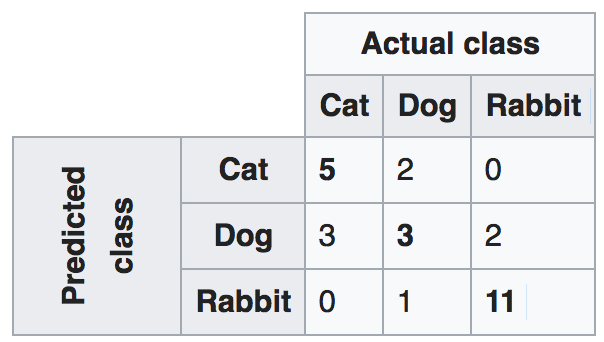

Для того, чтобы облегчить вам задачу, ниже реализована функция `visualize_confusion_matrix` которая визуализирует такую матрицу.  
Вам осталось реализовать функцию `build_confusion_matrix`, которая ее вычислит.

Результатом должна быть матрица 10x10.

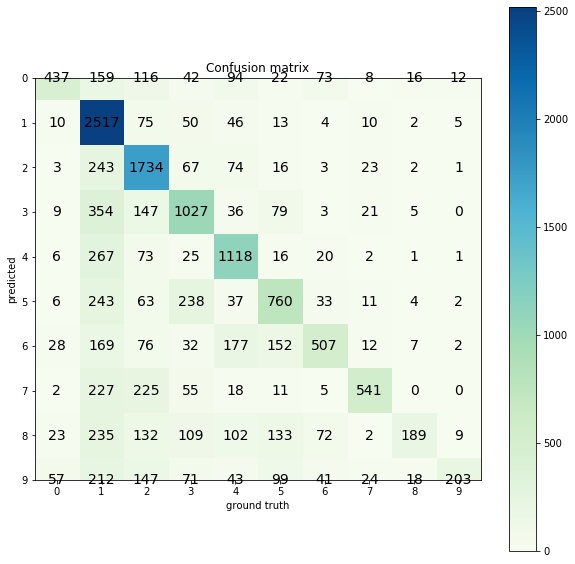

In [9]:
def visualize_confusion_matrix(confusion_matrix):
    """
    Visualizes confusion matrix
    
    confusion_matrix: np array of ints, x axis - predicted class, y axis - actual class
                      [i][j] should have the count of samples that were predicted to be class i,
                      but have j in the ground truth
                     
    """
    # Adapted from 
    # https://stackoverflow.com/questions/2897826/confusion-matrix-with-number-of-classified-misclassified-instances-on-it-python
    assert confusion_matrix.shape[0] == confusion_matrix.shape[1]
    size = confusion_matrix.shape[0]
    fig = plt.figure(figsize=(10,10))
    plt.title("Confusion matrix")
    plt.ylabel("predicted")
    plt.xlabel("ground truth")
    res = plt.imshow(confusion_matrix, cmap='GnBu', interpolation='nearest')
    cb = fig.colorbar(res)
    plt.xticks(np.arange(size))
    plt.yticks(np.arange(size))
    for i, row in enumerate(confusion_matrix):
        for j, count in enumerate(row):
            plt.text(j, i, count, fontsize=14, horizontalalignment='center', verticalalignment='center')
    
def build_confusion_matrix(predictions, ground_truth):
    """
    Builds confusion matrix from predictions and ground truth

    predictions: np array of ints, model predictions for all validation samples
    ground_truth: np array of ints, ground truth for all validation samples
    
    Returns:
    np array of ints, (10,10), counts of samples for predicted/ground_truth classes
    """
    # TODO: Implement filling the prediction matrix
    confusion_matrix = np.zeros((10, 10), np.int)
    for i in range(predictions.shape[0]):
        pred = predictions[i]
        gt = ground_truth[i]
        if (pred == gt):
            confusion_matrix[pred][pred] += 1
        if (pred != gt):
            confusion_matrix[gt][pred] += 1
    return confusion_matrix

confusion_matrix = build_confusion_matrix(predictions, gt)
visualize_confusion_matrix(confusion_matrix)

Наконец, посмотрим на изображения, соответствующие некоторым элементам этой матрицы.

Как и раньше, вам дана функция `visualize_images`, которой нужно воспрользоваться при реализации функции `visualize_predicted_actual`. Эта функция должна вывести несколько примеров, соответствующих заданному элементу матрицы.

Визуализируйте наиболее частые ошибки и попробуйте понять, почему модель их совершает.

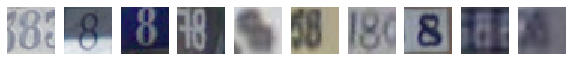

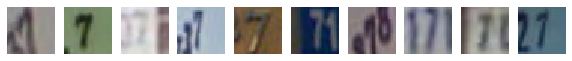

In [14]:
data_train_images = dset.SVHN('./data/', split='train')

def visualize_images(indices, data, title='', max_num=10):
    """
    Visualizes several images from the dataset
 
    indices: array of indices to visualize
    data: torch Dataset with the images
    title: string, title of the plot
    max_num: int, max number of images to display
    """
    to_show = min(len(indices), max_num)
    fig = plt.figure(figsize=(10,1.5))
    fig.suptitle(title)
    for i, index in enumerate(indices[:to_show]):
        plt.subplot(1,to_show, i+1)
        plt.axis('off')
        sample = data[index][0]
        plt.imshow(sample)
        
def visualize_predicted_actual(predicted_class, gt_class, predictions, ground_truth, val_indices, data):
    """
    Visualizes images of a ground truth class which were predicted as the other class 
    
    predicted: int 0-9, index of the predicted class
    gt_class: int 0-9, index of the ground truth class
    predictions: np array of ints, model predictions for all validation samples
    ground_truth: np array of ints, ground truth for all validation samples
    val_indices: np array of ints, indices of validation samples
    """
    indices = np.where((predictions == predicted_class) & (ground_truth == gt_class))
    visualize_images(val_indices[indices], data)
    # TODO: Implement visualization using visualize_images above
    # predictions and ground_truth are provided for validation set only, defined by val_indices
    # Hint: numpy index arrays might be helpful
    # https://docs.scipy.org/doc/numpy/user/basics.indexing.html#index-arrays
    # Please make the title meaningful!
    

visualize_predicted_actual(6, 8, predictions, gt, np.array(val_indices), data_train_images)
visualize_predicted_actual(1, 7, predictions, gt, np.array(val_indices), data_train_images)

# Переходим к свободным упражнениям!

Натренируйте модель как можно лучше - экспериментируйте сами!
Что следует обязательно попробовать:
- перебор гиперпараметров с помощью валидационной выборки
- другие оптимизаторы вместо SGD
- изменение количества слоев и их размеров
- наличие Batch Normalization

Но ограничиваться этим не стоит!

Точность на тестовой выборке должна быть доведена до **80%**

In [30]:
# Experiment here!
nn_model = nn.Sequential(
            Flattener(),
            nn.Linear(3*32*32, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10),
         )

best_acc = 0
best_lr = 0
best_wd = 0
for learning_rate in [1e-4, 1e-3, 1.5e-3]:
    for wd in [1e-4, 1e-3]:
        print("lr: %f, wd: %f" % (learning_rate, wd))
        optimizer = optim.Adam(nn_model.parameters(), lr=learning_rate, weight_decay=wd)
        loss = nn.CrossEntropyLoss().type(torch.FloatTensor)
        loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 5)
        max_val_acc = max(val_history)
        if (max_val_acc > best_acc):
            best_acc = max_val_acc
            best_lr = learning_rate
            best_wd = wd
print("best_lr: %f, best_wd: %f" % (best_lr, best_wd))
optimizer = optim.Adam(nn_model.parameters(), lr=best_lr, weight_decay=best_wd)
loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer, 20)

lr: 0.000100, wd: 0.000100
Average loss: 1.585957, Train accuracy: 0.530492, Val accuracy: 0.676268
Average loss: 1.085022, Train accuracy: 0.686619, Val accuracy: 0.732783
Average loss: 0.893068, Train accuracy: 0.736324, Val accuracy: 0.761859
Average loss: 0.821800, Train accuracy: 0.756441, Val accuracy: 0.772029
Average loss: 0.756688, Train accuracy: 0.775552, Val accuracy: 0.784042
lr: 0.000100, wd: 0.001000
Average loss: 0.788204, Train accuracy: 0.760076, Val accuracy: 0.780698
Average loss: 0.734784, Train accuracy: 0.775381, Val accuracy: 0.795441
Average loss: 0.656147, Train accuracy: 0.801641, Val accuracy: 0.808409
Average loss: 0.632771, Train accuracy: 0.807085, Val accuracy: 0.809365
Average loss: 0.594639, Train accuracy: 0.820121, Val accuracy: 0.823015
lr: 0.001000, wd: 0.000100
Average loss: 1.060950, Train accuracy: 0.663959, Val accuracy: 0.750870
Average loss: 0.832374, Train accuracy: 0.740641, Val accuracy: 0.739608
Average loss: 0.676566, Train accuracy: 0.7

In [31]:
# Как всегда, в конце проверяем на test set
test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size)
test_accuracy = compute_accuracy(nn_model, test_loader)
print("Test accuracy: %2.4f" % test_accuracy)

Test accuracy: 0.8574
